# Capstone - Part 1 - Merging Data

Elizabeth Miller

## 1- Introduction

Kentucky ranks 45th in the nation in uneducated population-- only 5 states have a worse education system. In terms of college education, we are 47th in the country for adults with bachelor degrees, and 47th again for adults with at least an associates degree. Therefore, our state is one of the least educated in the country.  

However in terms of spending, Kentucky does not rank so poorly at 32nd. Kentucky spent \\$9,863 per student in 2016, while the national average was \\$11,762. In 2018, Kentucky spent \\$11,110 while the national average was \\$12,612. That's an increase of 12.6% in just 2 years. So why are we so uneducated?

While the Kentucky Department of Education cannot control higher education, it can work to create an educational environment in K-12 to encourage more college graduates. 

Kentucky's drop out rate is 6.6%. Black youth drop outs vs their white peers were found to be statistically non relevant, but Hispanic youths vs white is disproportionate. 

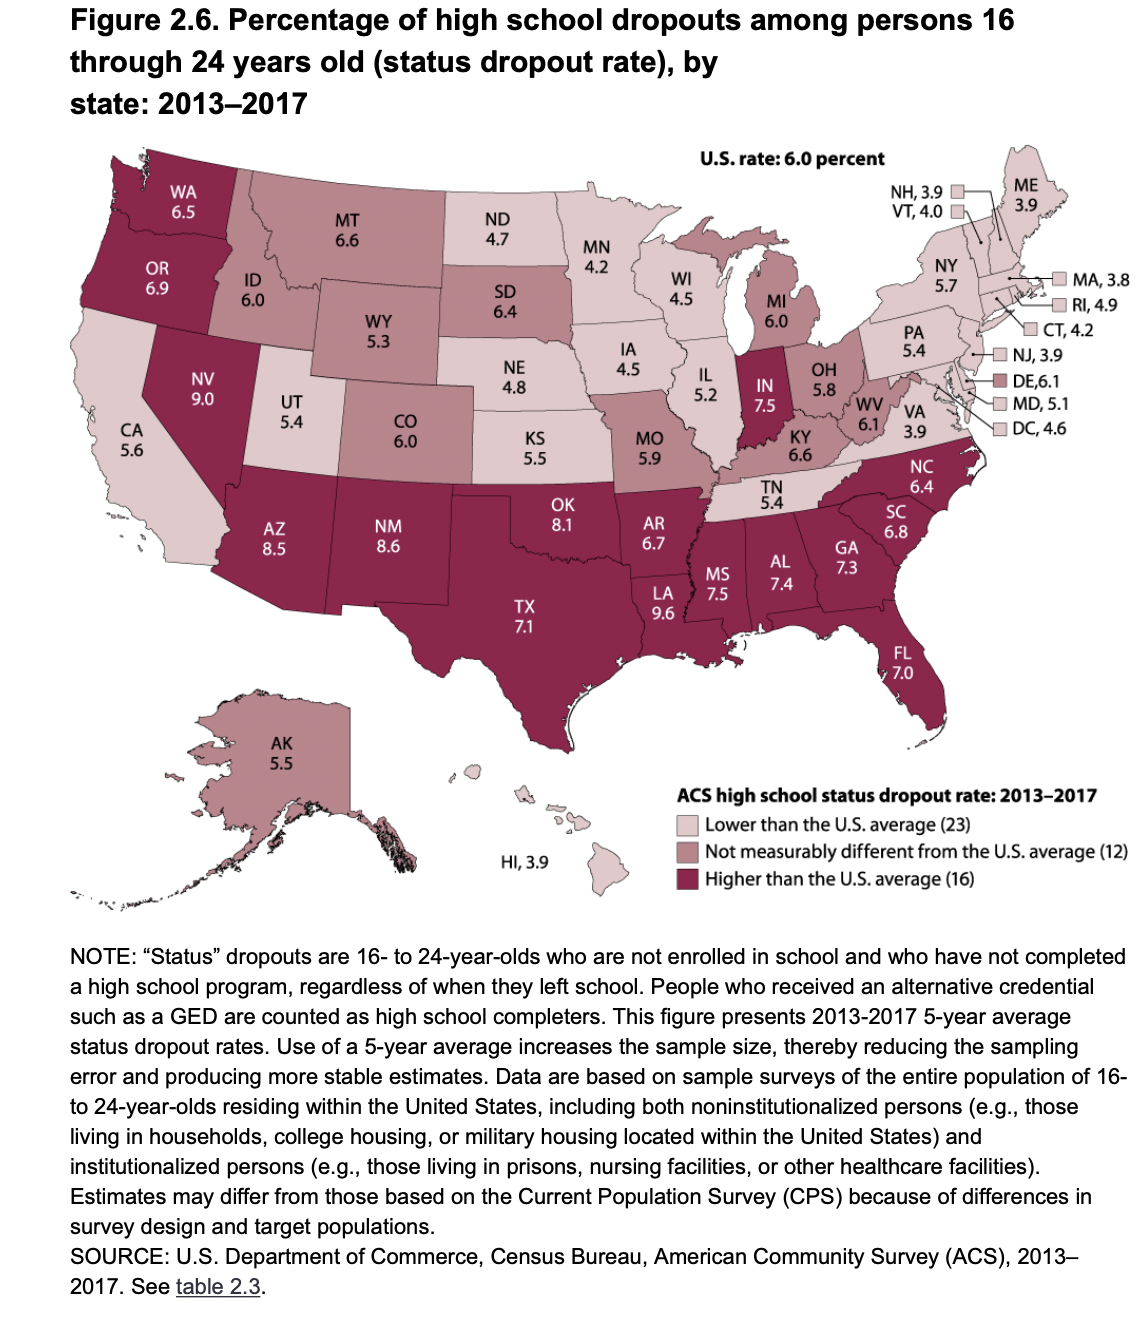

Clearly, Kentucky has need of educational improvement in regards to the rest of the country, but it's not so far gone that there isn't hope: spending per student is improving and there are many more states with worse drop out rates. 

---

The purpose of this research is to provide the state of Kentucky with some guidelines moving forward in order to reduce drop out rates. First by creating a model to predict dropout rates then by using these to determine what features help or hinder the most. 

---

*Stats for Kentucky's ranking found here:* https://www.governing.com/archive/state-education-spending-per-pupil-data.html

*Stats for Drop out rates found here:* https://nces.ed.gov/programs/dropout/ind_02.asp


For this project, we will be using Kentucky's standardized testing data, school safety reports and learning environment data given by each school district. To help us analyze the drop out rate, it's also important to look at the community issues that might lead to these as well, so we pulled in the Kids Count data for each county as well. Kids Count is an aggregate data website that collects any and all data relating to children in each county of the United States. Of particular importance to us will be the number of children living below the poverty line, unemployment, government assistance, median household income and food insecurity. 

***Note: Enter at your own risk, there is A LOT of data wrangling in this part.***

---

## 2 - School Data Merging

Before any kind of data exploration, the data needs to be read in and then edited. Not all columns will be necessary. First, we will begin by reading in the needed files and deleting unnecessary columns from the data sets. we will keep the data organized by year and by type of csv. 

To do this we will be using data from the School Report Cards from 2011-2017.

We are pulling the data for each academic year from 3 sources (https://openhouse.education.ky.gov/Home/SRCData)

1. Assessment Data (Standardized testing)
2. Learning Environment Data (makeup of school, qualifications of teachers, attendance, dropout rates, technology levels, and involvement of parents)
3. School Safety (Number of behavior incidents for each school) 

Once that data is compiled into one dataframe, then we will add the most recent KidsCount community data as columns onto it as well. 

import numpy as np
import pandas as pd

### 2011-2012 Merging

#### Assessment Data

We begin by reading in the data. 

In [2]:
assessment_11_12 = pd.read_csv("data/11-12/ASSESSMENT_KPREP_LEVEL.csv")
assessment_11_12.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,SCH_TYPE,CATEGORY,TEST_TYPE,CONTENT_LEVEL,CONTENT_TYPE,DISAGG_ORDER,DISAGG_LABEL,NBR_TESTED,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,PCT_PROFICIENT_DISTINGUISHED
0,20112012,1016,Adair County,Adair County Elementary School,A1,Assessment,KPREP,Elementary School,Language Mechanics,0,All Students,265,30.6,33.2,21.1,15.1,36.2
1,20112012,1016,Adair County,Adair County Elementary School,A1,Assessment,KPREP,Elementary School,Language Mechanics,1,Male,141,36.9,31.9,17.7,13.5,31.2
2,20112012,1016,Adair County,Adair County Elementary School,A1,Assessment,KPREP,Elementary School,Language Mechanics,2,Female,124,23.4,34.7,25.0,16.9,41.9
3,20112012,1016,Adair County,Adair County Elementary School,A1,Assessment,KPREP,Elementary School,Language Mechanics,3,White (Non-Hispanic),248,31.5,31.9,21.4,15.3,36.7
4,20112012,1016,Adair County,Adair County Elementary School,A1,Assessment,KPREP,Elementary School,Language Mechanics,4,African American,***,NaN,NaN,NaN,NaN,NaN


Let's inspect the columns first. 

In [3]:
assessment_11_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164826 entries, 0 to 164825
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SCH_YEAR                      164826 non-null  int64  
 1   SCH_CD                        164826 non-null  int64  
 2   DIST_NAME                     164826 non-null  object 
 3   SCH_NAME                      164826 non-null  object 
 4   SCH_TYPE                      120906 non-null  object 
 5   CATEGORY                      164826 non-null  object 
 6   TEST_TYPE                     164826 non-null  object 
 7   CONTENT_LEVEL                 164826 non-null  object 
 8   CONTENT_TYPE                  164826 non-null  object 
 9   DISAGG_ORDER                  164826 non-null  int64  
 10  DISAGG_LABEL                  164826 non-null  object 
 11  NBR_TESTED                    120111 non-null  object 
 12  PCT_NOVICE                    79899 non-null

In [4]:
assessment_11_12['TEST_TYPE'].value_counts()

KPREP    164826
Name: TEST_TYPE, dtype: int64

Now let's start by dropping unnecessary rows. 

In [5]:
# The data in column "TEST_TYPE" is all the same - KPREP. This column can be dropped. 
assessment_11_12 = assessment_11_12.drop(['TEST_TYPE'], axis =1)
# Checking it is gone. 
assessment_11_12.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,SCH_TYPE,CATEGORY,CONTENT_LEVEL,CONTENT_TYPE,DISAGG_ORDER,DISAGG_LABEL,NBR_TESTED,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,PCT_PROFICIENT_DISTINGUISHED
0,20112012,1016,Adair County,Adair County Elementary School,A1,Assessment,Elementary School,Language Mechanics,0,All Students,265,30.6,33.2,21.1,15.1,36.2
1,20112012,1016,Adair County,Adair County Elementary School,A1,Assessment,Elementary School,Language Mechanics,1,Male,141,36.9,31.9,17.7,13.5,31.2
2,20112012,1016,Adair County,Adair County Elementary School,A1,Assessment,Elementary School,Language Mechanics,2,Female,124,23.4,34.7,25.0,16.9,41.9
3,20112012,1016,Adair County,Adair County Elementary School,A1,Assessment,Elementary School,Language Mechanics,3,White (Non-Hispanic),248,31.5,31.9,21.4,15.3,36.7
4,20112012,1016,Adair County,Adair County Elementary School,A1,Assessment,Elementary School,Language Mechanics,4,African American,***,NaN,NaN,NaN,NaN,NaN


In [6]:
assessment_11_12['CATEGORY'].value_counts()

Assessment    164826
Name: CATEGORY, dtype: int64

In [7]:
# The data in column "CATEGORY" is all the same - assessment. This column can be dropped. 
assessment_11_12 = assessment_11_12.drop(['CATEGORY'], axis =1)
# Checking it is gone. 
assessment_11_12.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,SCH_TYPE,CONTENT_LEVEL,CONTENT_TYPE,DISAGG_ORDER,DISAGG_LABEL,NBR_TESTED,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,PCT_PROFICIENT_DISTINGUISHED
0,20112012,1016,Adair County,Adair County Elementary School,A1,Elementary School,Language Mechanics,0,All Students,265,30.6,33.2,21.1,15.1,36.2
1,20112012,1016,Adair County,Adair County Elementary School,A1,Elementary School,Language Mechanics,1,Male,141,36.9,31.9,17.7,13.5,31.2
2,20112012,1016,Adair County,Adair County Elementary School,A1,Elementary School,Language Mechanics,2,Female,124,23.4,34.7,25.0,16.9,41.9
3,20112012,1016,Adair County,Adair County Elementary School,A1,Elementary School,Language Mechanics,3,White (Non-Hispanic),248,31.5,31.9,21.4,15.3,36.7
4,20112012,1016,Adair County,Adair County Elementary School,A1,Elementary School,Language Mechanics,4,African American,***,NaN,NaN,NaN,NaN,NaN


In [8]:
assessment_11_12['SCH_TYPE'].value_counts()

A1    120906
Name: SCH_TYPE, dtype: int64

In [9]:
# The data in column "SCH_TYPE" is all the same - A1. This column can be dropped. 
assessment_11_12 = assessment_11_12.drop(['SCH_TYPE'], axis =1)
# Checking it is gone. 
assessment_11_12.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,CONTENT_TYPE,DISAGG_ORDER,DISAGG_LABEL,NBR_TESTED,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,PCT_PROFICIENT_DISTINGUISHED
0,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,0,All Students,265,30.6,33.2,21.1,15.1,36.2
1,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,1,Male,141,36.9,31.9,17.7,13.5,31.2
2,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,2,Female,124,23.4,34.7,25.0,16.9,41.9
3,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,3,White (Non-Hispanic),248,31.5,31.9,21.4,15.3,36.7
4,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,4,African American,***,NaN,NaN,NaN,NaN,NaN


The column "PCT_PROFICIENT_DISTINGUISHED" isn't needed either as it just combines the PCT_PROFICIENT column with the PCT_DISTINGUISHED column. 

In [10]:
# The data in column "PCT_PROFICIENT_DISTINGUISHED" is not needed. This column can be dropped. 
assessment_11_12 = assessment_11_12.drop(['PCT_PROFICIENT_DISTINGUISHED'], axis =1)
# Checking it is gone. 
assessment_11_12.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,CONTENT_TYPE,DISAGG_ORDER,DISAGG_LABEL,NBR_TESTED,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,0,All Students,265,30.6,33.2,21.1,15.1
1,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,1,Male,141,36.9,31.9,17.7,13.5
2,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,2,Female,124,23.4,34.7,25.0,16.9
3,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,3,White (Non-Hispanic),248,31.5,31.9,21.4,15.3
4,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,4,African American,***,NaN,NaN,NaN,NaN


Next I will need to adjust the rows, we currently have way too many entries in this data frame. I am only interested in the test scores of all students, as the learning environment has information about the types of students tested. 

In [11]:
index_names = assessment_11_12[ assessment_11_12['DISAGG_LABEL'] != 'All Students' ].index
assessment_11_12.drop(index_names, inplace=True) 
assessment_11_12.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,CONTENT_TYPE,DISAGG_ORDER,DISAGG_LABEL,NBR_TESTED,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,0,All Students,265,30.6,33.2,21.1,15.1
18,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Mathematics,0,All Students,401,14.7,34.7,37.7,13.0
36,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Reading,0,All Students,401,24.9,31.4,30.2,13.5
54,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Science,0,All Students,65,4.6,21.5,41.5,32.3
72,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Social Studies,0,All Students,61,13.1,31.1,54.1,1.6


Now that I've dropped that, I can see that I now no longer need the DISAGG_ORDER number or the disaggregate label since they're all the same now. Let's drop both. 

In [12]:
# The data in column "DISAGG_ORDER" is not needed. This column can be dropped. 
assessment_11_12 = assessment_11_12.drop(['DISAGG_ORDER'], axis =1)
# Checking it is gone. 
assessment_11_12.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,CONTENT_TYPE,DISAGG_LABEL,NBR_TESTED,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,All Students,265,30.6,33.2,21.1,15.1
18,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Mathematics,All Students,401,14.7,34.7,37.7,13.0
36,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Reading,All Students,401,24.9,31.4,30.2,13.5
54,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Science,All Students,65,4.6,21.5,41.5,32.3
72,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Social Studies,All Students,61,13.1,31.1,54.1,1.6


In [13]:
# The data in column "DISAGG_LABEL" is not needed. This column can be dropped. 
assessment_11_12 = assessment_11_12.drop(['DISAGG_LABEL'], axis =1)
# Checking it is gone. 
assessment_11_12.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,CONTENT_TYPE,NBR_TESTED,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,265,30.6,33.2,21.1,15.1
18,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Mathematics,401,14.7,34.7,37.7,13.0
36,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Reading,401,24.9,31.4,30.2,13.5
54,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Science,65,4.6,21.5,41.5,32.3
72,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Social Studies,61,13.1,31.1,54.1,1.6


Lastly, the total number tested is also not important, because the learning environment contains the number of students. Let's drop it too. 

In [14]:
# The data in column "NBR_TESTED" is not needed. This column can be dropped. 
assessment_11_12 = assessment_11_12.drop(['NBR_TESTED'], axis =1)
# Checking it is gone. 
assessment_11_12.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,CONTENT_TYPE,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,30.6,33.2,21.1,15.1
18,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Mathematics,14.7,34.7,37.7,13.0
36,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Reading,24.9,31.4,30.2,13.5
54,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Science,4.6,21.5,41.5,32.3
72,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Social Studies,13.1,31.1,54.1,1.6


In the School Name column, there are entries for the district total and then the school total. Those can be removed too.

In [15]:
#Deleting District Totals
index_names = assessment_11_12[ assessment_11_12['SCH_NAME'] == '--- District Total ---' ].index
assessment_11_12.drop(index_names, inplace=True) 

#Deleting State Total
index_names = assessment_11_12[ assessment_11_12['SCH_NAME'] == '--- State Total ---' ].index
assessment_11_12.drop(index_names, inplace=True) 
assessment_11_12.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,CONTENT_TYPE,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,30.6,33.2,21.1,15.1
18,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Mathematics,14.7,34.7,37.7,13.0
36,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Reading,24.9,31.4,30.2,13.5
54,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Science,4.6,21.5,41.5,32.3
72,20112012,1016,Adair County,Adair County Elementary School,Elementary School,Social Studies,13.1,31.1,54.1,1.6


This is looking much better. Now I want each row in the dataframe to be one school. To do that I need to address the different content types. I would like to find the mean amount of novice, apprentice, proficient and distinguished regardless of type. To this I am going to use a group by function using the mean. 

In [16]:
#Grouping on school code to find the mean pct novice, apprentice, proficient and distinguished.
mean_achievement_scores = assessment_11_12.groupby(by='SCH_CD').agg('mean')[['PCT_NOVICE', 'PCT_APPRENTICE', 'PCT_PROFICIENT', 'PCT_DISTINGUISHED']]
mean_achievement_scores.head()

,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
SCH_CD,,,,
1010,18.000000,41.300000,30.950000,9.650000
1013,9.050000,26.216667,40.483333,24.216667
1014,15.860000,35.880000,39.140000,9.160000
1016,18.233333,33.550000,35.500000,12.716667
5010,19.400000,34.450000,34.200000,11.950000


Now I want to add that dataframe to my existing dataframe, but first I need to cut out the existing columns with the non-aggregated mean percent novice, apprentice, proficient and distinguished. And the content type column. They're no longer needed. 

In [17]:
# The data in column "CONTENT_TYPE" and "PCT NOVICE...." is not needed. This column can be dropped. 
assessment_11_12 = assessment_11_12.drop(['CONTENT_TYPE', 
                                           'PCT_NOVICE', 
                                           'PCT_APPRENTICE',
                                           'PCT_PROFICIENT', 
                                           'PCT_DISTINGUISHED'], axis =1)
# Checking it is gone. 
assessment_11_12.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL
0,20112012,1016,Adair County,Adair County Elementary School,Elementary School
18,20112012,1016,Adair County,Adair County Elementary School,Elementary School
36,20112012,1016,Adair County,Adair County Elementary School,Elementary School
54,20112012,1016,Adair County,Adair County Elementary School,Elementary School
72,20112012,1016,Adair County,Adair County Elementary School,Elementary School


Now just cleaning up duplicates and the index numbers. Getting ready to merge the group by data set (mean_achievement_scores) with this on the school code. 

In [18]:
#dropping multiples
assessment_11_12 = assessment_11_12.drop_duplicates()

Now both the assessments_11_12 and mean_achievement_scores can be joined on school code. 

In [19]:
#merging
assessment_11_12 = assessment_11_12.merge(mean_achievement_scores, on='SCH_CD', how='left')
assessment_11_12

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20112012,1016,Adair County,Adair County Elementary School,Elementary School,18.233333,33.550000,35.500000,12.716667
1,20112012,1010,Adair County,Adair County High School,High School,18.000000,41.300000,30.950000,9.650000
2,20112012,1014,Adair County,Adair County Middle School,Middle School,15.860000,35.880000,39.140000,9.160000
3,20112012,1013,Adair County,John Adair Intermediate School,Elementary School,9.050000,26.216667,40.483333,24.216667
4,20112012,5060,Allen County,Allen County Intermediate Center,Elementary School,18.350000,36.216667,31.550000,13.883333
...,...,...,...,...,...,...,...,...,...
1291,20112012,601120,Woodford County,Northside Elementary School,Elementary School,12.833333,29.416667,37.566667,20.200000
1292,20112012,601075,Woodford County,Simmons Elementary School,Elementary School,24.300000,26.866667,25.950000,22.916667
1293,20112012,601050,Woodford County,Southside Elementary School,Elementary School,10.733333,27.350000,36.850000,24.900000
1294,20112012,601084,Woodford County,Woodford County High School,High School,9.750000,28.600000,34.750000,26.900000


This is good, however, we are looking at drop out rates, and we can see that each row represents a school: elementary, middle and high. However the only schools that have drop outs are high schools. So what we need to do now is remove the elementary and middle schools from the list... we don't want to remove them from the dataframe entirely though. If we make the county elementary and middle schools a column on the high school rows, we will retain the info in an alternate way. This would make each row a high school. This will add to the dimensionality of the dataset though so we will have to address that at the modeling phase. 

Let's focus on the elementary schools first. The nice thing about Kentucky schools is they most have elementary in their name, or primary or intermediate. Using these strings, we can make a dataframe of just elementary schools, compress the data by county, and then merge it back onto our assessment dataframe. 

In [20]:
#pulling out elementary schools
elementary_11_12 = assessment_11_12[assessment_11_12['CONTENT_LEVEL'].str.contains('Elementary')]
elementary_11_12.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20112012,1016,Adair County,Adair County Elementary School,Elementary School,18.233333,33.550000,35.500000,12.716667
3,20112012,1013,Adair County,John Adair Intermediate School,Elementary School,9.050000,26.216667,40.483333,24.216667
4,20112012,5060,Allen County,Allen County Intermediate Center,Elementary School,18.350000,36.216667,31.550000,13.883333
5,20112012,5010,Allen County,Allen County Primary Center,Elementary School,19.400000,34.450000,34.200000,11.950000
8,20112012,6010,Anchorage Independent,Anchorage Independent Public School,Elementary School,5.083333,18.025000,37.775000,39.116667


Now we have a dataframe made up of our elementary schools. Next, we want to average each county's elementary scores. We can use the same group by structures that we used above. 

In [21]:
#Aggregating scores
elementary_mean_scores = elementary_11_12.groupby(by='DIST_NAME').agg('mean')[['PCT_NOVICE', 'PCT_APPRENTICE', 'PCT_PROFICIENT', 'PCT_DISTINGUISHED']]
elementary_mean_scores.head()

,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,13.641667,29.883333,37.991667,18.466667
Allen County,18.875000,35.333333,32.875000,12.916667
Anchorage Independent,5.083333,18.025000,37.775000,39.116667
Anderson County,13.011111,31.611111,36.938889,18.444444
Ashland Independent,15.013333,31.813333,36.983333,16.190000


These columns now have the same name as other columns in our dataframe, so let's change them so they say ELEM at the front to show they're elementary scores. 

In [22]:
#Renaming the columns
elementary_mean_scores = elementary_mean_scores.rename(columns={"PCT_NOVICE": "ELEM_PCT_NOVICE", "PCT_APPRENTICE": "ELEM_PCT_APPRENTICE", "PCT_PROFICIENT": "ELEM_PCT_PROFICIENT", "PCT_DISTINGUISHED": "ELEM_PCT_DISTINGUISHED"})
elementary_mean_scores

,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,13.641667,29.883333,37.991667,18.466667
Allen County,18.875000,35.333333,32.875000,12.916667
Anchorage Independent,5.083333,18.025000,37.775000,39.116667
Anderson County,13.011111,31.611111,36.938889,18.444444
Ashland Independent,15.013333,31.813333,36.983333,16.190000
...,...,...,...,...
Whitley County,14.547222,33.566667,35.205556,16.686111
Williamsburg Independent,15.578571,34.971429,32.750000,16.714286
Williamstown Independent,15.350000,32.600000,35.133333,16.883333


Excellent, now we can merge this back onto our assessment data frame. 

In [23]:
#Merging back
assessment_11_12 = assessment_11_12.merge(elementary_mean_scores, on="DIST_NAME", how="left")
assessment_11_12

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED
0,20112012,1016,Adair County,Adair County Elementary School,Elementary School,18.233333,33.550000,35.500000,12.716667,13.641667,29.883333,37.991667,18.466667
1,20112012,1010,Adair County,Adair County High School,High School,18.000000,41.300000,30.950000,9.650000,13.641667,29.883333,37.991667,18.466667
2,20112012,1014,Adair County,Adair County Middle School,Middle School,15.860000,35.880000,39.140000,9.160000,13.641667,29.883333,37.991667,18.466667
3,20112012,1013,Adair County,John Adair Intermediate School,Elementary School,9.050000,26.216667,40.483333,24.216667,13.641667,29.883333,37.991667,18.466667
4,20112012,5060,Allen County,Allen County Intermediate Center,Elementary School,18.350000,36.216667,31.550000,13.883333,18.875000,35.333333,32.875000,12.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,20112012,601120,Woodford County,Northside Elementary School,Elementary School,12.833333,29.416667,37.566667,20.200000,14.133333,27.979167,35.200000,22.658333
1292,20112012,601075,Woodford County,Simmons Elementary School,Elementary School,24.300000,26.866667,25.950000,22.916667,14.133333,27.979167,35.200000,22.658333
1293,20112012,601050,Woodford County,Southside Elementary School,Elementary School,10.733333,27.350000,36.850000,24.900000,14.133333,27.979167,35.200000,22.658333
1294,20112012,601084,Woodford County,Woodford County High School,High School,9.750000,28.600000,34.750000,26.900000,14.133333,27.979167,35.200000,22.658333


Next, let's do the exact same thing, but with middle schools. They are called middle schools, junior high or even Jr. First let's pull out the middle schools into their own dataframe. However, again, we can use the Content Type column to find them all. 

In [24]:
#Pulling out middle schools
middle_11_12 = assessment_11_12[assessment_11_12['CONTENT_LEVEL'].str.contains('Middle')]
middle_11_12.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED
2,20112012,1014,Adair County,Adair County Middle School,Middle School,15.860000,35.880000,39.140000,9.160000,13.641667,29.883333,37.991667,18.466667
7,20112012,5015,Allen County,James E Bazzell Middle School,Middle School,12.320000,33.780000,40.640000,13.240000,18.875000,35.333333,32.875000,12.916667
9,20112012,6010,Anchorage Independent,Anchorage Independent Public School,Middle School,5.083333,18.025000,37.775000,39.116667,5.083333,18.025000,37.775000,39.116667
11,20112012,11025,Anderson County,Anderson County Middle School,Middle School,18.666667,31.266667,34.966667,15.066667,13.011111,31.611111,36.938889,18.444444
17,20112012,12050,Ashland Independent,George M. Verity Middle School,Middle School,15.100000,28.740000,40.400000,15.760000,15.013333,31.813333,36.983333,16.190000


Let's lets find the mean of all scores for each district. 

In [25]:
#Aggregating scores
middle_mean_scores = middle_11_12.groupby(by='DIST_NAME').agg('mean')[['PCT_NOVICE', 'PCT_APPRENTICE', 'PCT_PROFICIENT', 'PCT_DISTINGUISHED']]
middle_mean_scores.head()

,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,15.860000,35.880000,39.140000,9.160000
Allen County,12.320000,33.780000,40.640000,13.240000
Anchorage Independent,5.083333,18.025000,37.775000,39.116667
Anderson County,18.666667,31.266667,34.966667,15.066667
Ashland Independent,15.100000,28.740000,40.400000,15.760000


Now to rename them so it says middle school in the column names. 

In [26]:
#Renaming the columns
middle_mean_scores = middle_mean_scores.rename(columns={"PCT_NOVICE": "MIDDLE_PCT_NOVICE", "PCT_APPRENTICE": "MIDDLE_PCT_APPRENTICE", "PCT_PROFICIENT": "MIDDLE_PCT_PROFICIENT", "PCT_DISTINGUISHED": "MIDDLE_PCT_DISTINGUISHED"})
middle_mean_scores

,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,15.860000,35.880000,39.140000,9.160000
Allen County,12.320000,33.780000,40.640000,13.240000
Anchorage Independent,5.083333,18.025000,37.775000,39.116667
Anderson County,18.666667,31.266667,34.966667,15.066667
Ashland Independent,15.100000,28.740000,40.400000,15.760000
...,...,...,...,...
Whitley County,12.700000,37.560000,36.520000,13.200000
Williamsburg Independent,15.578571,34.971429,32.750000,16.714286
Williamstown Independent,20.933333,34.266667,34.283333,10.483333


Now to merge it back...

In [27]:
#Merging back
assessment_11_12 = assessment_11_12.merge(middle_mean_scores, on="DIST_NAME", how="left")
assessment_11_12

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED
0,20112012,1016,Adair County,Adair County Elementary School,Elementary School,18.233333,33.550000,35.500000,12.716667,13.641667,29.883333,37.991667,18.466667,15.860000,35.880000,39.14,9.16
1,20112012,1010,Adair County,Adair County High School,High School,18.000000,41.300000,30.950000,9.650000,13.641667,29.883333,37.991667,18.466667,15.860000,35.880000,39.14,9.16
2,20112012,1014,Adair County,Adair County Middle School,Middle School,15.860000,35.880000,39.140000,9.160000,13.641667,29.883333,37.991667,18.466667,15.860000,35.880000,39.14,9.16
3,20112012,1013,Adair County,John Adair Intermediate School,Elementary School,9.050000,26.216667,40.483333,24.216667,13.641667,29.883333,37.991667,18.466667,15.860000,35.880000,39.14,9.16
4,20112012,5060,Allen County,Allen County Intermediate Center,Elementary School,18.350000,36.216667,31.550000,13.883333,18.875000,35.333333,32.875000,12.916667,12.320000,33.780000,40.64,13.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,20112012,601120,Woodford County,Northside Elementary School,Elementary School,12.833333,29.416667,37.566667,20.200000,14.133333,27.979167,35.200000,22.658333,17.066667,28.033333,35.40,19.50
1292,20112012,601075,Woodford County,Simmons Elementary School,Elementary School,24.300000,26.866667,25.950000,22.916667,14.133333,27.979167,35.200000,22.658333,17.066667,28.033333,35.40,19.50
1293,20112012,601050,Woodford County,Southside Elementary School,Elementary School,10.733333,27.350000,36.850000,24.900000,14.133333,27.979167,35.200000,22.658333,17.066667,28.033333,35.40,19.50
1294,20112012,601084,Woodford County,Woodford County High School,High School,9.750000,28.600000,34.750000,26.900000,14.133333,27.979167,35.200000,22.658333,17.066667,28.033333,35.40,19.50


Next, let's make sure we caught everything.

In [28]:
#checking for null values
assessment_11_12.isna().sum()

SCH_YEAR                    0
SCH_CD                      0
DIST_NAME                   0
SCH_NAME                    0
CONTENT_LEVEL               0
PCT_NOVICE                  0
PCT_APPRENTICE              0
PCT_PROFICIENT              0
PCT_DISTINGUISHED           0
ELEM_PCT_NOVICE             0
ELEM_PCT_APPRENTICE         0
ELEM_PCT_PROFICIENT         0
ELEM_PCT_DISTINGUISHED      0
MIDDLE_PCT_NOVICE           0
MIDDLE_PCT_APPRENTICE       0
MIDDLE_PCT_PROFICIENT       0
MIDDLE_PCT_DISTINGUISHED    0
dtype: int64

We definitely missed some things. Let's take another look at the middle and elementary schools. 

In [29]:
assessment_11_12[assessment_11_12['ELEM_PCT_APPRENTICE'].isna()]

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED


Lastly, let's remove pull out just the high school rows... and this is what our new assessment dataframe will be composed of. Note: This means that we will lose rows such as the Allen County Intermediate Center as shown, however if a school is not called "elementary, middle or high" it's an alternative school and isn't in the scope of this research project anyways as it doesn't have a coordinating elementary/middle school. 

In [30]:
#Pulling out high schools
assessment_11_12 = assessment_11_12[assessment_11_12['CONTENT_LEVEL'].str.contains('High')]
assessment_11_12.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED
1,20112012,1010,Adair County,Adair County High School,High School,18.000000,41.300000,30.950000,9.650000,13.641667,29.883333,37.991667,18.466667,15.860000,35.880000,39.140000,9.160000
6,20112012,5020,Allen County,Allen County-Scottsville High School,High School,19.850000,41.600000,26.850000,11.700000,18.875000,35.333333,32.875000,12.916667,12.320000,33.780000,40.640000,13.240000
10,20112012,11020,Anderson County,Anderson County High School,High School,16.950000,32.250000,33.550000,17.250000,13.011111,31.611111,36.938889,18.444444,18.666667,31.266667,34.966667,15.066667
20,20112012,12010,Ashland Independent,Paul G. Blazer High School,High School,10.000000,34.250000,36.900000,18.850000,15.013333,31.813333,36.983333,16.190000,15.100000,28.740000,40.400000,15.760000
23,20112012,13011,Augusta Independent,Augusta Independent School,High School,22.964286,38.128571,28.757143,10.135714,22.964286,38.128571,28.757143,10.135714,22.964286,38.128571,28.757143,10.135714


#### Learning Environment Data

We will need to drop some rows before merging with the assessments_11_12 data frame. 

In [31]:
learning_environment_11_12 = pd.read_csv("data/11-12/LEARNING_ENVIRONMENT_STUDENTS-TEACHERS.csv")
learning_environment_11_12.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,MEMBERSHIP_TOTAL,SPENDING_PER_STDNT,AVG_DAILY_ATTENDANCE,MEMBERSHIP_MALE_CNT,MEMBERSHIP_MALE_PCT,MEMBERSHIP_FEMALE_CNT,...,PROF_QUAL_SPECIALIST_PCT,PROF_QUAL_DOCTORATE_PCT,PROF_QUAL_TCH_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,SBDM_VOTE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS
0,20112012,1016,Adair County,Adair County Elementary School,597,"$7,261",573.25,321,53.8%,276,...,0.0%,0.0%,100.0%,0.0%,3:1,53.9%,179,47,4,496
1,20112012,1010,Adair County,Adair County High School,698,"$6,457",669.58,339,48.6%,359,...,0.0%,0.0%,100.0%,0.0%,2.1:1,68.3%,200,3,22,"1,500"
2,20112012,1014,Adair County,Adair County Middle School,386,"$6,719",373.68,209,54.1%,177,...,0.0%,0.0%,100.0%,0.0%,4.5:1,72.3%,238,9,3,350
3,20112012,1012,Adair County,Adair Youth Development Center,NaN,NaN,NaN,NaN,0.0%,NaN,...,0.0%,0.0%,0.0%,0.0%,0:1,0%,NaN,NaN,NaN,NaN
4,20112012,1095,Adair County,Colonel William Casey Elementary,390,"$9,068",378.27,213,54.6%,177,...,0.0%,0.0%,100.0%,0.0%,1.7:1,91.6%,350,95,10,450


In [32]:
#Looking at column names
learning_environment_11_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SCH_YEAR                      1561 non-null   int64  
 1   SCH_CD                        1561 non-null   int64  
 2   DIST_NAME                     1561 non-null   object 
 3   SCH_NAME                      1561 non-null   object 
 4   MEMBERSHIP_TOTAL              1506 non-null   object 
 5   SPENDING_PER_STDNT            1365 non-null   object 
 6   AVG_DAILY_ATTENDANCE          1369 non-null   object 
 7   MEMBERSHIP_MALE_CNT           1369 non-null   object 
 8   MEMBERSHIP_MALE_PCT           1561 non-null   object 
 9   MEMBERSHIP_FEMALE_CNT         1369 non-null   object 
 10  MEMBERSHIP_FEMALE_PCT         1561 non-null   object 
 11  MEMBERSHIP_WHITE_CNT          1369 non-null   object 
 12  MEMBERSHIP_WHITE_PCT          1561 non-null   object 
 13  MEM

That is a lot of rows. We're going to need to drop all of the racial counts and keep the percents. We'll also remove gender as gender is generally split 50/50. We will leave the Free/reduced lunch columns alone for now. Then we will also remove the Transition counts. 

In [33]:
#Dropping racial count rows.
learning_environment_11_12 = learning_environment_11_12.drop(['MEMBERSHIP_MALE_CNT', 'MEMBERSHIP_MALE_PCT',
                                            'MEMBERSHIP_FEMALE_CNT', 'MEMBERSHIP_FEMALE_PCT',
                                            'MEMBERSHIP_WHITE_CNT',
                                            'MEMBERSHIP_BLACK_CNT',
                                            'MEMBERSHIP_HISPANIC_CNT',
                                            'MEMBERSHIP_ASIAN_CNT', 
                                            'MEMBERSHIP_AIAN_CNT', 
                                            'MEMBERSHIP_HAWAIIAN_CNT', 
                                            'MEMBERSHIP_OTHER_CNT'
                                            ], axis =1)

learning_environment_11_12.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,MEMBERSHIP_TOTAL,SPENDING_PER_STDNT,AVG_DAILY_ATTENDANCE,MEMBERSHIP_WHITE_PCT,MEMBERSHIP_BLACK_PCT,MEMBERSHIP_HISPANIC_PCT,...,PROF_QUAL_SPECIALIST_PCT,PROF_QUAL_DOCTORATE_PCT,PROF_QUAL_TCH_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,SBDM_VOTE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS
0,20112012,1016,Adair County,Adair County Elementary School,597,"$7,261",573.25,93.1%,0.7%,3.9%,...,0.0%,0.0%,100.0%,0.0%,3:1,53.9%,179,47,4,496
1,20112012,1010,Adair County,Adair County High School,698,"$6,457",669.58,93.0%,2.9%,2.7%,...,0.0%,0.0%,100.0%,0.0%,2.1:1,68.3%,200,3,22,"1,500"
2,20112012,1014,Adair County,Adair County Middle School,386,"$6,719",373.68,92.0%,2.6%,4.4%,...,0.0%,0.0%,100.0%,0.0%,4.5:1,72.3%,238,9,3,350
3,20112012,1012,Adair County,Adair Youth Development Center,NaN,NaN,NaN,0.0%,0.0%,0.0%,...,0.0%,0.0%,0.0%,0.0%,0:1,0%,NaN,NaN,NaN,NaN
4,20112012,1095,Adair County,Colonel William Casey Elementary,390,"$9,068",378.27,86.9%,2.1%,6.4%,...,0.0%,0.0%,100.0%,0.0%,1.7:1,91.6%,350,95,10,450


In [34]:
#Dropping transition count rows.
learning_environment_11_12 = learning_environment_11_12.drop(['TRANSITION_COLLEGE_INOUT_CNT', 
                                            'TRANSITION_COLLEGE_INOUT_PCT',
                                            'TRANSITION_COLLEGE_IN_CNT',
                                            'TRANSITION_COLLEGE_OUT_CNT',
                                            'TRANSITION_PARTTIME_CNT',
                                            'TRANSITION_WORKFORCE_CNT', 
                                            'TRANSITION_VOCATIONAL_CNT', 
                                            'TRANSITION_FAILURE_CNT', 
                                            'TRANSITION_MILITARY_CNT'], axis =1)

learning_environment_11_12.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,MEMBERSHIP_TOTAL,SPENDING_PER_STDNT,AVG_DAILY_ATTENDANCE,MEMBERSHIP_WHITE_PCT,MEMBERSHIP_BLACK_PCT,MEMBERSHIP_HISPANIC_PCT,...,PROF_QUAL_SPECIALIST_PCT,PROF_QUAL_DOCTORATE_PCT,PROF_QUAL_TCH_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,SBDM_VOTE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS
0,20112012,1016,Adair County,Adair County Elementary School,597,"$7,261",573.25,93.1%,0.7%,3.9%,...,0.0%,0.0%,100.0%,0.0%,3:1,53.9%,179,47,4,496
1,20112012,1010,Adair County,Adair County High School,698,"$6,457",669.58,93.0%,2.9%,2.7%,...,0.0%,0.0%,100.0%,0.0%,2.1:1,68.3%,200,3,22,"1,500"
2,20112012,1014,Adair County,Adair County Middle School,386,"$6,719",373.68,92.0%,2.6%,4.4%,...,0.0%,0.0%,100.0%,0.0%,4.5:1,72.3%,238,9,3,350
3,20112012,1012,Adair County,Adair Youth Development Center,NaN,NaN,NaN,0.0%,0.0%,0.0%,...,0.0%,0.0%,0.0%,0.0%,0:1,0%,NaN,NaN,NaN,NaN
4,20112012,1095,Adair County,Colonel William Casey Elementary,390,"$9,068",378.27,86.9%,2.1%,6.4%,...,0.0%,0.0%,100.0%,0.0%,1.7:1,91.6%,350,95,10,450


In [35]:
#Inspecting columns again
learning_environment_11_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SCH_YEAR                      1561 non-null   int64  
 1   SCH_CD                        1561 non-null   int64  
 2   DIST_NAME                     1561 non-null   object 
 3   SCH_NAME                      1561 non-null   object 
 4   MEMBERSHIP_TOTAL              1506 non-null   object 
 5   SPENDING_PER_STDNT            1365 non-null   object 
 6   AVG_DAILY_ATTENDANCE          1369 non-null   object 
 7   MEMBERSHIP_WHITE_PCT          1561 non-null   object 
 8   MEMBERSHIP_BLACK_PCT          1561 non-null   object 
 9   MEMBERSHIP_HISPANIC_PCT       1561 non-null   object 
 10  MEMBERSHIP_ASIAN_PCT          1561 non-null   object 
 11  MEMBERSHIP_AIAN_PCT           1561 non-null   object 
 12  MEMBERSHIP_HAWAIIAN_PCT       1561 non-null   object 
 13  MEM

The American Indian, Asian and other percents might be useless. I can always remove them later. Kentucky only reports data from schools with > 10% of the population being of a certain race.  No districts in the state of Kentucky have enough American Indian (AIAN) populations for sure, so I will go ahead and remove that. I will leave the other 2 in until Feature Selection.

In [36]:
learning_environment_11_12[['MEMBERSHIP_ASIAN_PCT', 'MEMBERSHIP_AIAN_PCT', 'MEMBERSHIP_OTHER_PCT']]

,MEMBERSHIP_ASIAN_PCT,MEMBERSHIP_AIAN_PCT,MEMBERSHIP_OTHER_PCT
0,0.3%,0.0%,2.0%
1,0.3%,0.3%,0.9%
2,0.0%,0.5%,0.3%
3,0.0%,0.0%,0.0%
4,0.8%,0.0%,3.8%
...,...,...,...
1556,0.0%,0.0%,0.0%
1557,0.0%,0.0%,0.0%
1558,0.0%,0.0%,0.0%
1559,0.0%,0.0%,0.0%


Looking at the list of columns we can still see some columns that aren't necessary:
- Average Daily Attendance and Attendance Rate measure the same thing.
- Membership Aian is percent native American. As Kentucky doesn't have any tribes, that column is not used in 99% of KY schools. 
- Retention rates are not of use in this study since we're using all grades.
- Professionally qualified teacher percent is either 100 or 0 (alternative school). 
- Transition college in and out measure the same thing.
- Percent High Quality teacher is an old measure that is mostly phased out (means teachers have degrees in their teaching job, which is a requirement of all new hires since the 90s). 
- SBDM (site based decision making council) is not useful here, the number of members is based on the size of the school, which is given. 

Note: After viewing other years' data, the FULLTIME_TCH_TOTAL doesn't exist, so it can also be removed here so all years have the same columns. 


In [37]:
#Dropping rows.
learning_environment_11_12 = learning_environment_11_12.drop(['AVG_DAILY_ATTENDANCE', 
                                            'MEMBERSHIP_AIAN_PCT',
                                            'RETENTION_RATE',
                                            'TRANSITION_COLLEGE_OUT_PCT',
                                            'PCT_CLS_NOT_HQ_TCH',
                                            'PROF_QUAL_TCH_PCT',
                                            'FULLTIME_TCH_TOTAL',
                                            'SBDM_VOTE'], axis =1)

learning_environment_11_12.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,MEMBERSHIP_TOTAL,SPENDING_PER_STDNT,MEMBERSHIP_WHITE_PCT,MEMBERSHIP_BLACK_PCT,MEMBERSHIP_HISPANIC_PCT,MEMBERSHIP_ASIAN_PCT,...,PROF_QUAL_MA_PCT,PROF_QUAL_RANK1_PCT,PROF_QUAL_SPECIALIST_PCT,PROF_QUAL_DOCTORATE_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS
0,20112012,1016,Adair County,Adair County Elementary School,597,"$7,261",93.1%,0.7%,3.9%,0.3%,...,30.0%,70.0%,0.0%,0.0%,0.0%,3:1,53.9%,179,4,496
1,20112012,1010,Adair County,Adair County High School,698,"$6,457",93.0%,2.9%,2.7%,0.3%,...,35.3%,62.7%,0.0%,0.0%,0.0%,2.1:1,68.3%,200,22,"1,500"
2,20112012,1014,Adair County,Adair County Middle School,386,"$6,719",92.0%,2.6%,4.4%,0.0%,...,45.5%,42.4%,0.0%,0.0%,0.0%,4.5:1,72.3%,238,3,350
3,20112012,1012,Adair County,Adair Youth Development Center,NaN,NaN,0.0%,0.0%,0.0%,0.0%,...,0.0%,0.0%,0.0%,0.0%,0.0%,0:1,0%,NaN,NaN,NaN
4,20112012,1095,Adair County,Colonel William Casey Elementary,390,"$9,068",86.9%,2.1%,6.4%,0.8%,...,25.0%,65.6%,0.0%,0.0%,0.0%,1.7:1,91.6%,350,10,450


In [38]:
#Inspecting again
learning_environment_11_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SCH_YEAR                      1561 non-null   int64  
 1   SCH_CD                        1561 non-null   int64  
 2   DIST_NAME                     1561 non-null   object 
 3   SCH_NAME                      1561 non-null   object 
 4   MEMBERSHIP_TOTAL              1506 non-null   object 
 5   SPENDING_PER_STDNT            1365 non-null   object 
 6   MEMBERSHIP_WHITE_PCT          1561 non-null   object 
 7   MEMBERSHIP_BLACK_PCT          1561 non-null   object 
 8   MEMBERSHIP_HISPANIC_PCT       1561 non-null   object 
 9   MEMBERSHIP_ASIAN_PCT          1561 non-null   object 
 10  MEMBERSHIP_HAWAIIAN_PCT       1561 non-null   object 
 11  MEMBERSHIP_OTHER_PCT          1561 non-null   object 
 12  MEMBERSHIP_FREE_LUNCH_CNT     1368 non-null   object 
 13  MEM

The number of values in the transition columns looks way off. Let's take a look. 

In [39]:
learning_environment_11_12[['TRANSITION_COLLEGE_IN_PCT', 
                            'TRANSITION_PARTTIME_PCT',
                            'TRANSITION_WORKFORCE_PCT',
                            'TRANSITION_VOCATIONAL_PCT', 
                            'TRANSITION_FAILURE_PCT', 
                            'TRANSITION_MILITARY_PCT']]

,TRANSITION_COLLEGE_IN_PCT,TRANSITION_PARTTIME_PCT,TRANSITION_WORKFORCE_PCT,TRANSITION_VOCATIONAL_PCT,TRANSITION_FAILURE_PCT,TRANSITION_MILITARY_PCT
0,NaN,NaN,NaN,NaN,NaN,NaN
1,60.0%,4.3%,27.6%,2.2%,4.9%,0.0%
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1556,NaN,NaN,NaN,NaN,NaN,NaN
1557,NaN,NaN,NaN,NaN,NaN,NaN
1558,NaN,NaN,NaN,NaN,NaN,NaN
1559,NaN,NaN,NaN,NaN,NaN,NaN


Those are a lot of NaN values, as not every high school reported these measures, and they don't directly relate to dropout rates anyway, so let's drop them too.

In [40]:
#Dropping rows.
learning_environment_11_12 = learning_environment_11_12.drop(['TRANSITION_COLLEGE_IN_PCT', 
                            'TRANSITION_PARTTIME_PCT',
                            'TRANSITION_WORKFORCE_PCT',
                            'TRANSITION_VOCATIONAL_PCT', 
                            'TRANSITION_FAILURE_PCT', 
                            'TRANSITION_MILITARY_PCT'], axis =1)

learning_environment_11_12.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,MEMBERSHIP_TOTAL,SPENDING_PER_STDNT,MEMBERSHIP_WHITE_PCT,MEMBERSHIP_BLACK_PCT,MEMBERSHIP_HISPANIC_PCT,MEMBERSHIP_ASIAN_PCT,...,PROF_QUAL_MA_PCT,PROF_QUAL_RANK1_PCT,PROF_QUAL_SPECIALIST_PCT,PROF_QUAL_DOCTORATE_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS
0,20112012,1016,Adair County,Adair County Elementary School,597,"$7,261",93.1%,0.7%,3.9%,0.3%,...,30.0%,70.0%,0.0%,0.0%,0.0%,3:1,53.9%,179,4,496
1,20112012,1010,Adair County,Adair County High School,698,"$6,457",93.0%,2.9%,2.7%,0.3%,...,35.3%,62.7%,0.0%,0.0%,0.0%,2.1:1,68.3%,200,22,"1,500"
2,20112012,1014,Adair County,Adair County Middle School,386,"$6,719",92.0%,2.6%,4.4%,0.0%,...,45.5%,42.4%,0.0%,0.0%,0.0%,4.5:1,72.3%,238,3,350
3,20112012,1012,Adair County,Adair Youth Development Center,NaN,NaN,0.0%,0.0%,0.0%,0.0%,...,0.0%,0.0%,0.0%,0.0%,0.0%,0:1,0%,NaN,NaN,NaN
4,20112012,1095,Adair County,Colonel William Casey Elementary,390,"$9,068",86.9%,2.1%,6.4%,0.8%,...,25.0%,65.6%,0.0%,0.0%,0.0%,1.7:1,91.6%,350,10,450


In [41]:
learning_environment_11_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SCH_YEAR                      1561 non-null   int64  
 1   SCH_CD                        1561 non-null   int64  
 2   DIST_NAME                     1561 non-null   object 
 3   SCH_NAME                      1561 non-null   object 
 4   MEMBERSHIP_TOTAL              1506 non-null   object 
 5   SPENDING_PER_STDNT            1365 non-null   object 
 6   MEMBERSHIP_WHITE_PCT          1561 non-null   object 
 7   MEMBERSHIP_BLACK_PCT          1561 non-null   object 
 8   MEMBERSHIP_HISPANIC_PCT       1561 non-null   object 
 9   MEMBERSHIP_ASIAN_PCT          1561 non-null   object 
 10  MEMBERSHIP_HAWAIIAN_PCT       1561 non-null   object 
 11  MEMBERSHIP_OTHER_PCT          1561 non-null   object 
 12  MEMBERSHIP_FREE_LUNCH_CNT     1368 non-null   object 
 13  MEM

Lastly, let's turn these columns into numeric instead of object. 

Next we will merge the assessment and learning environment dataframes together to have a complete 2011-2012 dataframe. 

There will be a drop in data. Not all schools in Kentucky take the KPREP, so by left merging we will drop those schools, who don't participate. That is acceptable to this research question because those are nontraditional schools such as school of the deaf and blind, or prison schools. We want to look at the average public school. 

In [42]:
df_11_12 = assessment_11_12.merge(learning_environment_11_12, on=('SCH_CD', 'SCH_YEAR', 'DIST_NAME','SCH_NAME'), how='left')
df_11_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SCH_YEAR                      230 non-null    int64  
 1   SCH_CD                        230 non-null    int64  
 2   DIST_NAME                     230 non-null    object 
 3   SCH_NAME                      230 non-null    object 
 4   CONTENT_LEVEL                 230 non-null    object 
 5   PCT_NOVICE                    230 non-null    float64
 6   PCT_APPRENTICE                230 non-null    float64
 7   PCT_PROFICIENT                230 non-null    float64
 8   PCT_DISTINGUISHED             230 non-null    float64
 9   ELEM_PCT_NOVICE               230 non-null    float64
 10  ELEM_PCT_APPRENTICE           230 non-null    float64
 11  ELEM_PCT_PROFICIENT           230 non-null    float64
 12  ELEM_PCT_DISTINGUISHED        230 non-null    float64
 13  MIDDL

#### Safety Data
2/3 datasets are ready, we have just one left (school safety) for this we only need one column out of the data frame. Let's read it in first. 

In [43]:
safety_11_12 = pd.read_csv('data/11-12/LEARNING_ENVIRONMENT_SAFETY.csv')
safety_11_12.head(10)

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,RPT_HEADER_ORDER,RPT_HEADER,RPT_LINE_ORDER,RPT_LINE,WHITE_CNT,BLACK_CNT,HISPANIC_CNT,ASIAN_CNT,AIAN_CNT,HAWAIIAN_CNT,OTHER_CNT,MALE_CNT,FEMALE_CNT,TOTAL_STDNT_CNT,TOTAL_UNIQUE_EVENT_CNT
0,20112012,1016,Adair County,Adair County Elementary School,A,Behavior Incidents,A,Assault; 1st Degree,0,*,0,*,*,*,0,0,0,0,0
1,20112012,1016,Adair County,Adair County Elementary School,A,Behavior Incidents,B,Assault; Other,0,*,0,*,*,*,0,0,0,0,0
2,20112012,1016,Adair County,Adair County Elementary School,A,Behavior Incidents,C,Weapons,0,*,0,*,*,*,0,0,0,0,0
3,20112012,1016,Adair County,Adair County Elementary School,A,Behavior Incidents,D,Harassment (includes bullying),5,*,0,*,*,*,1,5,1,6,6
4,20112012,1016,Adair County,Adair County Elementary School,A,Behavior Incidents,E,Drug (includes tobacco),0,*,0,*,*,*,0,0,0,0,0
5,20112012,1016,Adair County,Adair County Elementary School,A,Behavior Incidents,F,Alcohol,0,*,0,*,*,*,0,0,0,0,0
6,20112012,1016,Adair County,Adair County Elementary School,A,Behavior Incidents,G,Total,5,*,0,*,*,*,1,5,1,6,6
7,20112012,1016,Adair County,Adair County Elementary School,A,Behavior Incidents,H,% of Total,83.3%,*,0.0%,*,*,*,16.7%,83.3%,16.7%,NaN,NaN
8,20112012,1016,Adair County,Adair County Elementary School,A,Behavior Incidents,I,"Violations per 1,000 ADA",9,*,0,*,*,*,2,9,2,NaN,NaN
9,20112012,1016,Adair County,Adair County Elementary School,B,Discipline Events,A,Expelled; receiving services (SSP1),0,*,0,*,*,*,0,0,0,0,0


With this dataframe, we only want the very last column, but we will need to aggregate it by finding the sum. First, let's pull it out. 

In [44]:
safety = safety_11_12[['SCH_CD','TOTAL_UNIQUE_EVENT_CNT']].copy()
safety = safety.dropna()
safety.set_index('SCH_CD')

,TOTAL_UNIQUE_EVENT_CNT
SCH_CD,
1016,0
1016,0
1016,0
1016,6
1016,0
...,...
999,"2,227"
999,198
999,402


In [45]:
#Removing commas and changing data type to numeric so that it can be aggregated by sum.
safety.replace(',','', regex=True, inplace=True)
c = safety.select_dtypes(object).columns
safety[c] = safety[c].apply(pd.to_numeric,errors='coerce')

Now that we have just the column we need, let's aggregate it and find the sum. 

In [46]:
safe = safety.groupby('SCH_CD', sort=False)['TOTAL_UNIQUE_EVENT_CNT'].sum()
safe

SCH_CD
1016         262
1010        1280
1014        1152
1095           0
1013          74
           ...  
601085       910
601         3752
602            8
603           64
999       529829
Name: TOTAL_UNIQUE_EVENT_CNT, Length: 1370, dtype: int64

Now, the data is not even near clean, but it's enough to merge it all and move onto the next year of data. The percent signs need to be dropped, there are commas and everything is the wrong data type, but it can wait... rather than do it 9 times I can do it once when all of the years are concatted together. 

In [47]:
#merging and checking the final shape of the dataframe.
df_11_12 = df_11_12.merge(safe, on='SCH_CD', how='left')
df_11_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SCH_YEAR                      230 non-null    int64  
 1   SCH_CD                        230 non-null    int64  
 2   DIST_NAME                     230 non-null    object 
 3   SCH_NAME                      230 non-null    object 
 4   CONTENT_LEVEL                 230 non-null    object 
 5   PCT_NOVICE                    230 non-null    float64
 6   PCT_APPRENTICE                230 non-null    float64
 7   PCT_PROFICIENT                230 non-null    float64
 8   PCT_DISTINGUISHED             230 non-null    float64
 9   ELEM_PCT_NOVICE               230 non-null    float64
 10  ELEM_PCT_APPRENTICE           230 non-null    float64
 11  ELEM_PCT_PROFICIENT           230 non-null    float64
 12  ELEM_PCT_DISTINGUISHED        230 non-null    float64
 13  MIDDL

The very last thing, is the Membership reduced lunch count and free lunch count. This would be better as a percent. To do this, we need to go through and convert these object/string columns into int. And to do that, we need to find the NaN values. To find the percent, we'll actually take the mean of the NaN values and then multiply by 100. 

In [48]:
#Find percent of NaN values
df_11_12.isnull().mean() * 100

SCH_YEAR                        0.000000
SCH_CD                          0.000000
DIST_NAME                       0.000000
SCH_NAME                        0.000000
CONTENT_LEVEL                   0.000000
PCT_NOVICE                      0.000000
PCT_APPRENTICE                  0.000000
PCT_PROFICIENT                  0.000000
PCT_DISTINGUISHED               0.000000
ELEM_PCT_NOVICE                 0.000000
ELEM_PCT_APPRENTICE             0.000000
ELEM_PCT_PROFICIENT             0.000000
ELEM_PCT_DISTINGUISHED          0.000000
MIDDLE_PCT_NOVICE               0.000000
MIDDLE_PCT_APPRENTICE           0.000000
MIDDLE_PCT_PROFICIENT           0.000000
MIDDLE_PCT_DISTINGUISHED        0.000000
MEMBERSHIP_TOTAL                0.000000
SPENDING_PER_STDNT              0.434783
MEMBERSHIP_WHITE_PCT            0.000000
MEMBERSHIP_BLACK_PCT            0.000000
MEMBERSHIP_HISPANIC_PCT         0.000000
MEMBERSHIP_ASIAN_PCT            0.000000
MEMBERSHIP_HAWAIIAN_PCT         0.000000
MEMBERSHIP_OTHER

These are NaN values are incredibly small with percent wise. We can just drop these rows using dropna.

In [49]:
#Dropping NaN
df_11_12 = df_11_12.dropna(how='any') 

In [50]:
#Checking they're gone
df_11_12.isna().sum()

SCH_YEAR                        0
SCH_CD                          0
DIST_NAME                       0
SCH_NAME                        0
CONTENT_LEVEL                   0
PCT_NOVICE                      0
PCT_APPRENTICE                  0
PCT_PROFICIENT                  0
PCT_DISTINGUISHED               0
ELEM_PCT_NOVICE                 0
ELEM_PCT_APPRENTICE             0
ELEM_PCT_PROFICIENT             0
ELEM_PCT_DISTINGUISHED          0
MIDDLE_PCT_NOVICE               0
MIDDLE_PCT_APPRENTICE           0
MIDDLE_PCT_PROFICIENT           0
MIDDLE_PCT_DISTINGUISHED        0
MEMBERSHIP_TOTAL                0
SPENDING_PER_STDNT              0
MEMBERSHIP_WHITE_PCT            0
MEMBERSHIP_BLACK_PCT            0
MEMBERSHIP_HISPANIC_PCT         0
MEMBERSHIP_ASIAN_PCT            0
MEMBERSHIP_HAWAIIAN_PCT         0
MEMBERSHIP_OTHER_PCT            0
MEMBERSHIP_FREE_LUNCH_CNT       0
MEMBERSHIP_REDUCED_LUNCH_CNT    0
ATTENDANCE_RATE                 0
DROPOUT_RATE                    0
GRADUATION_RAT

Now let's turn the columns we need right now to int. We will worry about all of the columns once everything is joined at the end. Let's remove any sneaky commas too. 

In [51]:
#Removing commas using regex
df_11_12 = df_11_12.replace(',','', regex=True)

In [52]:
df_11_12[['MEMBERSHIP_REDUCED_LUNCH_CNT', 'MEMBERSHIP_FREE_LUNCH_CNT', 'MEMBERSHIP_TOTAL']] = df_11_12[['MEMBERSHIP_REDUCED_LUNCH_CNT', 'MEMBERSHIP_FREE_LUNCH_CNT', 'MEMBERSHIP_TOTAL']].astype(int)

Now let's divide the reduced/free lunch by the total to make the percent columns we need. 

In [53]:
#Making Reduced PCT
df_11_12['REDUCED_LUNCH_PCT'] = (df_11_12['MEMBERSHIP_REDUCED_LUNCH_CNT'] / df_11_12['MEMBERSHIP_TOTAL']) * 100
df_11_12['REDUCED_LUNCH_PCT']

0       9.885387
1       9.859155
2       8.526490
3       5.387205
4      11.301370
         ...    
224     8.457711
225    10.237660
226    12.268188
228     7.407407
229     6.839033
Name: REDUCED_LUNCH_PCT, Length: 218, dtype: float64

In [54]:
#Making Free PCT
df_11_12['FREE_LUNCH_PCT'] = (df_11_12['MEMBERSHIP_FREE_LUNCH_CNT'] / df_11_12['MEMBERSHIP_TOTAL'] * 100)
df_11_12['FREE_LUNCH_PCT']

0      47.277937
1      42.723005
2      30.629139
3      39.169473
4      52.739726
         ...    
224    43.781095
225    67.458867
226    70.613409
228    69.576720
229    24.770642
Name: FREE_LUNCH_PCT, Length: 218, dtype: float64

Lastly, we can drop the count columns. 

In [55]:
#Dropping Free and Reduced count columns. 
df_11_12 = df_11_12.drop(['MEMBERSHIP_FREE_LUNCH_CNT', 'MEMBERSHIP_REDUCED_LUNCH_CNT'], axis=1)

In [56]:
#Checking it out
df_11_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 229
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SCH_YEAR                     218 non-null    int64  
 1   SCH_CD                       218 non-null    int64  
 2   DIST_NAME                    218 non-null    object 
 3   SCH_NAME                     218 non-null    object 
 4   CONTENT_LEVEL                218 non-null    object 
 5   PCT_NOVICE                   218 non-null    float64
 6   PCT_APPRENTICE               218 non-null    float64
 7   PCT_PROFICIENT               218 non-null    float64
 8   PCT_DISTINGUISHED            218 non-null    float64
 9   ELEM_PCT_NOVICE              218 non-null    float64
 10  ELEM_PCT_APPRENTICE          218 non-null    float64
 11  ELEM_PCT_PROFICIENT          218 non-null    float64
 12  ELEM_PCT_DISTINGUISHED       218 non-null    float64
 13  MIDDLE_PCT_NOVICE   

Lastly, lets make the column names easier to read by removing "membership".

In [57]:
df_11_12 = df_11_12.rename(columns={"MEMBERSHIP_TOTAL": "TOTAL_STUDENTS", 
                         "MEMBERSHIP_WHITE_PCT": "WHITE_PCT", 
                         "MEMBERSHIP_BLACK_PCT": "BLACK_PCT", 
                         "MEMBERSHIP_HISPANIC_PCT":"HISPANIC_PCT", 
                         "MEMBERSHIP_ASIAN_PCT":"ASIAN_PCT",
                         "MEMBERSHIP_HAWAIIAN_PCT": "HAWAIIAN_PCT",
                         "MEMBERSHIP_OTHER_PCT": "OTHER_PCT"}, errors="raise")

In [58]:
#Checking it's correct
df_11_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 229
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SCH_YEAR                     218 non-null    int64  
 1   SCH_CD                       218 non-null    int64  
 2   DIST_NAME                    218 non-null    object 
 3   SCH_NAME                     218 non-null    object 
 4   CONTENT_LEVEL                218 non-null    object 
 5   PCT_NOVICE                   218 non-null    float64
 6   PCT_APPRENTICE               218 non-null    float64
 7   PCT_PROFICIENT               218 non-null    float64
 8   PCT_DISTINGUISHED            218 non-null    float64
 9   ELEM_PCT_NOVICE              218 non-null    float64
 10  ELEM_PCT_APPRENTICE          218 non-null    float64
 11  ELEM_PCT_PROFICIENT          218 non-null    float64
 12  ELEM_PCT_DISTINGUISHED       218 non-null    float64
 13  MIDDLE_PCT_NOVICE   

### 2012-2013 Merging

To clean and compile the 2012-2013 data, the same steps will be taken as were done above.

#### Assessment Data

First up is cleaning the assessment data. The process for this is outlined in detail for the 11-12 data. Since this data comes from the same exact structure, the same steps will be taken. To do this we need:

1. Drop unnecessary columns (NBR_TESTED, TEST_TYPE, CATEGORY, SCH_TYPE, and PCT_PROFICIENT_DISTINGUISHED). 
2. Drop all rows from the entire dataframe not containing "All Students" in DISAGG_LABEL. 
3. Drop DISAGG_LABEL and DISAGG_ORDER.
4. Remove --- District Total --- and --- State Total --- from the SCH_NAME column.
5. Group By the mean on PCT_NOVICE, PCT_APPRENTICE, PCT_PROFICIENT, and PCT_DISTINGUISHED. Save in a new variable.
6. Drop CONTENT_TYPE, PCT_NOVICE, PCT_APPRENTICE, PCT_PROFICIENT, and PCT_DISTINGUISHED from the assessment dataframe. 
7. Drop any duplicates in the assessment dataframe. 
8. Merge the assessment dataframe with the aggregate variable in step 5. 
9. Pull out of Elementary Schools, aggregate, rename, and rejoin.
10. Pull out Middle schools, aggregate, rename, and rejoin. 
11. Pull out high schools and rename as main assessment dataframe.

In [59]:
#reading in the csv
assessment_12_13 = pd.read_csv('data/12-13/ASSESSMENT_KPREP_LEVEL.csv')
assessment_12_13

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,SCH_TYPE,CATEGORY,TEST_TYPE,CONTENT_LEVEL,CONTENT_TYPE,DISAGG_ORDER,DISAGG_LABEL,NBR_TESTED,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,PCT_PROFICIENT_DISTINGUISHED
0,20122013,1016,Adair County,Adair County Elementary School,A1,Assessment,KPREP,Elementary School,Language Mechanics,0,All Students,264,26.9,26.1,27.3,19.7,47.0
1,20122013,1016,Adair County,Adair County Elementary School,A1,Assessment,KPREP,Elementary School,Language Mechanics,1,Male,139,25.9,25.2,30.2,18.7,48.9
2,20122013,1016,Adair County,Adair County Elementary School,A1,Assessment,KPREP,Elementary School,Language Mechanics,2,Female,125,28.0,27.2,24.0,20.8,44.8
3,20122013,1016,Adair County,Adair County Elementary School,A1,Assessment,KPREP,Elementary School,Language Mechanics,3,White (Non-Hispanic),243,25.1,26.3,28.0,20.6,48.6
4,20122013,1016,Adair County,Adair County Elementary School,A1,Assessment,KPREP,Elementary School,Language Mechanics,4,African American,***,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182641,20122013,999,State,--- State Total ---,NaN,Assessment,KPREP,Middle School,Writing,13,Disability-With IEP (Total),"11,537",44.4,41.4,12.5,1.7,14.2
182642,20122013,999,State,--- State Total ---,NaN,Assessment,KPREP,Middle School,Writing,14,Disability-With IEP (not including Alternate),"10,390",46.7,41.4,10.9,1.0,11.9
182643,20122013,999,State,--- State Total ---,NaN,Assessment,KPREP,Middle School,Writing,15,Disability-With Accommodation (not including A...,"8,097",48.9,40.6,9.7,0.8,10.5
182644,20122013,999,State,--- State Total ---,NaN,Assessment,KPREP,Middle School,Writing,16,Disability-Alternate Only,"1,147",23.1,42.0,26.7,8.2,34.9


In [60]:
#Step 1 - dropping unnecessary columns
assessment_12_13 = assessment_12_13.drop(['NBR_TESTED', 
                       'TEST_TYPE', 
                       'CATEGORY', 
                       'SCH_TYPE',  
                       'PCT_PROFICIENT_DISTINGUISHED'], axis=1)

assessment_12_13.head()


,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,CONTENT_TYPE,DISAGG_ORDER,DISAGG_LABEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,0,All Students,26.9,26.1,27.3,19.7
1,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,1,Male,25.9,25.2,30.2,18.7
2,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,2,Female,28.0,27.2,24.0,20.8
3,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,3,White (Non-Hispanic),25.1,26.3,28.0,20.6
4,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,4,African American,NaN,NaN,NaN,NaN


In [61]:
#Step 2 - removing all rows with data other than "All students"
index_names = assessment_12_13[ assessment_12_13['DISAGG_LABEL'] != 'All Students' ].index
assessment_12_13.drop(index_names, inplace=True) 
assessment_12_13.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,CONTENT_TYPE,DISAGG_ORDER,DISAGG_LABEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,0,All Students,26.9,26.1,27.3,19.7
18,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Mathematics,0,All Students,15.8,41.2,35.2,7.8
36,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Reading,0,All Students,24.1,29.3,34.7,11.9
54,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Science,0,All Students,3.8,27.5,40.0,28.8
72,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Social Studies,0,All Students,9.4,29.7,50.0,10.9


In [62]:
#Step 3 - dropping redundant columns
assessment_12_13 = assessment_12_13.drop(['DISAGG_LABEL', 
                       'DISAGG_ORDER'], axis=1)

assessment_12_13.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,CONTENT_TYPE,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,26.9,26.1,27.3,19.7
18,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Mathematics,15.8,41.2,35.2,7.8
36,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Reading,24.1,29.3,34.7,11.9
54,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Science,3.8,27.5,40.0,28.8
72,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Social Studies,9.4,29.7,50.0,10.9


In [63]:
#Step 4 - dropping district/state total from SCH_NAME
index_names = assessment_12_13[ assessment_12_13['SCH_NAME'] == '--- District Total ---' ].index
assessment_12_13.drop(index_names, inplace=True) 

index_names = assessment_12_13[ assessment_12_13['SCH_NAME'] == '--- State Total ---' ].index
assessment_12_13.drop(index_names, inplace=True) 

assessment_12_13.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,CONTENT_TYPE,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Language Mechanics,26.9,26.1,27.3,19.7
18,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Mathematics,15.8,41.2,35.2,7.8
36,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Reading,24.1,29.3,34.7,11.9
54,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Science,3.8,27.5,40.0,28.8
72,20122013,1016,Adair County,Adair County Elementary School,Elementary School,Social Studies,9.4,29.7,50.0,10.9


In [64]:
#Step 5 - grouping by sum of percent novice through distinguished.
mean_achievement_scores = assessment_12_13.groupby(by='SCH_CD').agg('mean')[['PCT_NOVICE', 'PCT_APPRENTICE', 'PCT_PROFICIENT', 'PCT_DISTINGUISHED']]
mean_achievement_scores.head()

,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
SCH_CD,,,,
1010,15.850000,38.200000,31.400000,14.450000
1012,36.750000,49.250000,14.050000,0.000000
1013,12.266667,29.550000,41.650000,16.550000
1014,12.100000,37.600000,41.660000,8.660000
1016,14.483333,31.816667,39.733333,13.983333


In [65]:
#Step 6 - dropping redundant columns.
assessment_12_13 = assessment_12_13.drop([ 'CONTENT_TYPE',
                                           'PCT_NOVICE', 
                                           'PCT_APPRENTICE',
                                           'PCT_PROFICIENT', 
                                           'PCT_DISTINGUISHED'], axis =1)
assessment_12_13.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL
0,20122013,1016,Adair County,Adair County Elementary School,Elementary School
18,20122013,1016,Adair County,Adair County Elementary School,Elementary School
36,20122013,1016,Adair County,Adair County Elementary School,Elementary School
54,20122013,1016,Adair County,Adair County Elementary School,Elementary School
72,20122013,1016,Adair County,Adair County Elementary School,Elementary School


In [66]:
#Step 7 - dropping duplicates
assessment_12_13 = assessment_12_13.drop_duplicates()

In [67]:
#Step 8 - merging back
assessment_12_13 = assessment_12_13.merge(mean_achievement_scores, on='SCH_CD', how='left')
assessment_12_13

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20122013,1016,Adair County,Adair County Elementary School,Elementary School,14.483333,31.816667,39.733333,13.983333
1,20122013,1010,Adair County,Adair County High School,High School,15.850000,38.200000,31.400000,14.450000
2,20122013,1014,Adair County,Adair County Middle School,Middle School,12.100000,37.600000,41.660000,8.660000
3,20122013,1012,Adair County,Adair Youth Development Center,High School,36.750000,49.250000,14.050000,0.000000
4,20122013,1012,Adair County,Adair Youth Development Center,Middle School,36.750000,49.250000,14.050000,0.000000
...,...,...,...,...,...,...,...,...,...
1573,20122013,602176,Kentucky School for the Blind,KENTUCKY SCHOOL FOR THE BLIND,High School,40.000000,42.933333,15.100000,1.966667
1574,20122013,602176,Kentucky School for the Blind,KENTUCKY SCHOOL FOR THE BLIND,Middle School,40.000000,42.933333,15.100000,1.966667
1575,20122013,603390,Kentucky School for the Deaf,Kentucky School for the Deaf,Elementary School,58.940000,26.520000,11.910000,2.660000
1576,20122013,603390,Kentucky School for the Deaf,Kentucky School for the Deaf,High School,58.940000,26.520000,11.910000,2.660000


Next, we need to pull out the elementary school test data, aggregate it by county, rename the columns and then merge it back into the assessment database. 

In [68]:
#Step 9 - pulling out elementary schools
elementary_12_13 = assessment_12_13[assessment_12_13['CONTENT_LEVEL'].str.contains('Elementary')]
elementary_12_13.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20122013,1016,Adair County,Adair County Elementary School,Elementary School,14.483333,31.816667,39.733333,13.983333
5,20122013,1013,Adair County,John Adair Intermediate School,Elementary School,12.266667,29.550000,41.650000,16.550000
6,20122013,5060,Allen County,Allen County Intermediate Center,Elementary School,15.800000,33.916667,37.700000,12.583333
7,20122013,5010,Allen County,Allen County Primary Center,Elementary School,14.200000,29.450000,42.350000,13.950000
10,20122013,6010,Anchorage Independent,Anchorage Independent Public School,Elementary School,1.600000,14.208333,43.233333,40.975000


In [69]:
#Aggregating scores
elementary_mean_scores = elementary_12_13.groupby(by='DIST_NAME').agg('mean')[['PCT_NOVICE', 'PCT_APPRENTICE', 'PCT_PROFICIENT', 'PCT_DISTINGUISHED']]
elementary_mean_scores.head()

,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,13.375000,30.683333,40.691667,15.266667
Allen County,15.000000,31.683333,40.025000,13.266667
Anchorage Independent,1.600000,14.208333,43.233333,40.975000
Anderson County,12.011111,30.094444,40.872222,17.038889
Ashland Independent,12.563333,30.953333,40.513333,15.976667


In [70]:
#Renaming the columns
elementary_mean_scores = elementary_mean_scores.rename(columns={"PCT_NOVICE": "ELEM_PCT_NOVICE", "PCT_APPRENTICE": "ELEM_PCT_APPRENTICE", "PCT_PROFICIENT": "ELEM_PCT_PROFICIENT", "PCT_DISTINGUISHED": "ELEM_PCT_DISTINGUISHED"})
elementary_mean_scores

,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,13.375000,30.683333,40.691667,15.266667
Allen County,15.000000,31.683333,40.025000,13.266667
Anchorage Independent,1.600000,14.208333,43.233333,40.975000
Anderson County,12.011111,30.094444,40.872222,17.038889
Ashland Independent,12.563333,30.953333,40.513333,15.976667
...,...,...,...,...
Whitley County,14.097222,31.230556,36.780556,17.888889
Williamsburg Independent,15.771429,32.585714,38.628571,12.992857
Williamstown Independent,12.583333,28.716667,41.216667,17.533333


In [71]:
#Merging back
assessment_12_13 = assessment_12_13.merge(elementary_mean_scores, on="DIST_NAME", how="left")
assessment_12_13

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED
0,20122013,1016,Adair County,Adair County Elementary School,Elementary School,14.483333,31.816667,39.733333,13.983333,13.375,30.683333,40.691667,15.266667
1,20122013,1010,Adair County,Adair County High School,High School,15.850000,38.200000,31.400000,14.450000,13.375,30.683333,40.691667,15.266667
2,20122013,1014,Adair County,Adair County Middle School,Middle School,12.100000,37.600000,41.660000,8.660000,13.375,30.683333,40.691667,15.266667
3,20122013,1012,Adair County,Adair Youth Development Center,High School,36.750000,49.250000,14.050000,0.000000,13.375,30.683333,40.691667,15.266667
4,20122013,1012,Adair County,Adair Youth Development Center,Middle School,36.750000,49.250000,14.050000,0.000000,13.375,30.683333,40.691667,15.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,20122013,602176,Kentucky School for the Blind,KENTUCKY SCHOOL FOR THE BLIND,High School,40.000000,42.933333,15.100000,1.966667,40.000,42.933333,15.100000,1.966667
1574,20122013,602176,Kentucky School for the Blind,KENTUCKY SCHOOL FOR THE BLIND,Middle School,40.000000,42.933333,15.100000,1.966667,40.000,42.933333,15.100000,1.966667
1575,20122013,603390,Kentucky School for the Deaf,Kentucky School for the Deaf,Elementary School,58.940000,26.520000,11.910000,2.660000,58.940,26.520000,11.910000,2.660000
1576,20122013,603390,Kentucky School for the Deaf,Kentucky School for the Deaf,High School,58.940000,26.520000,11.910000,2.660000,58.940,26.520000,11.910000,2.660000


Now, we do the same for the middle schools.

In [72]:
#Step 10 - Pulling out middle schools
middle_12_13 = assessment_12_13[assessment_12_13['CONTENT_LEVEL'].str.contains('Middle')]
middle_12_13.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED
2,20122013,1014,Adair County,Adair County Middle School,Middle School,12.10,37.600000,41.660000,8.660000,13.375000,30.683333,40.691667,15.266667
4,20122013,1012,Adair County,Adair Youth Development Center,Middle School,36.75,49.250000,14.050000,0.000000,13.375000,30.683333,40.691667,15.266667
9,20122013,5015,Allen County,James E Bazzell Middle School,Middle School,12.00,36.660000,40.020000,11.380000,15.000000,31.683333,40.025000,13.266667
11,20122013,6010,Anchorage Independent,Anchorage Independent Public School,Middle School,1.60,14.208333,43.233333,40.975000,1.600000,14.208333,43.233333,40.975000
13,20122013,11025,Anderson County,Anderson County Middle School,Middle School,17.20,30.650000,38.350000,13.833333,12.011111,30.094444,40.872222,17.038889


In [73]:
#Aggregating scores
middle_mean_scores = middle_12_13.groupby(by='DIST_NAME').agg('mean')[['PCT_NOVICE', 'PCT_APPRENTICE', 'PCT_PROFICIENT', 'PCT_DISTINGUISHED']]
middle_mean_scores.head()

,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,24.425,43.425000,27.855000,4.330000
Allen County,12.000,36.660000,40.020000,11.380000
Anchorage Independent,1.600,14.208333,43.233333,40.975000
Anderson County,17.200,30.650000,38.350000,13.833333
Ashland Independent,10.320,31.540000,41.760000,16.400000


In [74]:
#Renaming the columns
middle_mean_scores = middle_mean_scores.rename(columns={"PCT_NOVICE": "MIDDLE_PCT_NOVICE", "PCT_APPRENTICE": "MIDDLE_PCT_APPRENTICE", "PCT_PROFICIENT": "MIDDLE_PCT_PROFICIENT", "PCT_DISTINGUISHED": "MIDDLE_PCT_DISTINGUISHED"})
middle_mean_scores

,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,24.425000,43.425000,27.855000,4.330000
Allen County,12.000000,36.660000,40.020000,11.380000
Anchorage Independent,1.600000,14.208333,43.233333,40.975000
Anderson County,17.200000,30.650000,38.350000,13.833333
Ashland Independent,10.320000,31.540000,41.760000,16.400000
...,...,...,...,...
Whitley County,36.300000,32.880000,22.150000,8.630000
Williamsburg Independent,15.771429,32.585714,38.628571,12.992857
Williamstown Independent,21.250000,34.616667,31.983333,12.116667


In [75]:
#Merging back
assessment_12_13 = assessment_12_13.merge(middle_mean_scores, on="DIST_NAME", how="left")
assessment_12_13

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED
0,20122013,1016,Adair County,Adair County Elementary School,Elementary School,14.483333,31.816667,39.733333,13.983333,13.375,30.683333,40.691667,15.266667,24.425,43.425000,27.855,4.330000
1,20122013,1010,Adair County,Adair County High School,High School,15.850000,38.200000,31.400000,14.450000,13.375,30.683333,40.691667,15.266667,24.425,43.425000,27.855,4.330000
2,20122013,1014,Adair County,Adair County Middle School,Middle School,12.100000,37.600000,41.660000,8.660000,13.375,30.683333,40.691667,15.266667,24.425,43.425000,27.855,4.330000
3,20122013,1012,Adair County,Adair Youth Development Center,High School,36.750000,49.250000,14.050000,0.000000,13.375,30.683333,40.691667,15.266667,24.425,43.425000,27.855,4.330000
4,20122013,1012,Adair County,Adair Youth Development Center,Middle School,36.750000,49.250000,14.050000,0.000000,13.375,30.683333,40.691667,15.266667,24.425,43.425000,27.855,4.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,20122013,602176,Kentucky School for the Blind,KENTUCKY SCHOOL FOR THE BLIND,High School,40.000000,42.933333,15.100000,1.966667,40.000,42.933333,15.100000,1.966667,40.000,42.933333,15.100,1.966667
1574,20122013,602176,Kentucky School for the Blind,KENTUCKY SCHOOL FOR THE BLIND,Middle School,40.000000,42.933333,15.100000,1.966667,40.000,42.933333,15.100000,1.966667,40.000,42.933333,15.100,1.966667
1575,20122013,603390,Kentucky School for the Deaf,Kentucky School for the Deaf,Elementary School,58.940000,26.520000,11.910000,2.660000,58.940,26.520000,11.910000,2.660000,58.940,26.520000,11.910,2.660000
1576,20122013,603390,Kentucky School for the Deaf,Kentucky School for the Deaf,High School,58.940000,26.520000,11.910000,2.660000,58.940,26.520000,11.910000,2.660000,58.940,26.520000,11.910,2.660000


In [76]:
#Step 11 - Pulling out high schools
assessment_12_13 = assessment_12_13[assessment_12_13['CONTENT_LEVEL'].str.contains('High')]
assessment_12_13.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED
1,20122013,1010,Adair County,Adair County High School,High School,15.85,38.20,31.40,14.45,13.375000,30.683333,40.691667,15.266667,24.425,43.425,27.855,4.330000
3,20122013,1012,Adair County,Adair Youth Development Center,High School,36.75,49.25,14.05,0.00,13.375000,30.683333,40.691667,15.266667,24.425,43.425,27.855,4.330000
8,20122013,5020,Allen County,Allen County-Scottsville High School,High School,14.15,44.05,32.80,9.00,15.000000,31.683333,40.025000,13.266667,12.000,36.660,40.020,11.380000
12,20122013,11020,Anderson County,Anderson County High School,High School,14.95,36.70,34.40,13.85,12.011111,30.094444,40.872222,17.038889,17.200,30.650,38.350,13.833333
17,20122013,12011,Ashland Independent,Ashland Central School,High School,NaN,NaN,NaN,NaN,12.563333,30.953333,40.513333,15.976667,10.320,31.540,41.760,16.400000


In [77]:
assessment_12_13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 1 to 1576
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SCH_YEAR                  373 non-null    int64  
 1   SCH_CD                    373 non-null    int64  
 2   DIST_NAME                 373 non-null    object 
 3   SCH_NAME                  373 non-null    object 
 4   CONTENT_LEVEL             373 non-null    object 
 5   PCT_NOVICE                330 non-null    float64
 6   PCT_APPRENTICE            330 non-null    float64
 7   PCT_PROFICIENT            330 non-null    float64
 8   PCT_DISTINGUISHED         330 non-null    float64
 9   ELEM_PCT_NOVICE           373 non-null    float64
 10  ELEM_PCT_APPRENTICE       373 non-null    float64
 11  ELEM_PCT_PROFICIENT       373 non-null    float64
 12  ELEM_PCT_DISTINGUISHED    373 non-null    float64
 13  MIDDLE_PCT_NOVICE         373 non-null    float64
 14  MIDDLE_PC

#### Learning Environment data

Now that the assessment data is ready, we move onto the Learning Environment. 

As before, with the assessment data, we will follow the same steps as taken in the 11-12 years for the Learning Environment data. To do this we need:

1. Drop all racial count rows (ENROLLMENT_MALE_CNT,	ENROLLMENT_MALE_PCT,	ENROLLMENT_FEMALE_CNT, ENROLLMENT_FEMALE_PCT, ENROLLMENT_WHITE_CNT, ENROLLMENT_BLACK_CNT, ENROLLMENT_HISPANIC_CNT, ENROLLMENT_ASIAN_CNT, ENROLLMENT_AIAN_CNT, ENROLLMENT_HAWAIIAN_CNT, ENROLLMENT_AIAN_PCT, and ENROLLMENT_OTHER_CNT)
2. Drop all TRANSITION rows as well as AVG_DAILY_ATTENDANCE, RETENTION_RATE, PCT_CLS_NOT_HQ_TCH, PROF_QUAL_TCH_PCT and SBDM_VOTE.
3. Merge with assessment data. 

In [78]:
learning_environment_12_13 = pd.read_csv('data/12-13/LEARNING_ENVIRONMENT_STUDENTS-TEACHERS.csv')
learning_environment_12_13.columns

Index(['SCH_YEAR', 'SCH_CD', 'DIST_NAME', 'SCH_NAME', 'SPENDING_PER_STDNT',
       'AVG_DAILY_ATTENDANCE', 'ENROLLMENT_TOTAL', 'ENROLLMENT_MALE_CNT',
       'ENROLLMENT_MALE_PCT', 'ENROLLMENT_FEMALE_CNT', 'ENROLLMENT_FEMALE_PCT',
       'ENROLLMENT_WHITE_CNT', 'ENROLLMENT_WHITE_PCT', 'ENROLLMENT_BLACK_CNT',
       'ENROLLMENT_BLACK_PCT', 'ENROLLMENT_HISPANIC_CNT',
       'ENROLLMENT_HISPANIC_PCT', 'ENROLLMENT_ASIAN_CNT',
       'ENROLLMENT_ASIAN_PCT', 'ENROLLMENT_AIAN_CNT', 'ENROLLMENT_AIAN_PCT',
       'ENROLLMENT_HAWAIIAN_CNT', 'ENROLLMENT_HAWAIIAN_PCT',
       'ENROLLMENT_OTHER_CNT', 'ENROLLMENT_OTHER_PCT',
       'ENROLLMENT_FREE_LUNCH_CNT', 'ENROLLMENT_FREE_LUNCH_PCT',
       'ENROLLMENT_REDUCED_LUNCH_CNT', 'ENROLLMENT_REDUCED_LUNCH_PCT',
       'ATTENDANCE_RATE', 'RETENTION_RATE', 'DROPOUT_RATE', 'GRADUATION_RATE',
       'TRANSITION_COLLEGE_INOUT_CNT', 'TRANSITION_COLLEGE_INOUT_PCT',
       'TRANSITION_COLLEGE_IN_CNT', 'TRANSITION_COLLEGE_IN_PCT',
       'TRANSITION_COLLEGE_OUT_

We can see that the dataframe has changed for this year. Instead of MEMBERSHIP_etc, it's now ENROLLMENT_etc. A new column appeared (FTE_TCH_TOTAL, MALE_FTE_TOTAL, and FEMALE_FTE_TOTAL). Not a big deal but it's something to be careful about. 

In [79]:
#1 - dropping racial count columns. 
learning_environment_12_13 = learning_environment_12_13.drop(['ENROLLMENT_MALE_CNT',
                                                              'ENROLLMENT_MALE_PCT',
                                                              'ENROLLMENT_FEMALE_CNT',
                                                              'ENROLLMENT_FEMALE_PCT',
                                                              'ENROLLMENT_WHITE_CNT',
                                                              'ENROLLMENT_BLACK_CNT',
                                                              'ENROLLMENT_HISPANIC_CNT',
                                                              'ENROLLMENT_ASIAN_CNT',
                                                              'ENROLLMENT_AIAN_CNT',
                                                              'ENROLLMENT_AIAN_PCT',
                                                              'ENROLLMENT_HAWAIIAN_CNT',
                                                              'ENROLLMENT_OTHER_CNT'], axis =1)

learning_environment_12_13.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,SPENDING_PER_STDNT,AVG_DAILY_ATTENDANCE,ENROLLMENT_TOTAL,ENROLLMENT_WHITE_PCT,ENROLLMENT_BLACK_PCT,ENROLLMENT_HISPANIC_PCT,...,PROF_QUAL_SPECIALIST_PCT,PROF_QUAL_DOCTORATE_PCT,PROF_QUAL_TCH_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,SBDM_VOTE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS
0,20122013,1016,Adair County,Adair County Elementary School,"$7,330",571.92,594,91.4%,1.0%,3.9%,...,0.0%,0.0%,100.0%,0.0%,3:1,83.2%,248,17,4,188
1,20122013,1010,Adair County,Adair County High School,"$6,377",699.87,750,92.3%,2.4%,3.7%,...,0.0%,0.0%,100.0%,0.0%,2.2:1,68.3%,235,58,16,"1,500"
2,20122013,1014,Adair County,Adair County Middle School,"$6,776",380.28,399,91.7%,2.0%,4.5%,...,0.0%,0.0%,100.0%,0.0%,5:1,78.9%,103,8,3,300
3,20122013,1012,Adair County,Adair Youth Development Center,"$13,426",40.21,45,66.7%,22.2%,2.2%,...,0.0%,0.0%,100.0%,0.0%,8:1,100%,6,0,0,0
4,20122013,1095,Adair County,Colonel William Casey Elementary,"$8,789",390.8,409,86.3%,2.7%,6.4%,...,0.0%,0.0%,100.0%,0.0%,1.8:1,94.1%,250,37,10,800


In [80]:
#2 - dropping other columns.
learning_environment_12_13 = learning_environment_12_13.drop(['TRANSITION_COLLEGE_INOUT_CNT', 'TRANSITION_COLLEGE_INOUT_PCT',
       'TRANSITION_COLLEGE_IN_CNT', 'TRANSITION_COLLEGE_IN_PCT',
       'TRANSITION_COLLEGE_OUT_CNT', 'TRANSITION_COLLEGE_OUT_PCT',
       'TRANSITION_PARTTIME_CNT', 'TRANSITION_PARTTIME_PCT',
       'TRANSITION_WORKFORCE_CNT', 'TRANSITION_WORKFORCE_PCT',
       'TRANSITION_VOCATIONAL_CNT', 'TRANSITION_VOCATIONAL_PCT',
       'TRANSITION_FAILURE_CNT', 'TRANSITION_FAILURE_PCT',
       'TRANSITION_MILITARY_CNT', 'TRANSITION_MILITARY_PCT',
       'FTE_TCH_TOTAL', 'MALE_FTE_TOTAL', 'FEMALE_FTE_TOTAL', 
        'AVG_DAILY_ATTENDANCE', 'RETENTION_RATE', 'PCT_CLS_NOT_HQ_TCH', 
        'ENROLLMENT_REDUCED_LUNCH_CNT','ENROLLMENT_FREE_LUNCH_CNT',
        'PROF_QUAL_TCH_PCT', 'SBDM_VOTE'], axis=1)
learning_environment_12_13.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,SPENDING_PER_STDNT,ENROLLMENT_TOTAL,ENROLLMENT_WHITE_PCT,ENROLLMENT_BLACK_PCT,ENROLLMENT_HISPANIC_PCT,ENROLLMENT_ASIAN_PCT,...,PROF_QUAL_MA_PCT,PROF_QUAL_RANK1_PCT,PROF_QUAL_SPECIALIST_PCT,PROF_QUAL_DOCTORATE_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS
0,20122013,1016,Adair County,Adair County Elementary School,"$7,330",594,91.4%,1.0%,3.9%,0.2%,...,26.2%,69.0%,0.0%,0.0%,0.0%,3:1,83.2%,248,4,188
1,20122013,1010,Adair County,Adair County High School,"$6,377",750,92.3%,2.4%,3.7%,0.3%,...,44.0%,52.0%,0.0%,0.0%,0.0%,2.2:1,68.3%,235,16,"1,500"
2,20122013,1014,Adair County,Adair County Middle School,"$6,776",399,91.7%,2.0%,4.5%,0.3%,...,51.5%,42.4%,0.0%,0.0%,0.0%,5:1,78.9%,103,3,300
3,20122013,1012,Adair County,Adair Youth Development Center,"$13,426",45,66.7%,22.2%,2.2%,0.0%,...,66.7%,33.3%,0.0%,0.0%,0.0%,8:1,100%,6,0,0
4,20122013,1095,Adair County,Colonel William Casey Elementary,"$8,789",409,86.3%,2.7%,6.4%,0.7%,...,23.3%,70.0%,0.0%,0.0%,0.0%,1.8:1,94.1%,250,10,800


In [81]:
#Checking it's good / has all 33 columns. 
learning_environment_12_13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SCH_YEAR                      1610 non-null   int64  
 1   SCH_CD                        1610 non-null   int64  
 2   DIST_NAME                     1610 non-null   object 
 3   SCH_NAME                      1610 non-null   object 
 4   SPENDING_PER_STDNT            1486 non-null   object 
 5   ENROLLMENT_TOTAL              1606 non-null   object 
 6   ENROLLMENT_WHITE_PCT          1610 non-null   object 
 7   ENROLLMENT_BLACK_PCT          1610 non-null   object 
 8   ENROLLMENT_HISPANIC_PCT       1610 non-null   object 
 9   ENROLLMENT_ASIAN_PCT          1610 non-null   object 
 10  ENROLLMENT_HAWAIIAN_PCT       1610 non-null   object 
 11  ENROLLMENT_OTHER_PCT          1610 non-null   object 
 12  ENROLLMENT_FREE_LUNCH_PCT     1610 non-null   object 
 13  ENR

In [82]:
#3 - Merge with assessment data. 
df_12_13 = assessment_12_13.merge(learning_environment_12_13, on=('SCH_CD', 'SCH_YEAR', 'DIST_NAME','SCH_NAME'), how='left')
df_12_13

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,...,PROF_QUAL_MA_PCT,PROF_QUAL_RANK1_PCT,PROF_QUAL_SPECIALIST_PCT,PROF_QUAL_DOCTORATE_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS
0,20122013,1010,Adair County,Adair County High School,High School,15.850000,38.200000,31.400000,14.450000,13.375000,...,44.0%,52.0%,0.0%,0.0%,0.0%,2.2:1,68.3%,235,16,"1,500"
1,20122013,1012,Adair County,Adair Youth Development Center,High School,36.750000,49.250000,14.050000,0.000000,13.375000,...,66.7%,33.3%,0.0%,0.0%,0.0%,8:1,100%,6,0,0
2,20122013,5020,Allen County,Allen County-Scottsville High School,High School,14.150000,44.050000,32.800000,9.000000,15.000000,...,50.9%,32.7%,0.0%,0.0%,0.0%,2:1,26.6%,649,2,"6,241"
3,20122013,11020,Anderson County,Anderson County High School,High School,14.950000,36.700000,34.400000,13.850000,12.011111,...,44.0%,37.3%,0.0%,0.0%,1.2%,3.6:1,42%,725,2,500
4,20122013,12011,Ashland Independent,Ashland Central School,High School,NaN,NaN,NaN,NaN,12.563333,...,50.0%,50.0%,0.0%,0.0%,0.0%,0:1,0%,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,20122013,595320,Wolfe County,Wolfe County High School,High School,18.250000,34.400000,32.650000,14.700000,20.838889,...,46.4%,50.0%,0.0%,0.0%,3.1%,2.2:1,81.1%,175,15,"1,100"
369,20122013,601013,Woodford County,Safe Harbor Academy,High School,72.933333,21.533333,5.533333,0.000000,14.620833,...,33.3%,33.3%,0.0%,0.0%,0.0%,1.5:1,100%,81,NaN,30
370,20122013,601084,Woodford County,Woodford County High School,High School,11.050000,30.150000,36.000000,22.800000,14.620833,...,53.0%,31.8%,0.0%,1.5%,1.5%,.8:1,89.2%,200,4,738
371,20122013,602176,Kentucky School for the Blind,KENTUCKY SCHOOL FOR THE BLIND,High School,40.000000,42.933333,15.100000,1.966667,40.000000,...,36.4%,45.5%,0.0%,0.0%,9.1%,0:1,0%,65,2,938


#### Safety Data

Again, we will follow the same steps we took for 11-12 in cleaning and merging the safety data. We only want one column from this dataframe so it is fairly quick. 

To do this we must:
1. Copy the safety data and pull the SCH_CD and TOTAL_UNIQUE_EVENT_CNT columns out. Drop any NaN values and set the index as SCH_CD. 
2. Remove comma's from the columns and change the data type to numeric. 
3. Sum up the TOTAL_UNIQUE_EVENT_CNT column grouped by SCH_CD.
4. Merge it to the df_12_13 dataframe. 

In [83]:
safety_12_13 = pd.read_csv('data/12-13/LEARNING_ENVIRONMENT_SAFETY.csv')
safety_12_13.head(10)

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,RPT_HEADER_ORDER,RPT_HEADER,RPT_LINE_ORDER,RPT_LINE,WHITE_CNT,BLACK_CNT,HISPANIC_CNT,ASIAN_CNT,AIAN_CNT,HAWAIIAN_CNT,OTHER_CNT,MALE_CNT,FEMALE_CNT,TOTAL_STDNT_CNT,TOTAL_UNIQUE_EVENT_CNT
0,20122013,1016,Adair County,Adair County Elementary School,A,Behavior Events:,A,"Assault, 1st Degree",0,*,0,*,*,*,0,0,0,0,0
1,20122013,1016,Adair County,Adair County Elementary School,A,Behavior Events:,B,Other Assault or Violence,0,*,0,*,*,*,0,0,0,0,0
2,20122013,1016,Adair County,Adair County Elementary School,A,Behavior Events:,C,Weapons,0,*,0,*,*,*,0,0,0,0,0
3,20122013,1016,Adair County,Adair County Elementary School,A,Behavior Events:,D,Harassment (includes bullying),1,*,0,*,*,*,1,2,0,2,2
4,20122013,1016,Adair County,Adair County Elementary School,A,Behavior Events:,E,Drug (includes tobacco),0,*,0,*,*,*,0,0,0,0,0
5,20122013,1016,Adair County,Adair County Elementary School,A,Behavior Events:,F,Alcohol,0,*,0,*,*,*,0,0,0,0,0
6,20122013,1016,Adair County,Adair County Elementary School,A,Behavior Events:,G,"Resolution of Suspension, Expulsion, or Corpor...",6,*,0,*,*,*,0,4,3,7,7
7,20122013,1016,Adair County,Adair County Elementary School,A,Behavior Events:,H,Total,7,*,0,*,*,*,1,6,3,9,9
8,20122013,1016,Adair County,Adair County Elementary School,A,Behavior Events:,I,% of Total,77.8%,*,0.0%,*,*,*,11.1%,66.7%,33.3%,NaN,NaN
9,20122013,1016,Adair County,Adair County Elementary School,A,Behavior Events:,J,"Violations per 1,000 ADA",12,*,0,*,*,*,2,10,5,NaN,NaN


In [84]:
#1 - copying and pulling out the columns needed, dropping NaNs and resetting index. 
safety = safety_12_13[['SCH_CD','TOTAL_UNIQUE_EVENT_CNT']].copy()
safety = safety.dropna()
safety.set_index('SCH_CD')

,TOTAL_UNIQUE_EVENT_CNT
SCH_CD,
1016,0
1016,0
1016,0
1016,2
1016,0
...,...
999,"69,342"
999,"3,089"
999,"5,780"


In [85]:
#2 - Removing commas and changing data type to numeric so that it can be aggregated by sum.
safety.replace(',','', regex=True, inplace=True)
c = safety.select_dtypes(object).columns
safety[c] = safety[c].apply(pd.to_numeric,errors='coerce')

#3 - Grouping by school code and summing. 
safe = safety.groupby('SCH_CD', sort=False)['TOTAL_UNIQUE_EVENT_CNT'].sum()
safe

SCH_CD
1016           72
1010         1630
1014         3186
1012            0
1095            0
           ...   
601085       3150
601         23736
602            40
603           204
999       1625136
Name: TOTAL_UNIQUE_EVENT_CNT, Length: 1533, dtype: int64

In [86]:
#4 - Merge back with df_12_13
df_12_13 = df_12_13.merge(safe, on='SCH_CD', how='left')
df_12_13

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,...,PROF_QUAL_RANK1_PCT,PROF_QUAL_SPECIALIST_PCT,PROF_QUAL_DOCTORATE_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS,TOTAL_UNIQUE_EVENT_CNT
0,20122013,1010,Adair County,Adair County High School,High School,15.850000,38.200000,31.400000,14.450000,13.375000,...,52.0%,0.0%,0.0%,0.0%,2.2:1,68.3%,235,16,"1,500",1630.0
1,20122013,1012,Adair County,Adair Youth Development Center,High School,36.750000,49.250000,14.050000,0.000000,13.375000,...,33.3%,0.0%,0.0%,0.0%,8:1,100%,6,0,0,0.0
2,20122013,5020,Allen County,Allen County-Scottsville High School,High School,14.150000,44.050000,32.800000,9.000000,15.000000,...,32.7%,0.0%,0.0%,0.0%,2:1,26.6%,649,2,"6,241",1092.0
3,20122013,11020,Anderson County,Anderson County High School,High School,14.950000,36.700000,34.400000,13.850000,12.011111,...,37.3%,0.0%,0.0%,1.2%,3.6:1,42%,725,2,500,1090.0
4,20122013,12011,Ashland Independent,Ashland Central School,High School,NaN,NaN,NaN,NaN,12.563333,...,50.0%,0.0%,0.0%,0.0%,0:1,0%,6,0,0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,20122013,595320,Wolfe County,Wolfe County High School,High School,18.250000,34.400000,32.650000,14.700000,20.838889,...,50.0%,0.0%,0.0%,3.1%,2.2:1,81.1%,175,15,"1,100",2122.0
369,20122013,601013,Woodford County,Safe Harbor Academy,High School,72.933333,21.533333,5.533333,0.000000,14.620833,...,33.3%,0.0%,0.0%,0.0%,1.5:1,100%,81,NaN,30,2768.0
370,20122013,601084,Woodford County,Woodford County High School,High School,11.050000,30.150000,36.000000,22.800000,14.620833,...,31.8%,0.0%,1.5%,1.5%,.8:1,89.2%,200,4,738,12030.0
371,20122013,602176,Kentucky School for the Blind,KENTUCKY SCHOOL FOR THE BLIND,High School,40.000000,42.933333,15.100000,1.966667,40.000000,...,45.5%,0.0%,0.0%,9.1%,0:1,0%,65,2,938,NaN


For one final check, let's make sure df_12_13 has the matching number of columns as df_11_12. 

In [87]:
df_12_13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 372
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SCH_YEAR                      373 non-null    int64  
 1   SCH_CD                        373 non-null    int64  
 2   DIST_NAME                     373 non-null    object 
 3   SCH_NAME                      373 non-null    object 
 4   CONTENT_LEVEL                 373 non-null    object 
 5   PCT_NOVICE                    330 non-null    float64
 6   PCT_APPRENTICE                330 non-null    float64
 7   PCT_PROFICIENT                330 non-null    float64
 8   PCT_DISTINGUISHED             330 non-null    float64
 9   ELEM_PCT_NOVICE               373 non-null    float64
 10  ELEM_PCT_APPRENTICE           373 non-null    float64
 11  ELEM_PCT_PROFICIENT           373 non-null    float64
 12  ELEM_PCT_DISTINGUISHED        373 non-null    float64
 13  MIDDL

Lastly, let's make the column names easier to read by removing "enrollment". In 11-12, these columns were called "membership" so it's important before we join that the columns have the same names. 

In [88]:
df_12_13 = df_12_13.rename(columns={"ENROLLMENT_TOTAL": "TOTAL_STUDENTS", 
                         "ENROLLMENT_WHITE_PCT": "WHITE_PCT", 
                         "ENROLLMENT_BLACK_PCT": "BLACK_PCT", 
                         "ENROLLMENT_HISPANIC_PCT":"HISPANIC_PCT", 
                         "ENROLLMENT_ASIAN_PCT":"ASIAN_PCT",
                         "ENROLLMENT_HAWAIIAN_PCT": "HAWAIIAN_PCT",
                         "ENROLLMENT_OTHER_PCT": "OTHER_PCT",
                         "ENROLLMENT_FREE_LUNCH_PCT": "FREE_LUNCH_PCT",
                         "ENROLLMENT_REDUCED_LUNCH_PCT": "REDUCED_LUNCH_PCT"}, errors="raise")

In [89]:
#Checking it's done
df_12_13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 372
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SCH_YEAR                     373 non-null    int64  
 1   SCH_CD                       373 non-null    int64  
 2   DIST_NAME                    373 non-null    object 
 3   SCH_NAME                     373 non-null    object 
 4   CONTENT_LEVEL                373 non-null    object 
 5   PCT_NOVICE                   330 non-null    float64
 6   PCT_APPRENTICE               330 non-null    float64
 7   PCT_PROFICIENT               330 non-null    float64
 8   PCT_DISTINGUISHED            330 non-null    float64
 9   ELEM_PCT_NOVICE              373 non-null    float64
 10  ELEM_PCT_APPRENTICE          373 non-null    float64
 11  ELEM_PCT_PROFICIENT          373 non-null    float64
 12  ELEM_PCT_DISTINGUISHED       373 non-null    float64
 13  MIDDLE_PCT_NOVICE   

### 2013-2014 Merging

To clean and compile the 2014-2014 data, the same steps will be taken as were done above. So long as the columns are the same. 

#### Assessment Data


In [90]:
#Reading in the data
assessment_13_14 = pd.read_csv('data/13-14/ASSESSMENT_KPREP_LEVEL.csv')
assessment_13_14

,SCH_YEAR,CNTYNO,CNTYNAME,DIST_NUMBER,DIST_NAME,SCH_NUMBER,SCH_NAME,SCH_CD,SCH_TYPE,STATE_SCH_ID,...,NBR_TESTED,ENROLLMENT,PARTICIP_RATE,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,PCT_PROFICIENT_DISTINGUISHED,COOP,COOP_CODE
0,20132014,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,182,182,100.0,24.7,31.3,19.2,24.7,44.0,GRREC,902.0
1,20132014,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,88,88,100.0,33.0,35.2,17.0,14.8,31.8,GRREC,902.0
2,20132014,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,94,94,100.0,17.0,27.7,21.3,34.0,55.3,GRREC,902.0
3,20132014,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,169,169,100.0,24.3,32.0,19.5,24.3,43.8,GRREC,902.0
4,20132014,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,2*,2*,100.0,NaN,NaN,NaN,NaN,NaN,GRREC,902.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186061,20132014,NaN,NaN,999,State,NaN,---State Total---,999,NaN,NaN,...,"11,378","11,378",100.0,47.2,38.3,12.4,2.1,14.5,NaN,NaN
186062,20132014,NaN,NaN,999,State,NaN,---State Total---,999,NaN,NaN,...,"10,217","10,217",100.0,49.8,37.4,11.4,1.4,12.8,NaN,NaN
186063,20132014,NaN,NaN,999,State,NaN,---State Total---,999,NaN,NaN,...,"8,034","8,034",100.0,51.4,36.7,10.6,1.3,11.9,NaN,NaN
186064,20132014,NaN,NaN,999,State,NaN,---State Total---,999,NaN,NaN,...,"1,161","1,161",100.0,24.1,46.6,21.6,7.7,29.3,NaN,NaN


In [91]:
assessment_13_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186066 entries, 0 to 186065
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SCH_YEAR                      186066 non-null  int64  
 1   CNTYNO                        183546 non-null  float64
 2   CNTYNAME                      183546 non-null  object 
 3   DIST_NUMBER                   186066 non-null  int64  
 4   DIST_NAME                     186066 non-null  object 
 5   SCH_NUMBER                    139626 non-null  float64
 6   SCH_NAME                      186066 non-null  object 
 7   SCH_CD                        186066 non-null  int64  
 8   SCH_TYPE                      139626 non-null  object 
 9   STATE_SCH_ID                  139626 non-null  float64
 10  NCESID                        139608 non-null  float64
 11  CATEGORY                      186066 non-null  object 
 12  TEST_TYPE                     186066 non-nul

We'll be following roughly the same cleaning process, but with different column names again. This year's data is considerably different. 

1. Drop unnecessary columns (CNTYNO, CNTYNAME, DIST_NUMBER, SCH_NUMBER, STATE_SCH_ID, NBR_TESTED, NCESID, TEST_TYPE, CATEGORY, SCH_TYPE, PCT_PROFICIENT_DISTINGUISHED, ENROLLMENT, PARTICIP_RATE, COOP, COOP_CODE). 
2. Drop all rows from the entire dataframe not containing "All Students" in DISAGG_LABEL. 
3. Drop DISAGG_LABEL and DISAGG_ORDER.
4. Remove --- District Total --- and --- State Total --- from the SCH_NAME column.
5. Group By the mean on PCT_NOVICE, PCT_APPRENTICE, PCT_PROFICIENT, and PCT_DISTINGUISHED. Save in a new variable.
6. Drop CONTENT_TYPE, PCT_NOVICE, PCT_APPRENTICE, PCT_PROFICIENT, and PCT_DISTINGUISHED from the assessment dataframe. 
7. Drop any duplicates in the assessment dataframe. 
8. Merge the assessment dataframe with the aggregate variable in step 5. 
9. Rename some columns to match the previous years' names if any are discovered.
10. Pull out elementary scores, aggregate, rename, and merge back.
11. Pull out middle scores, aggregate, rename, and merge back.
12. Pull out high schools and rename as main assessment dataframe. 

In [92]:
#Step 1 - dropping unnecessary columns
assessment_13_14 = assessment_13_14.drop(['CNTYNO', 
                                          'CNTYNAME', 
                                          'DIST_NUMBER', 
                                          'SCH_NUMBER', 
                                          'STATE_SCH_ID', 
                                          'NBR_TESTED', 
                                          'NCESID', 
                                          'TEST_TYPE', 
                                          'CATEGORY', 
                                          'SCH_TYPE', 
                                          'PCT_PROFICIENT_DISTINGUISHED', 
                                          'ENROLLMENT', 
                                          'PARTICIP_RATE', 
                                          'CONTENT_TYPE',
                                          'COOP', 
                                          'COOP_CODE'], axis=1)

assessment_13_14.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,DISAGG_ORDER,DISAGG_LABEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20132014,Adair County,Adair County Elementary School,1016,Elementary School,0,All Students,24.7,31.3,19.2,24.7
1,20132014,Adair County,Adair County Elementary School,1016,Elementary School,1,Male,33.0,35.2,17.0,14.8
2,20132014,Adair County,Adair County Elementary School,1016,Elementary School,2,Female,17.0,27.7,21.3,34.0
3,20132014,Adair County,Adair County Elementary School,1016,Elementary School,3,White (Non-Hispanic),24.3,32.0,19.5,24.3
4,20132014,Adair County,Adair County Elementary School,1016,Elementary School,4,African American,NaN,NaN,NaN,NaN


In [93]:
#Step 2 - removing all rows with data other than "All students"
#Let's check this is still here... 
assessment_13_14['DISAGG_LABEL'].unique()

array(['All Students', 'Male', 'Female', 'White (Non-Hispanic)',
       'African American', 'Hispanic', 'Asian',
       'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander', 'Two or more races',
       'Migrant', 'Limited English Proficiency',
       'Free/Reduced-Price Meals', 'Disability-With IEP (Total)',
       'Disability-With IEP (not including Alternate)',
       'Disability-With Accommodation (not including Alternate)',
       'Disability-Alternate Only', 'Gap Group (non-duplicated)'],
      dtype=object)

Seems like those labels are gone. Moving on!

In [94]:
#Step 3 - dropping redundant columns
assessment_13_14 = assessment_13_14.drop(['DISAGG_LABEL', 
                       'DISAGG_ORDER'], axis=1)

assessment_13_14.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20132014,Adair County,Adair County Elementary School,1016,Elementary School,24.7,31.3,19.2,24.7
1,20132014,Adair County,Adair County Elementary School,1016,Elementary School,33.0,35.2,17.0,14.8
2,20132014,Adair County,Adair County Elementary School,1016,Elementary School,17.0,27.7,21.3,34.0
3,20132014,Adair County,Adair County Elementary School,1016,Elementary School,24.3,32.0,19.5,24.3
4,20132014,Adair County,Adair County Elementary School,1016,Elementary School,NaN,NaN,NaN,NaN


In [95]:
#Step 4 - dropping district/state total from SCH_NAME

#assessment_13_14['SCH_NAME'].unique()
#checking it's still there.

index_names = assessment_13_14[ assessment_13_14['SCH_NAME'] == '--- District Total ---' ].index
assessment_13_14.drop(index_names, inplace=True) 

index_names = assessment_13_14[ assessment_13_14['SCH_NAME'] == '--- State Total ---' ].index
assessment_13_14.drop(index_names, inplace=True) 

assessment_13_14.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20132014,Adair County,Adair County Elementary School,1016,Elementary School,24.7,31.3,19.2,24.7
1,20132014,Adair County,Adair County Elementary School,1016,Elementary School,33.0,35.2,17.0,14.8
2,20132014,Adair County,Adair County Elementary School,1016,Elementary School,17.0,27.7,21.3,34.0
3,20132014,Adair County,Adair County Elementary School,1016,Elementary School,24.3,32.0,19.5,24.3
4,20132014,Adair County,Adair County Elementary School,1016,Elementary School,NaN,NaN,NaN,NaN


In [96]:
#Step 5 - grouping by sum of percent novice through distinguished.
mean_achievement_scores = assessment_13_14.groupby(by='SCH_CD', sort=False).agg('mean')[['PCT_NOVICE', 'PCT_APPRENTICE', 'PCT_PROFICIENT', 'PCT_DISTINGUISHED']]
mean_achievement_scores

,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
SCH_CD,,,,
1016,26.560000,33.580000,30.660000,9.180000
1010,19.720000,41.793333,30.493333,7.960000
1014,21.596364,36.174545,34.183636,8.034545
1012,32.860000,62.540000,4.640000,0.000000
1,25.390323,35.855914,31.167742,7.575269
...,...,...,...,...
906,25.683333,35.045833,28.561111,10.718056
907,22.233484,33.557466,31.267421,12.939819
908,21.999561,34.685526,31.181140,12.129825


In [97]:
#Step 6 - dropping redundant columns.
assessment_13_14 = assessment_13_14.drop([ 
                                           'PCT_NOVICE', 
                                           'PCT_APPRENTICE',
                                           'PCT_PROFICIENT', 
                                           'PCT_DISTINGUISHED'], axis =1)
assessment_13_14.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL
0,20132014,Adair County,Adair County Elementary School,1016,Elementary School
1,20132014,Adair County,Adair County Elementary School,1016,Elementary School
2,20132014,Adair County,Adair County Elementary School,1016,Elementary School
3,20132014,Adair County,Adair County Elementary School,1016,Elementary School
4,20132014,Adair County,Adair County Elementary School,1016,Elementary School


In [98]:
#Step 7 - dropping duplicates
assessment_13_14 = assessment_13_14.drop_duplicates()

#Step 8 - merging
assessment_13_14 = assessment_13_14.merge(mean_achievement_scores, on='SCH_CD', how='left')
assessment_13_14

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20132014,Adair County,Adair County Elementary School,1016,Elementary School,26.560000,33.580000,30.660000,9.180000
1,20132014,Adair County,Adair County High School,1010,High School,19.720000,41.793333,30.493333,7.960000
2,20132014,Adair County,Adair County Middle School,1014,Middle School,21.596364,36.174545,34.183636,8.034545
3,20132014,Adair County,Adair Youth Development Center,1012,High School,32.860000,62.540000,4.640000,0.000000
4,20132014,Adair County,Adair Youth Development Center,1012,Middle School,32.860000,62.540000,4.640000,0.000000
...,...,...,...,...,...,...,...,...,...
2147,20132014,Jefferson County Exceptional Child Education S...,---COOP Total---,909,High School,32.245714,33.060000,24.952857,9.744286
2148,20132014,Jefferson County Exceptional Child Education S...,---COOP Total---,909,Middle School,32.245714,33.060000,24.952857,9.744286
2149,20132014,State,---State Total---,999,Elementary School,25.631707,34.238618,28.675203,11.458943
2150,20132014,State,---State Total---,999,High School,25.631707,34.238618,28.675203,11.458943


In [99]:
#Step 9 - Not needed

In [100]:
#Step 10 - pulling out elementary schools
elementary_13_14 = assessment_13_14[assessment_13_14['CONTENT_LEVEL'].str.contains('Elementary')]
elementary_13_14.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20132014,Adair County,Adair County Elementary School,1016,Elementary School,26.560000,33.580000,30.660000,9.180000
5,20132014,Adair County,---District Total---,1,Elementary School,25.390323,35.855914,31.167742,7.575269
8,20132014,Allen County,Allen County Intermediate Center,5060,Elementary School,25.062963,34.922222,30.888889,9.133333
9,20132014,Allen County,Allen County Primary Center,5010,Elementary School,13.150000,34.988889,34.544444,17.316667
12,20132014,Allen County,---District Total---,5,Elementary School,22.831200,36.354400,31.073600,9.748000


In [101]:
#Aggregating scores
elementary_mean_scores = elementary_13_14.groupby(by='DIST_NAME').agg('mean')[['PCT_NOVICE', 'PCT_APPRENTICE', 'PCT_PROFICIENT', 'PCT_DISTINGUISHED']]
elementary_mean_scores.head()

,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,25.975161,34.717957,30.913871,8.377634
Allen County,20.348054,35.421837,32.168978,12.066000
Anchorage Independent,2.016071,13.623214,44.012500,40.342857
Anderson County,17.087674,31.475314,35.885760,15.551252
Ashland Independent,19.441574,32.064455,35.148516,13.344291


In [102]:
#Renaming the columns
elementary_mean_scores = elementary_mean_scores.rename(columns={"PCT_NOVICE": "ELEM_PCT_NOVICE", "PCT_APPRENTICE": "ELEM_PCT_APPRENTICE", "PCT_PROFICIENT": "ELEM_PCT_PROFICIENT", "PCT_DISTINGUISHED": "ELEM_PCT_DISTINGUISHED"})
elementary_mean_scores

,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,25.975161,34.717957,30.913871,8.377634
Allen County,20.348054,35.421837,32.168978,12.066000
Anchorage Independent,2.016071,13.623214,44.012500,40.342857
Anderson County,17.087674,31.475314,35.885760,15.551252
Ashland Independent,19.441574,32.064455,35.148516,13.344291
...,...,...,...,...
Whitley County,11.320104,27.700139,37.990136,22.991144
Williamsburg Independent,21.321765,36.447059,34.085294,8.149412
Williamstown Independent,16.143190,31.217380,37.979916,14.652487


In [103]:
#Merging back
assessment_13_14 = assessment_13_14.merge(elementary_mean_scores, on="DIST_NAME", how="left")
assessment_13_14

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED
0,20132014,Adair County,Adair County Elementary School,1016,Elementary School,26.560000,33.580000,30.660000,9.180000,25.975161,34.717957,30.913871,8.377634
1,20132014,Adair County,Adair County High School,1010,High School,19.720000,41.793333,30.493333,7.960000,25.975161,34.717957,30.913871,8.377634
2,20132014,Adair County,Adair County Middle School,1014,Middle School,21.596364,36.174545,34.183636,8.034545,25.975161,34.717957,30.913871,8.377634
3,20132014,Adair County,Adair Youth Development Center,1012,High School,32.860000,62.540000,4.640000,0.000000,25.975161,34.717957,30.913871,8.377634
4,20132014,Adair County,Adair Youth Development Center,1012,Middle School,32.860000,62.540000,4.640000,0.000000,25.975161,34.717957,30.913871,8.377634
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,20132014,Jefferson County Exceptional Child Education S...,---COOP Total---,909,High School,32.245714,33.060000,24.952857,9.744286,32.245714,33.060000,24.952857,9.744286
2148,20132014,Jefferson County Exceptional Child Education S...,---COOP Total---,909,Middle School,32.245714,33.060000,24.952857,9.744286,32.245714,33.060000,24.952857,9.744286
2149,20132014,State,---State Total---,999,Elementary School,25.631707,34.238618,28.675203,11.458943,25.631707,34.238618,28.675203,11.458943
2150,20132014,State,---State Total---,999,High School,25.631707,34.238618,28.675203,11.458943,25.631707,34.238618,28.675203,11.458943


In [104]:
#Step 11 - Pulling out middle schools
middle_13_14 = assessment_13_14[assessment_13_14['CONTENT_LEVEL'].str.contains('Middle')]
middle_13_14.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED
2,20132014,Adair County,Adair County Middle School,1014,Middle School,21.596364,36.174545,34.183636,8.034545,25.975161,34.717957,30.913871,8.377634
4,20132014,Adair County,Adair Youth Development Center,1012,Middle School,32.860000,62.540000,4.640000,0.000000,25.975161,34.717957,30.913871,8.377634
7,20132014,Adair County,---District Total---,1,Middle School,25.390323,35.855914,31.167742,7.575269,25.975161,34.717957,30.913871,8.377634
11,20132014,Allen County,James E Bazzell Middle School,5015,Middle School,15.463830,37.942553,36.804255,9.804255,20.348054,35.421837,32.168978,12.066000
14,20132014,Allen County,---District Total---,5,Middle School,22.831200,36.354400,31.073600,9.748000,20.348054,35.421837,32.168978,12.066000


In [105]:
#Aggregating scores
middle_mean_scores = middle_13_14.groupby(by='DIST_NAME').agg('mean')[['PCT_NOVICE', 'PCT_APPRENTICE', 'PCT_PROFICIENT', 'PCT_DISTINGUISHED']]
middle_mean_scores.head()

,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,26.615562,44.856820,23.330459,5.203271
Allen County,19.147515,37.148477,33.938928,9.776128
Anchorage Independent,2.016071,13.623214,44.012500,40.342857
Anderson County,21.801170,34.373573,33.353714,10.478668
Ashland Independent,17.090119,37.120923,34.618661,11.173185


In [106]:
#Renaming the columns
middle_mean_scores = middle_mean_scores.rename(columns={"PCT_NOVICE": "MIDDLE_PCT_NOVICE", "PCT_APPRENTICE": "MIDDLE_PCT_APPRENTICE", "PCT_PROFICIENT": "MIDDLE_PCT_PROFICIENT", "PCT_DISTINGUISHED": "MIDDLE_PCT_DISTINGUISHED"})
middle_mean_scores

,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,26.615562,44.856820,23.330459,5.203271
Allen County,19.147515,37.148477,33.938928,9.776128
Anchorage Independent,2.016071,13.623214,44.012500,40.342857
Anderson County,21.801170,34.373573,33.353714,10.478668
Ashland Independent,17.090119,37.120923,34.618661,11.173185
...,...,...,...,...
Whitley County,31.721050,25.519865,26.645607,16.114673
Williamsburg Independent,21.321765,36.447059,34.085294,8.149412
Williamstown Independent,22.989505,32.412775,34.909258,9.677816


In [107]:
#Merging back
assessment_13_14 = assessment_13_14.merge(middle_mean_scores, on="DIST_NAME", how="left")
assessment_13_14

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED
0,20132014,Adair County,Adair County Elementary School,1016,Elementary School,26.560000,33.580000,30.660000,9.180000,25.975161,34.717957,30.913871,8.377634,26.615562,44.856820,23.330459,5.203271
1,20132014,Adair County,Adair County High School,1010,High School,19.720000,41.793333,30.493333,7.960000,25.975161,34.717957,30.913871,8.377634,26.615562,44.856820,23.330459,5.203271
2,20132014,Adair County,Adair County Middle School,1014,Middle School,21.596364,36.174545,34.183636,8.034545,25.975161,34.717957,30.913871,8.377634,26.615562,44.856820,23.330459,5.203271
3,20132014,Adair County,Adair Youth Development Center,1012,High School,32.860000,62.540000,4.640000,0.000000,25.975161,34.717957,30.913871,8.377634,26.615562,44.856820,23.330459,5.203271
4,20132014,Adair County,Adair Youth Development Center,1012,Middle School,32.860000,62.540000,4.640000,0.000000,25.975161,34.717957,30.913871,8.377634,26.615562,44.856820,23.330459,5.203271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,20132014,Jefferson County Exceptional Child Education S...,---COOP Total---,909,High School,32.245714,33.060000,24.952857,9.744286,32.245714,33.060000,24.952857,9.744286,32.245714,33.060000,24.952857,9.744286
2148,20132014,Jefferson County Exceptional Child Education S...,---COOP Total---,909,Middle School,32.245714,33.060000,24.952857,9.744286,32.245714,33.060000,24.952857,9.744286,32.245714,33.060000,24.952857,9.744286
2149,20132014,State,---State Total---,999,Elementary School,25.631707,34.238618,28.675203,11.458943,25.631707,34.238618,28.675203,11.458943,25.631707,34.238618,28.675203,11.458943
2150,20132014,State,---State Total---,999,High School,25.631707,34.238618,28.675203,11.458943,25.631707,34.238618,28.675203,11.458943,25.631707,34.238618,28.675203,11.458943


In [108]:
#Step 12 - Pulling out high schools
assessment_13_14 = assessment_13_14[assessment_13_14['CONTENT_LEVEL'].str.contains('High')]
assessment_13_14.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED
1,20132014,Adair County,Adair County High School,1010,High School,19.720000,41.793333,30.493333,7.960000,25.975161,34.717957,30.913871,8.377634,26.615562,44.856820,23.330459,5.203271
3,20132014,Adair County,Adair Youth Development Center,1012,High School,32.860000,62.540000,4.640000,0.000000,25.975161,34.717957,30.913871,8.377634,26.615562,44.856820,23.330459,5.203271
6,20132014,Adair County,---District Total---,1,High School,25.390323,35.855914,31.167742,7.575269,25.975161,34.717957,30.913871,8.377634,26.615562,44.856820,23.330459,5.203271
10,20132014,Allen County,Allen County-Scottsville High School,5020,High School,28.882353,44.441176,20.576471,6.129412,20.348054,35.421837,32.168978,12.066000,19.147515,37.148477,33.938928,9.776128
13,20132014,Allen County,---District Total---,5,High School,22.831200,36.354400,31.073600,9.748000,20.348054,35.421837,32.168978,12.066000,19.147515,37.148477,33.938928,9.776128


In [109]:
assessment_13_14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 1 to 2150
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SCH_YEAR                  575 non-null    int64  
 1   DIST_NAME                 575 non-null    object 
 2   SCH_NAME                  575 non-null    object 
 3   SCH_CD                    575 non-null    int64  
 4   CONTENT_LEVEL             575 non-null    object 
 5   PCT_NOVICE                515 non-null    float64
 6   PCT_APPRENTICE            515 non-null    float64
 7   PCT_PROFICIENT            515 non-null    float64
 8   PCT_DISTINGUISHED         515 non-null    float64
 9   ELEM_PCT_NOVICE           575 non-null    float64
 10  ELEM_PCT_APPRENTICE       575 non-null    float64
 11  ELEM_PCT_PROFICIENT       575 non-null    float64
 12  ELEM_PCT_DISTINGUISHED    575 non-null    float64
 13  MIDDLE_PCT_NOVICE         575 non-null    float64
 14  MIDDLE_PC

#### Learning Environment Data
Now that the assessment data is ready, we move onto the Learning Environment. 

As before, with the assessment data, we will follow the same steps as taken in the 11-12 years for the Learning Environment data. To do this we need:

1. Drop all racial count rows (ENROLLMENT_MALE_CNT,	ENROLLMENT_MALE_PCT,	ENROLLMENT_FEMALE_CNT, ENROLLMENT_FEMALE_PCT, ENROLLMENT_WHITE_CNT, ENROLLMENT_BLACK_CNT, ENROLLMENT_HISPANIC_CNT, ENROLLMENT_ASIAN_CNT, ENROLLMENT_AIAN_CNT, ENROLLMENT_HAWAIIAN_CNT, ENROLLMENT_AIAN_PCT, and ENROLLMENT_OTHER_CNT)
2. Drop all TRANSITION rows as well as AVG_DAILY_ATTENDANCE, RETENTION_RATE, PCT_CLS_NOT_HQ_TCH, PROF_QUAL_TCH_PCT and SBDM_VOTE. If there are any new columns they'll be deleted here as well. 
3. Merge with assessment data. 

In [110]:
learning_environment_13_14 = pd.read_csv('data/13-14/LEARNING_ENVIRONMENT_STUDENTS-TEACHERS.csv')
learning_environment_13_14.head()

,SCH_YEAR,CNTYNO,CNTYNAME,DIST_NUMBER,DIST_NAME,SCH_NUMBER,SCH_NAME,SCH_CD,STATE_SCH_ID,NCESID,...,PROF_QUAL_TCH_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,SBDM_VOTE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS,COOP,COOP_CODE
0,20132014,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,1001016.0,2.100030e+11,...,93.0%,0.0%,1.4:1,100%,214,35,2,188,GRREC,902.0
1,20132014,1.0,ADAIR,1,Adair County,10.0,Adair County High School,1010,1001010.0,2.100030e+11,...,94.0%,1.0%,2.1:1,100%,260,2,14,"1,500",GRREC,902.0
2,20132014,1.0,ADAIR,1,Adair County,14.0,Adair County Middle School,1014,1001014.0,2.100030e+11,...,95.0%,0.0%,3.1:1,100%,340,20,4,460,GRREC,902.0
3,20132014,1.0,ADAIR,1,Adair County,20.0,Adair County Primary Center,1020,1001020.0,2.100030e+11,...,91.0%,0.0%,1.9:1,100%,800,97,10,750,GRREC,902.0
4,20132014,1.0,ADAIR,1,Adair County,12.0,Adair Youth Development Center,1012,1001012.0,2.100030e+11,...,100.0%,0.0%,3.2:1,100%,8,0,0,0,GRREC,902.0


In [111]:
learning_environment_13_14.columns

Index(['SCH_YEAR', 'CNTYNO', 'CNTYNAME', 'DIST_NUMBER', 'DIST_NAME',
       'SCH_NUMBER', 'SCH_NAME', 'SCH_CD', 'STATE_SCH_ID', 'NCESID',
       'SPENDING_PER_STDNT', 'AVG_DAILY_ATTENDANCE', 'MEMBERSHIP_TOTAL',
       'MEMBERSHIP_MALE_CNT', 'MEMBERSHIP_MALE_PCT', 'MEMBERSHIP_FEMALE_CNT',
       'MEMBERSHIP_FEMALE_PCT', 'MEMBERSHIP_WHITE_CNT', 'MEMBERSHIP_WHITE_PCT',
       'MEMBERSHIP_BLACK_CNT', 'MEMBERSHIP_BLACK_PCT',
       'MEMBERSHIP_HISPANIC_CNT', 'MEMBERSHIP_HISPANIC_PCT',
       'MEMBERSHIP_ASIAN_CNT', 'MEMBERSHIP_ASIAN_PCT', 'MEMBERSHIP_AIAN_CNT',
       'MEMBERSHIP_AIAN_PCT', 'MEMBERSHIP_HAWAIIAN_CNT',
       'MEMBERSHIP_HAWAIIAN_PCT', 'MEMBERSHIP_TWO_OR_MORE_CNT',
       'MEMBERSHIP_TWO_OR_MORE_PCT', 'ENROLLMENT_FREE_LUNCH_CNT',
       'ENROLLMENT_FREE_LUNCH_PCT', 'ENROLLMENT_REDUCED_LUNCH_CNT',
       'ENROLLMENT_REDUCED_LUNCH_PCT', 'ATTENDANCE_RATE', 'RETENTION_RATE',
       'DROPOUT_RATE', 'GRADUATION_RATE', 'TRANSITION_COLLEGE_INOUT_CNT',
       'TRANSITION_COLLEGE_INOUT

As before, we can see that there are more additions to this dataframe, none of which are necessary to this project. We'll continue the steps we normally take and then add additional ones at the end to clean it to so it matched 11/12 and 12/13. 

In [112]:
#1 - dropping racial count columns. 
learning_environment_13_14 = learning_environment_13_14.drop(['MEMBERSHIP_MALE_CNT',
                                                              'MEMBERSHIP_MALE_PCT',
                                                              'MEMBERSHIP_FEMALE_CNT',
                                                              'MEMBERSHIP_FEMALE_PCT',
                                                              'MEMBERSHIP_WHITE_CNT',
                                                              'MEMBERSHIP_BLACK_CNT',
                                                              'MEMBERSHIP_HISPANIC_CNT',
                                                              'MEMBERSHIP_ASIAN_CNT',
                                                              'MEMBERSHIP_AIAN_CNT',
                                                              'MEMBERSHIP_AIAN_PCT',
                                                              'MEMBERSHIP_HAWAIIAN_CNT',
                                                              'MEMBERSHIP_TWO_OR_MORE_CNT',
                                                              'MEMBERSHIP_TWO_OR_MORE_PCT'], axis =1)

learning_environment_13_14.head()

,SCH_YEAR,CNTYNO,CNTYNAME,DIST_NUMBER,DIST_NAME,SCH_NUMBER,SCH_NAME,SCH_CD,STATE_SCH_ID,NCESID,...,PROF_QUAL_TCH_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,SBDM_VOTE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS,COOP,COOP_CODE
0,20132014,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,1001016.0,2.100030e+11,...,93.0%,0.0%,1.4:1,100%,214,35,2,188,GRREC,902.0
1,20132014,1.0,ADAIR,1,Adair County,10.0,Adair County High School,1010,1001010.0,2.100030e+11,...,94.0%,1.0%,2.1:1,100%,260,2,14,"1,500",GRREC,902.0
2,20132014,1.0,ADAIR,1,Adair County,14.0,Adair County Middle School,1014,1001014.0,2.100030e+11,...,95.0%,0.0%,3.1:1,100%,340,20,4,460,GRREC,902.0
3,20132014,1.0,ADAIR,1,Adair County,20.0,Adair County Primary Center,1020,1001020.0,2.100030e+11,...,91.0%,0.0%,1.9:1,100%,800,97,10,750,GRREC,902.0
4,20132014,1.0,ADAIR,1,Adair County,12.0,Adair Youth Development Center,1012,1001012.0,2.100030e+11,...,100.0%,0.0%,3.2:1,100%,8,0,0,0,GRREC,902.0


In [113]:
#2 - dropping other columns.
learning_environment_13_14 = learning_environment_13_14.drop(['TRANSITION_COLLEGE_INOUT_CNT',
       'TRANSITION_COLLEGE_INOUT_PCT', 'TRANSITION_COLLEGE_IN_CNT',
       'TRANSITION_COLLEGE_IN_PCT', 'TRANSITION_COLLEGE_OUT_CNT',
       'TRANSITION_COLLEGE_OUT_PCT', 'TRANSITION_PARTTIME_CNT',
       'TRANSITION_PARTTIME_PCT', 'TRANSITION_WORKFORCE_CNT',
       'TRANSITION_WORKFORCE_PCT', 'TRANSITION_VOCATIONAL_CNT',
       'TRANSITION_VOCATIONAL_PCT', 'TRANSITION_FAILURE_CNT',
       'TRANSITION_FAILURE_PCT', 'TRANSITION_MILITARY_CNT',
       'TRANSITION_MILITARY_PCT', 'SCH_NUMBER', 'COOP', 'COOP_CODE',
       'FTE_TCH_TOTAL', 'MALE_FTE_TOTAL', 'FEMALE_FTE_TOTAL', 
        'AVG_DAILY_ATTENDANCE', 'RETENTION_RATE', 'PCT_CLS_NOT_HQ_TCH', 
        'PROF_QUAL_TCH_PCT', 'SBDM_VOTE', 'CNTYNO', 'CNTYNAME', 'DIST_NUMBER', 
        'STATE_SCH_ID', 'NCESID', 'ENROLLMENT_FREE_LUNCH_CNT', 'ENROLLMENT_REDUCED_LUNCH_CNT', 
        'WHITE_FTE_TOTAL', 'BLACK_FTE_TOTAL', 'HISPANIC_FTE_TOTAL', 'ASIAN_FTE_TOTAL',
       'AIAN_FTE_TOTAL', 'HAWAIIAN_FTE_TOTAL', 'TWO_OR_MORE_FTE_TOTAL',
       'RACE_FTE_TOTAL' ], axis=1)
learning_environment_13_14.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,SPENDING_PER_STDNT,MEMBERSHIP_TOTAL,MEMBERSHIP_WHITE_PCT,MEMBERSHIP_BLACK_PCT,MEMBERSHIP_HISPANIC_PCT,MEMBERSHIP_ASIAN_PCT,...,PROF_QUAL_MA_PCT,PROF_QUAL_RANK1_PCT,PROF_QUAL_SPECIALIST_PCT,PROF_QUAL_DOCTORATE_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS
0,20132014,Adair County,Adair County Elementary School,1016,"$7,624",591,93.1%,1.0%,3.4%,0.3%,...,36.6%,48.8%,0.0%,0.0%,0.0%,1.4:1,100%,214,2,188
1,20132014,Adair County,Adair County High School,1010,"$6,970",737,91.3%,2.7%,4.5%,0.3%,...,41.3%,45.7%,0.0%,0.0%,1.0%,2.1:1,100%,260,14,"1,500"
2,20132014,Adair County,Adair County Middle School,1014,"$6,248",573,91.6%,1.7%,3.5%,0.3%,...,47.7%,43.2%,0.0%,0.0%,0.0%,3.1:1,100%,340,4,460
3,20132014,Adair County,Adair County Primary Center,1020,"$7,109",649,88.8%,1.8%,4.6%,0.6%,...,27.3%,54.5%,0.0%,0.0%,0.0%,1.9:1,100%,800,10,750
4,20132014,Adair County,Adair Youth Development Center,1012,"$14,277",40,70.0%,27.5%,0.0%,0.0%,...,40.0%,60.0%,0.0%,0.0%,0.0%,3.2:1,100%,8,0,0


In [114]:
learning_environment_13_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SCH_YEAR                      1639 non-null   int64  
 1   DIST_NAME                     1639 non-null   object 
 2   SCH_NAME                      1639 non-null   object 
 3   SCH_CD                        1639 non-null   int64  
 4   SPENDING_PER_STDNT            1478 non-null   object 
 5   MEMBERSHIP_TOTAL              1622 non-null   object 
 6   MEMBERSHIP_WHITE_PCT          1639 non-null   object 
 7   MEMBERSHIP_BLACK_PCT          1639 non-null   object 
 8   MEMBERSHIP_HISPANIC_PCT       1639 non-null   object 
 9   MEMBERSHIP_ASIAN_PCT          1639 non-null   object 
 10  MEMBERSHIP_HAWAIIAN_PCT       1639 non-null   object 
 11  ENROLLMENT_FREE_LUNCH_PCT     1639 non-null   object 
 12  ENROLLMENT_REDUCED_LUNCH_PCT  1639 non-null   object 
 13  ATT

In [115]:
#Step 3 - Merging
df_13_14 = assessment_13_14.merge(learning_environment_13_14, on=('SCH_CD', 'SCH_YEAR', 'DIST_NAME','SCH_NAME'), how='left')
df_13_14

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,...,PROF_QUAL_MA_PCT,PROF_QUAL_RANK1_PCT,PROF_QUAL_SPECIALIST_PCT,PROF_QUAL_DOCTORATE_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS
0,20132014,Adair County,Adair County High School,1010,High School,19.720000,41.793333,30.493333,7.960000,25.975161,...,41.3%,45.7%,0.0%,0.0%,1.0%,2.1:1,100%,260,14,"1,500"
1,20132014,Adair County,Adair Youth Development Center,1012,High School,32.860000,62.540000,4.640000,0.000000,25.975161,...,40.0%,60.0%,0.0%,0.0%,0.0%,3.2:1,100%,8,0,0
2,20132014,Adair County,---District Total---,1,High School,25.390323,35.855914,31.167742,7.575269,25.975161,...,38.3%,48.3%,0.0%,0.0%,2.0%,2:1,100%,"1,622",30,"2,898"
3,20132014,Allen County,Allen County-Scottsville High School,5020,High School,28.882353,44.441176,20.576471,6.129412,20.348054,...,47.4%,28.1%,0.0%,0.0%,0.0%,1.6:1,100%,342,0,"6,253"
4,20132014,Allen County,---District Total---,5,High School,22.831200,36.354400,31.073600,9.748000,20.348054,...,49.1%,22.0%,0.0%,0.0%,2.0%,1.9:1,100%,"1,958",5,"8,012"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,20132014,Ohio Valley Educational Cooperative,---COOP Total---,906,High School,25.683333,35.045833,28.561111,10.718056,25.683333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
571,20132014,Southeast/Southcentral Education Cooperative,---COOP Total---,907,High School,22.233484,33.557466,31.267421,12.939819,22.233484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,20132014,West Kentucky Educational Cooperative,---COOP Total---,908,High School,21.999561,34.685526,31.181140,12.129825,21.999561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573,20132014,Jefferson County Exceptional Child Education S...,---COOP Total---,909,High School,32.245714,33.060000,24.952857,9.744286,32.245714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Safety Data


In [116]:
#Reading it in and checking for changes, we still only want one column. 
safety_13_14 = pd.read_csv('data/13-14/LEARNING_ENVIRONMENT_SAFETY.csv')
safety_13_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73570 entries, 0 to 73569
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SCH_YEAR                73570 non-null  int64  
 1   CNTYNO                  73514 non-null  float64
 2   CNTYNAME                73514 non-null  object 
 3   DIST_NUMBER             73570 non-null  int64  
 4   DIST_NAME               73570 non-null  object 
 5   SCH_NUMBER              63946 non-null  float64
 6   SCH_NAME                73570 non-null  object 
 7   SCH_CD                  73570 non-null  int64  
 8   STATE_SCH_ID            63946 non-null  float64
 9   NCESID                  63946 non-null  float64
 10  RPT_HEADER_ORDER        73570 non-null  object 
 11  RPT_HEADER              73570 non-null  object 
 12  RPT_LINE_ORDER          73570 non-null  object 
 13  RPT_LINE                73570 non-null  object 
 14  WHITE_CNT               73570 non-null

To clean/ pull what we need for this we must:
1. Copy the safety data and pull the SCH_CD and TOTAL_UNIQUE_EVENT_CNT columns out. Drop any NaN values and set the index as SCH_CD. 
2. Remove comma's from the columns and change the data type to numeric. 
3. Sum up the TOTAL_UNIQUE_EVENT_CNT column grouped by SCH_CD.
4. Merge it to the df_13_14 dataframe. 

In [117]:
#1 - copying and pulling out the columns needed, dropping NaNs and resetting index. 
safety = safety_13_14[['SCH_CD','TOTAL_UNIQUE_EVENT_CNT']].copy()
safety = safety.dropna()
safety.set_index('SCH_CD')

,TOTAL_UNIQUE_EVENT_CNT
SCH_CD,
1016,0
1016,0
1016,0
1016,0
1016,0
...,...
999,"130,557"
999,"5,168"
999,"5,458"


In [118]:
#2 - Removing commas and changing data type to numeric so that it can be aggregated by sum.
safety.replace(',','', regex=True, inplace=True)
c = safety.select_dtypes(object).columns
safety[c] = safety[c].apply(pd.to_numeric,errors='coerce')

#3 - Grouping by school code and summing. 
safe = safety.groupby('SCH_CD', sort=False)['TOTAL_UNIQUE_EVENT_CNT'].sum()
safe

SCH_CD
1016           50
1010         5472
1014         3646
1020            0
1012            0
           ...   
602            20
603390        346
603           346
777             0
999       2865049
Name: TOTAL_UNIQUE_EVENT_CNT, Length: 1552, dtype: int64

In [119]:
#4 - Merging data 
df_13_14 = df_13_14.merge(safe, on="SCH_CD", how='left')
df_13_14.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,...,PROF_QUAL_RANK1_PCT,PROF_QUAL_SPECIALIST_PCT,PROF_QUAL_DOCTORATE_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS,TOTAL_UNIQUE_EVENT_CNT
0,20132014,Adair County,Adair County High School,1010,High School,19.720000,41.793333,30.493333,7.960000,25.975161,...,45.7%,0.0%,0.0%,1.0%,2.1:1,100%,260,14,"1,500",5472.0
1,20132014,Adair County,Adair Youth Development Center,1012,High School,32.860000,62.540000,4.640000,0.000000,25.975161,...,60.0%,0.0%,0.0%,0.0%,3.2:1,100%,8,0,0,0.0
2,20132014,Adair County,---District Total---,1,High School,25.390323,35.855914,31.167742,7.575269,25.975161,...,48.3%,0.0%,0.0%,2.0%,2:1,100%,"1,622",30,"2,898",9168.0
3,20132014,Allen County,Allen County-Scottsville High School,5020,High School,28.882353,44.441176,20.576471,6.129412,20.348054,...,28.1%,0.0%,0.0%,0.0%,1.6:1,100%,342,0,"6,253",3288.0
4,20132014,Allen County,---District Total---,5,High School,22.831200,36.354400,31.073600,9.748000,20.348054,...,22.0%,0.0%,0.0%,2.0%,1.9:1,100%,"1,958",5,"8,012",5364.0


In [120]:
#Checking the dataframe has the correct number of columns/size. 
df_13_14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 574
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SCH_YEAR                      575 non-null    int64  
 1   DIST_NAME                     575 non-null    object 
 2   SCH_NAME                      575 non-null    object 
 3   SCH_CD                        575 non-null    int64  
 4   CONTENT_LEVEL                 575 non-null    object 
 5   PCT_NOVICE                    515 non-null    float64
 6   PCT_APPRENTICE                515 non-null    float64
 7   PCT_PROFICIENT                515 non-null    float64
 8   PCT_DISTINGUISHED             515 non-null    float64
 9   ELEM_PCT_NOVICE               575 non-null    float64
 10  ELEM_PCT_APPRENTICE           575 non-null    float64
 11  ELEM_PCT_PROFICIENT           575 non-null    float64
 12  ELEM_PCT_DISTINGUISHED        575 non-null    float64
 13  MIDDL

Lastly, let's clean up the names of the column so it matches the other years of data. 

In [121]:
df_13_14 = df_13_14.rename(columns={"MEMBERSHIP_TOTAL": "TOTAL_STUDENTS", 
                         "MEMBERSHIP_WHITE_PCT": "WHITE_PCT", 
                         "MEMBERSHIP_BLACK_PCT": "BLACK_PCT", 
                         "MEMBERSHIP_HISPANIC_PCT":"HISPANIC_PCT", 
                         "MEMBERSHIP_ASIAN_PCT":"ASIAN_PCT",
                         "MEMBERSHIP_HAWAIIAN_PCT": "HAWAIIAN_PCT",
                         "ENROLLMENT_FREE_LUNCH_PCT": "FREE_LUNCH_PCT",
                         "ENROLLMENT_REDUCED_LUNCH_PCT": "REDUCED_LUNCH_PCT"}, errors="raise")

In [122]:
#Checking they're fixed. 
df_13_14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 574
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SCH_YEAR                     575 non-null    int64  
 1   DIST_NAME                    575 non-null    object 
 2   SCH_NAME                     575 non-null    object 
 3   SCH_CD                       575 non-null    int64  
 4   CONTENT_LEVEL                575 non-null    object 
 5   PCT_NOVICE                   515 non-null    float64
 6   PCT_APPRENTICE               515 non-null    float64
 7   PCT_PROFICIENT               515 non-null    float64
 8   PCT_DISTINGUISHED            515 non-null    float64
 9   ELEM_PCT_NOVICE              575 non-null    float64
 10  ELEM_PCT_APPRENTICE          575 non-null    float64
 11  ELEM_PCT_PROFICIENT          575 non-null    float64
 12  ELEM_PCT_DISTINGUISHED       575 non-null    float64
 13  MIDDLE_PCT_NOVICE   

Note: This data set does not contain OTHER_PCT. So it has 1 less column than the two previous years. This will need to be addressed eventually. 

### 2014-2015 Merging

To clean the data, again we will follow the same steps if the data looks the same. 

#### Assessment Data

In [123]:
#Reading in the data
assessment_14_15 = pd.read_csv('data/14-15/ASSESSMENT_KPREP_LEVEL.csv')
assessment_14_15.head()

,SCH_YEAR,CNTYNO,CNTYNAME,DIST_NUMBER,DIST_NAME,SCH_NUMBER,SCH_NAME,SCH_CD,SCH_TYPE,STATE_SCH_ID,...,NBR_TESTED,ENROLLMENT,PARTICIP_RATE,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,PCT_PROFICIENT_DISTINGUISHED,COOP,COOP_CODE
0,20142015,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,192,192,100.0,21.4,19.8,26.6,32.3,58.9,GRREC,902.0
1,20142015,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,101,101,100.0,22.8,25.7,24.8,26.7,51.5,GRREC,902.0
2,20142015,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,91,91,100.0,19.8,13.2,28.6,38.5,67.0,GRREC,902.0
3,20142015,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,174,174,100.0,21.8,19.5,25.9,32.8,58.6,GRREC,902.0
4,20142015,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,2*,2*,100.0,NaN,NaN,NaN,NaN,NaN,GRREC,902.0


In [124]:
assessment_14_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157842 entries, 0 to 157841
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SCH_YEAR                      157842 non-null  int64  
 1   CNTYNO                        155682 non-null  float64
 2   CNTYNAME                      155682 non-null  object 
 3   DIST_NUMBER                   157842 non-null  int64  
 4   DIST_NAME                     157842 non-null  object 
 5   SCH_NUMBER                    118062 non-null  float64
 6   SCH_NAME                      157842 non-null  object 
 7   SCH_CD                        157842 non-null  int64  
 8   SCH_TYPE                      118062 non-null  object 
 9   STATE_SCH_ID                  118062 non-null  float64
 10  NCESID                        118044 non-null  float64
 11  CATEGORY                      157842 non-null  object 
 12  TEST_TYPE                     157842 non-nul

We'll be following roughly the same cleaning process.

1. Drop unnecessary columns (CNTYNO, CNTYNAME, DIST_NUMBER, SCH_NUMBER, STATE_SCH_ID, NBR_TESTED, NCESID, TEST_TYPE, CATEGORY, SCH_TYPE, PCT_PROFICIENT_DISTINGUISHED, ENROLLMENT, PARTICIP_RATE, COOP, COOP_CODE). 
2. Drop all rows from the entire dataframe not containing "All Students" in DISAGG_LABEL. 
3. Drop DISAGG_LABEL and DISAGG_ORDER.
4. Remove --- District Total --- and --- State Total --- from the SCH_NAME column.
5. Group By the mean on PCT_NOVICE, PCT_APPRENTICE, PCT_PROFICIENT, and PCT_DISTINGUISHED. Save in a new variable.
6. Drop CONTENT_TYPE, PCT_NOVICE, PCT_APPRENTICE, PCT_PROFICIENT, and PCT_DISTINGUISHED from the assessment dataframe. 
7. Drop any duplicates in the assessment dataframe. 
8. Merge the assessment dataframe with the aggregate variable in step 5. 
9. Rename some columns to match the previous years' names if any are discovered.
10. Pull out elementary scores, aggregate, rename, and merge back.
11. Pull out middle scores, aggregate, rename, and merge back.
12. Pull out high schools and rename as main assessment dataframe. 

In [125]:
#Step 1 - dropping unnecessary columns
assessment_14_15 = assessment_14_15.drop(['CNTYNO', 
                                          'CNTYNAME', 
                                          'DIST_NUMBER', 
                                          'SCH_NUMBER', 
                                          'STATE_SCH_ID', 
                                          'NBR_TESTED', 
                                          'NCESID', 
                                          'TEST_TYPE', 
                                          'CATEGORY', 
                                          'SCH_TYPE', 
                                          'PCT_PROFICIENT_DISTINGUISHED', 
                                          'ENROLLMENT', 
                                          'PARTICIP_RATE', 
                                          'CONTENT_TYPE',
                                          'COOP', 
                                          'COOP_CODE'], axis=1)

assessment_14_15.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,DISAGG_ORDER,DISAGG_LABEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20142015,Adair County,Adair County Elementary School,1016,Elementary School,0,All Students,21.4,19.8,26.6,32.3
1,20142015,Adair County,Adair County Elementary School,1016,Elementary School,1,Male,22.8,25.7,24.8,26.7
2,20142015,Adair County,Adair County Elementary School,1016,Elementary School,2,Female,19.8,13.2,28.6,38.5
3,20142015,Adair County,Adair County Elementary School,1016,Elementary School,3,White (Non-Hispanic),21.8,19.5,25.9,32.8
4,20142015,Adair County,Adair County Elementary School,1016,Elementary School,4,African American,NaN,NaN,NaN,NaN


In [126]:
#Step 2 - removing all rows with data other than "All students"
#Let's check this is still here... 
assessment_14_15['DISAGG_LABEL'].unique()

array(['All Students', 'Male', 'Female', 'White (Non-Hispanic)',
       'African American', 'Hispanic', 'Asian',
       'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander', 'Two or more races',
       'Migrant', 'Limited English Proficiency',
       'Free/Reduced-Price Meals', 'Disability-With IEP (Total)',
       'Disability-With IEP (not including Alternate)',
       'Disability-With Accommodation (not including Alternate)',
       'Disability-Alternate Only', 'Gap Group (non-duplicated)'],
      dtype=object)

Those are absent again. Moving on. 

In [127]:
#Step 3 - dropping redundant columns
assessment_14_15 = assessment_14_15.drop(['DISAGG_LABEL', 
                       'DISAGG_ORDER'], axis=1)

assessment_14_15.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20142015,Adair County,Adair County Elementary School,1016,Elementary School,21.4,19.8,26.6,32.3
1,20142015,Adair County,Adair County Elementary School,1016,Elementary School,22.8,25.7,24.8,26.7
2,20142015,Adair County,Adair County Elementary School,1016,Elementary School,19.8,13.2,28.6,38.5
3,20142015,Adair County,Adair County Elementary School,1016,Elementary School,21.8,19.5,25.9,32.8
4,20142015,Adair County,Adair County Elementary School,1016,Elementary School,NaN,NaN,NaN,NaN


In [128]:
#Step 4 - dropping district/state total from SCH_NAME

#assessment_14_15['SCH_NAME'].unique()
#checking it's still there. There is a new one called COOP. 


index_names = assessment_14_15[ assessment_14_15['SCH_NAME'] == '---District Total---' ].index
assessment_14_15.drop(index_names, inplace=True) 

index_names = assessment_14_15[ assessment_14_15['SCH_NAME'] == '---State Total---' ].index
assessment_14_15.drop(index_names, inplace=True)


index_names = assessment_14_15[ assessment_14_15['SCH_NAME'] == '---COOP Total---' ].index
assessment_14_15.drop(index_names, inplace=True)

assessment_14_15.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20142015,Adair County,Adair County Elementary School,1016,Elementary School,21.4,19.8,26.6,32.3
1,20142015,Adair County,Adair County Elementary School,1016,Elementary School,22.8,25.7,24.8,26.7
2,20142015,Adair County,Adair County Elementary School,1016,Elementary School,19.8,13.2,28.6,38.5
3,20142015,Adair County,Adair County Elementary School,1016,Elementary School,21.8,19.5,25.9,32.8
4,20142015,Adair County,Adair County Elementary School,1016,Elementary School,NaN,NaN,NaN,NaN


In [129]:
#Step 5 - grouping by sum of percent novice through distinguished.
mean_achievement_scores = assessment_14_15.groupby(by='SCH_CD', sort=False).agg('mean')[['PCT_NOVICE', 'PCT_APPRENTICE', 'PCT_PROFICIENT', 'PCT_DISTINGUISHED']]
mean_achievement_scores

,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
SCH_CD,,,,
1016,27.278571,34.021429,28.850000,9.840476
1010,18.752941,39.929412,30.176471,11.141176
1014,25.006667,41.615556,28.466667,4.906667
1012,34.100000,62.700000,3.200000,0.000000
5060,18.256410,39.071795,34.182051,8.502564
...,...,...,...,...
601050,15.218919,29.097297,35.405405,20.291892
601084,21.315000,37.900000,27.640000,13.125000
601085,33.973770,32.252459,23.970492,9.801639


In [130]:
#Step 6 - dropping redundant columns.
assessment_14_15 = assessment_14_15.drop([ 
                                           'PCT_NOVICE', 
                                           'PCT_APPRENTICE',
                                           'PCT_PROFICIENT', 
                                           'PCT_DISTINGUISHED'], axis =1)
assessment_14_15.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL
0,20142015,Adair County,Adair County Elementary School,1016,Elementary School
1,20142015,Adair County,Adair County Elementary School,1016,Elementary School
2,20142015,Adair County,Adair County Elementary School,1016,Elementary School
3,20142015,Adair County,Adair County Elementary School,1016,Elementary School
4,20142015,Adair County,Adair County Elementary School,1016,Elementary School


In [131]:
#Step 7 - dropping duplicates
assessment_14_15 = assessment_14_15.drop_duplicates()

#Step 8 - merging
assessment_14_15 = assessment_14_15.merge(mean_achievement_scores, on='SCH_CD', how='left')
assessment_14_15

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20142015,Adair County,Adair County Elementary School,1016,Elementary School,27.278571,34.021429,28.850000,9.840476
1,20142015,Adair County,Adair County High School,1010,High School,18.752941,39.929412,30.176471,11.141176
2,20142015,Adair County,Adair County Middle School,1014,Middle School,25.006667,41.615556,28.466667,4.906667
3,20142015,Adair County,Adair Youth Development Center,1012,High School,34.100000,62.700000,3.200000,0.000000
4,20142015,Allen County,Allen County Intermediate Center,5060,Elementary School,18.256410,39.071795,34.182051,8.502564
...,...,...,...,...,...,...,...,...,...
1594,20142015,Kentucky School for the Blind,Kentucky School for the Blind,602176,High School,31.283333,51.855556,14.366667,2.527778
1595,20142015,Kentucky School for the Blind,Kentucky School for the Blind,602176,Middle School,31.283333,51.855556,14.366667,2.527778
1596,20142015,Kentucky School for the Deaf,Kentucky School for the Deaf,603390,Elementary School,67.787879,24.609091,6.548485,1.054545
1597,20142015,Kentucky School for the Deaf,Kentucky School for the Deaf,603390,High School,67.787879,24.609091,6.548485,1.054545


In [132]:
#Step 9 not needed. 

In [133]:
#Step 10 - pulling out elementary schools
elementary_14_15 = assessment_14_15[assessment_14_15['CONTENT_LEVEL'].str.contains('Elementary')]
elementary_14_15.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20142015,Adair County,Adair County Elementary School,1016,Elementary School,27.278571,34.021429,28.850000,9.840476
4,20142015,Allen County,Allen County Intermediate Center,5060,Elementary School,18.256410,39.071795,34.182051,8.502564
5,20142015,Allen County,Allen County Primary Center,5010,Elementary School,18.928571,32.321429,38.835714,9.928571
8,20142015,Anchorage Independent,Anchorage Independent Public School,6010,Elementary School,5.114894,20.334043,39.534043,35.023404
12,20142015,Anderson County,Emma B. Ward Elementary School,11110,Elementary School,13.455263,29.300000,45.426316,11.815789


In [134]:
#Aggregating scores
elementary_mean_scores = elementary_14_15.groupby(by='DIST_NAME').agg('mean')[['PCT_NOVICE', 'PCT_APPRENTICE', 'PCT_PROFICIENT', 'PCT_DISTINGUISHED']]
elementary_mean_scores.head()

,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,27.278571,34.021429,28.850000,9.840476
Allen County,18.592491,35.696612,36.508883,9.215568
Anchorage Independent,5.114894,20.334043,39.534043,35.023404
Anderson County,15.956591,29.624538,42.035064,12.389189
Ashland Independent,23.467527,35.487064,30.870729,10.165664


In [135]:
#Renaming the columns
elementary_mean_scores = elementary_mean_scores.rename(columns={"PCT_NOVICE": "ELEM_PCT_NOVICE", "PCT_APPRENTICE": "ELEM_PCT_APPRENTICE", "PCT_PROFICIENT": "ELEM_PCT_PROFICIENT", "PCT_DISTINGUISHED": "ELEM_PCT_DISTINGUISHED"})
elementary_mean_scores

,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,27.278571,34.021429,28.850000,9.840476
Allen County,18.592491,35.696612,36.508883,9.215568
Anchorage Independent,5.114894,20.334043,39.534043,35.023404
Anderson County,15.956591,29.624538,42.035064,12.389189
Ashland Independent,23.467527,35.487064,30.870729,10.165664
...,...,...,...,...
Whitley County,15.765820,31.769399,38.589386,13.883946
Williamsburg Independent,23.671084,35.419277,30.100000,10.816867
Williamstown Independent,17.233333,32.700000,35.980000,14.090000


In [136]:
#Merging back
assessment_14_15 = assessment_14_15.merge(elementary_mean_scores, on="DIST_NAME", how="left")
assessment_14_15.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED
0,20142015,Adair County,Adair County Elementary School,1016,Elementary School,27.278571,34.021429,28.850000,9.840476,27.278571,34.021429,28.850000,9.840476
1,20142015,Adair County,Adair County High School,1010,High School,18.752941,39.929412,30.176471,11.141176,27.278571,34.021429,28.850000,9.840476
2,20142015,Adair County,Adair County Middle School,1014,Middle School,25.006667,41.615556,28.466667,4.906667,27.278571,34.021429,28.850000,9.840476
3,20142015,Adair County,Adair Youth Development Center,1012,High School,34.100000,62.700000,3.200000,0.000000,27.278571,34.021429,28.850000,9.840476
4,20142015,Allen County,Allen County Intermediate Center,5060,Elementary School,18.256410,39.071795,34.182051,8.502564,18.592491,35.696612,36.508883,9.215568


In [137]:
#Step 11 - Pulling out middle schools
middle_14_15 = assessment_14_15[assessment_14_15['CONTENT_LEVEL'].str.contains('Middle')]
middle_14_15.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED
2,20142015,Adair County,Adair County Middle School,1014,Middle School,25.006667,41.615556,28.466667,4.906667,27.278571,34.021429,28.850000,9.840476
7,20142015,Allen County,James E Bazzell Middle School,5015,Middle School,19.418421,40.944737,32.413158,7.236842,18.592491,35.696612,36.508883,9.215568
9,20142015,Anchorage Independent,Anchorage Independent Public School,6010,Middle School,5.114894,20.334043,39.534043,35.023404,5.114894,20.334043,39.534043,35.023404
11,20142015,Anderson County,Anderson County Middle School,11025,Middle School,25.658696,34.806522,29.456522,10.067391,15.956591,29.624538,42.035064,12.389189
15,20142015,Ashland Independent,Ashland Middle School,12050,Middle School,19.194118,39.182353,33.497059,8.135294,23.467527,35.487064,30.870729,10.165664


In [138]:
#Aggregating scores
middle_mean_scores = middle_14_15.groupby(by='DIST_NAME').agg('mean')[['PCT_NOVICE', 'PCT_APPRENTICE', 'PCT_PROFICIENT', 'PCT_DISTINGUISHED']]
middle_mean_scores.head()

,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,25.006667,41.615556,28.466667,4.906667
Allen County,19.418421,40.944737,32.413158,7.236842
Anchorage Independent,5.114894,20.334043,39.534043,35.023404
Anderson County,25.658696,34.806522,29.456522,10.067391
Ashland Independent,19.194118,39.182353,33.497059,8.135294


In [139]:
#Renaming the columns
middle_mean_scores = middle_mean_scores.rename(columns={"PCT_NOVICE": "MIDDLE_PCT_NOVICE", "PCT_APPRENTICE": "MIDDLE_PCT_APPRENTICE", "PCT_PROFICIENT": "MIDDLE_PCT_PROFICIENT", "PCT_DISTINGUISHED": "MIDDLE_PCT_DISTINGUISHED"})
middle_mean_scores

,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,25.006667,41.615556,28.466667,4.906667
Allen County,19.418421,40.944737,32.413158,7.236842
Anchorage Independent,5.114894,20.334043,39.534043,35.023404
Anderson County,25.658696,34.806522,29.456522,10.067391
Ashland Independent,19.194118,39.182353,33.497059,8.135294
...,...,...,...,...
Whitley County,36.919208,30.368182,23.158065,9.543842
Williamsburg Independent,23.671084,35.419277,30.100000,10.816867
Williamstown Independent,21.754545,39.442424,30.400000,8.409091


In [140]:
#Merging back
assessment_14_15 = assessment_14_15.merge(middle_mean_scores, on="DIST_NAME", how="left")
assessment_14_15.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED
0,20142015,Adair County,Adair County Elementary School,1016,Elementary School,27.278571,34.021429,28.850000,9.840476,27.278571,34.021429,28.850000,9.840476,25.006667,41.615556,28.466667,4.906667
1,20142015,Adair County,Adair County High School,1010,High School,18.752941,39.929412,30.176471,11.141176,27.278571,34.021429,28.850000,9.840476,25.006667,41.615556,28.466667,4.906667
2,20142015,Adair County,Adair County Middle School,1014,Middle School,25.006667,41.615556,28.466667,4.906667,27.278571,34.021429,28.850000,9.840476,25.006667,41.615556,28.466667,4.906667
3,20142015,Adair County,Adair Youth Development Center,1012,High School,34.100000,62.700000,3.200000,0.000000,27.278571,34.021429,28.850000,9.840476,25.006667,41.615556,28.466667,4.906667
4,20142015,Allen County,Allen County Intermediate Center,5060,Elementary School,18.256410,39.071795,34.182051,8.502564,18.592491,35.696612,36.508883,9.215568,19.418421,40.944737,32.413158,7.236842


In [141]:
#Step 12 - Pulling out high schools
assessment_14_15 = assessment_14_15[assessment_14_15['CONTENT_LEVEL'].str.contains('High')]
assessment_14_15.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED
1,20142015,Adair County,Adair County High School,1010,High School,18.752941,39.929412,30.176471,11.141176,27.278571,34.021429,28.850000,9.840476,25.006667,41.615556,28.466667,4.906667
3,20142015,Adair County,Adair Youth Development Center,1012,High School,34.100000,62.700000,3.200000,0.000000,27.278571,34.021429,28.850000,9.840476,25.006667,41.615556,28.466667,4.906667
6,20142015,Allen County,Allen County-Scottsville High School,5020,High School,25.592857,42.050000,24.400000,7.921429,18.592491,35.696612,36.508883,9.215568,19.418421,40.944737,32.413158,7.236842
10,20142015,Anderson County,Anderson County High School,11020,High School,25.227778,35.255556,27.138889,12.372222,15.956591,29.624538,42.035064,12.389189,25.658696,34.806522,29.456522,10.067391
20,20142015,Ashland Independent,Paul G. Blazer High School,12010,High School,22.094118,34.811765,26.888235,16.205882,23.467527,35.487064,30.870729,10.165664,19.194118,39.182353,33.497059,8.135294


In [142]:
assessment_14_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 1 to 1597
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SCH_YEAR                  399 non-null    int64  
 1   DIST_NAME                 399 non-null    object 
 2   SCH_NAME                  399 non-null    object 
 3   SCH_CD                    399 non-null    int64  
 4   CONTENT_LEVEL             399 non-null    object 
 5   PCT_NOVICE                336 non-null    float64
 6   PCT_APPRENTICE            336 non-null    float64
 7   PCT_PROFICIENT            336 non-null    float64
 8   PCT_DISTINGUISHED         336 non-null    float64
 9   ELEM_PCT_NOVICE           399 non-null    float64
 10  ELEM_PCT_APPRENTICE       399 non-null    float64
 11  ELEM_PCT_PROFICIENT       399 non-null    float64
 12  ELEM_PCT_DISTINGUISHED    399 non-null    float64
 13  MIDDLE_PCT_NOVICE         399 non-null    float64
 14  MIDDLE_PC

#### Learning Environment Data
Now that the assessment data is ready, we move onto the Learning Environment. 

As before, with the assessment data, we will follow the same steps as taken in the 11-12 years for the Learning Environment data. To do this we need:

1. Drop all racial count rows (ENROLLMENT_MALE_CNT,	ENROLLMENT_MALE_PCT,	ENROLLMENT_FEMALE_CNT, ENROLLMENT_FEMALE_PCT, ENROLLMENT_WHITE_CNT, ENROLLMENT_BLACK_CNT, ENROLLMENT_HISPANIC_CNT, ENROLLMENT_ASIAN_CNT, ENROLLMENT_AIAN_CNT, ENROLLMENT_HAWAIIAN_CNT, ENROLLMENT_AIAN_PCT, and ENROLLMENT_OTHER_CNT)
2. Drop all TRANSITION rows as well as AVG_DAILY_ATTENDANCE, RETENTION_RATE, PCT_CLS_NOT_HQ_TCH, PROF_QUAL_TCH_PCT and SBDM_VOTE. If there are any new columns they'll be deleted here as well. 
3. Merge with assessment data. 

In [143]:
learning_environment_14_15 = pd.read_csv('data/14-15/LEARNING_ENVIRONMENT_STUDENTS-TEACHERS.csv')
learning_environment_14_15.head()

,SCH_YEAR,CNTYNO,CNTYNAME,DIST_NUMBER,DIST_NAME,SCH_NUMBER,SCH_NAME,SCH_CD,STATE_SCH_ID,NCESID,...,PROF_QUAL_TCH_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,SBDM_VOTE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS,COOP,COOP_CODE
0,20142015,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,1001016.0,2.100030e+11,...,88.0%,0.0%,1.2:1,100%,298,30,2,178,GRREC,902.0
1,20142015,1.0,ADAIR,1,Adair County,10.0,Adair County High School,1010,1001010.0,2.100030e+11,...,84.0%,0.0%,1.6:1,100%,306,21,2,"1,500",GRREC,902.0
2,20142015,1.0,ADAIR,1,Adair County,14.0,Adair County Middle School,1014,1001014.0,2.100030e+11,...,91.0%,0.0%,1.8:1,100%,825,7,2,280,GRREC,902.0
3,20142015,1.0,ADAIR,1,Adair County,20.0,Adair County Primary Center,1020,1001020.0,2.100030e+11,...,89.0%,0.0%,1.8:1,100%,600,75,2,400,GRREC,902.0
4,20142015,1.0,ADAIR,1,Adair County,12.0,Adair Youth Development Center,1012,1001012.0,2.100030e+11,...,100.0%,0.0%,.8:1,100%,10,NaN,NaN,0,GRREC,902.0


In [144]:
#1 - dropping racial count columns. 
learning_environment_14_15 = learning_environment_14_15.drop(['MEMBERSHIP_MALE_CNT',
                                                              'MEMBERSHIP_MALE_PCT',
                                                              'MEMBERSHIP_FEMALE_CNT',
                                                              'MEMBERSHIP_FEMALE_PCT',
                                                              'MEMBERSHIP_WHITE_CNT',
                                                              'MEMBERSHIP_BLACK_CNT',
                                                              'MEMBERSHIP_HISPANIC_CNT',
                                                              'MEMBERSHIP_ASIAN_CNT',
                                                              'MEMBERSHIP_AIAN_CNT',
                                                              'MEMBERSHIP_AIAN_PCT',
                                                              'MEMBERSHIP_HAWAIIAN_CNT',
                                                              'MEMBERSHIP_TWO_OR_MORE_CNT',
                                                              'MEMBERSHIP_TWO_OR_MORE_PCT'], axis =1)

learning_environment_14_15.head()

,SCH_YEAR,CNTYNO,CNTYNAME,DIST_NUMBER,DIST_NAME,SCH_NUMBER,SCH_NAME,SCH_CD,STATE_SCH_ID,NCESID,...,PROF_QUAL_TCH_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,SBDM_VOTE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS,COOP,COOP_CODE
0,20142015,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,1001016.0,2.100030e+11,...,88.0%,0.0%,1.2:1,100%,298,30,2,178,GRREC,902.0
1,20142015,1.0,ADAIR,1,Adair County,10.0,Adair County High School,1010,1001010.0,2.100030e+11,...,84.0%,0.0%,1.6:1,100%,306,21,2,"1,500",GRREC,902.0
2,20142015,1.0,ADAIR,1,Adair County,14.0,Adair County Middle School,1014,1001014.0,2.100030e+11,...,91.0%,0.0%,1.8:1,100%,825,7,2,280,GRREC,902.0
3,20142015,1.0,ADAIR,1,Adair County,20.0,Adair County Primary Center,1020,1001020.0,2.100030e+11,...,89.0%,0.0%,1.8:1,100%,600,75,2,400,GRREC,902.0
4,20142015,1.0,ADAIR,1,Adair County,12.0,Adair Youth Development Center,1012,1001012.0,2.100030e+11,...,100.0%,0.0%,.8:1,100%,10,NaN,NaN,0,GRREC,902.0


In [145]:
#2 - dropping other columns.
learning_environment_14_15 = learning_environment_14_15.drop(['TRANSITION_COLLEGE_INOUT_CNT',
       'TRANSITION_COLLEGE_INOUT_PCT', 'TRANSITION_COLLEGE_IN_CNT',
       'TRANSITION_COLLEGE_IN_PCT', 'TRANSITION_COLLEGE_OUT_CNT',
       'TRANSITION_COLLEGE_OUT_PCT', 'TRANSITION_PARTTIME_CNT',
       'TRANSITION_PARTTIME_PCT', 'TRANSITION_WORKFORCE_CNT',
       'TRANSITION_WORKFORCE_PCT', 'TRANSITION_VOCATIONAL_CNT',
       'TRANSITION_VOCATIONAL_PCT', 'TRANSITION_FAILURE_CNT',
       'TRANSITION_FAILURE_PCT', 'TRANSITION_MILITARY_CNT',
       'TRANSITION_MILITARY_PCT', 'SCH_NUMBER', 'COOP', 'COOP_CODE',
       'FTE_TCH_TOTAL', 'MALE_FTE_TOTAL', 'FEMALE_FTE_TOTAL', 
        'AVG_DAILY_ATTENDANCE', 'RETENTION_RATE', 'PCT_CLS_NOT_HQ_TCH', 
        'PROF_QUAL_TCH_PCT', 'SBDM_VOTE', 'CNTYNO', 'CNTYNAME', 'DIST_NUMBER', 
        'STATE_SCH_ID', 'NCESID', 'ENROLLMENT_FREE_LUNCH_CNT', 'ENROLLMENT_REDUCED_LUNCH_CNT', 
        'WHITE_FTE_TOTAL', 'BLACK_FTE_TOTAL', 'HISPANIC_FTE_TOTAL', 'ASIAN_FTE_TOTAL',
       'AIAN_FTE_TOTAL', 'HAWAIIAN_FTE_TOTAL', 'TWO_OR_MORE_FTE_TOTAL',
       'RACE_FTE_TOTAL' ], axis=1)
learning_environment_14_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SCH_YEAR                      1620 non-null   int64  
 1   DIST_NAME                     1620 non-null   object 
 2   SCH_NAME                      1620 non-null   object 
 3   SCH_CD                        1620 non-null   int64  
 4   SPENDING_PER_STDNT            1481 non-null   object 
 5   MEMBERSHIP_TOTAL              1540 non-null   object 
 6   MEMBERSHIP_WHITE_PCT          1620 non-null   object 
 7   MEMBERSHIP_BLACK_PCT          1620 non-null   object 
 8   MEMBERSHIP_HISPANIC_PCT       1620 non-null   object 
 9   MEMBERSHIP_ASIAN_PCT          1620 non-null   object 
 10  MEMBERSHIP_HAWAIIAN_PCT       1620 non-null   object 
 11  ENROLLMENT_FREE_LUNCH_PCT     1620 non-null   object 
 12  ENROLLMENT_REDUCED_LUNCH_PCT  1620 non-null   object 
 13  ATT

In [146]:
#Step 3 - Merging
df_14_15 = assessment_14_15.merge(learning_environment_14_15, on=('SCH_YEAR', 'DIST_NAME', 'SCH_NAME', 'SCH_CD'), how='left')
df_14_15

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,...,PROF_QUAL_MA_PCT,PROF_QUAL_RANK1_PCT,PROF_QUAL_SPECIALIST_PCT,PROF_QUAL_DOCTORATE_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS
0,20142015,Adair County,Adair County High School,1010,High School,18.752941,39.929412,30.176471,11.141176,27.278571,...,29.1%,38.2%,0.0%,0.0%,0.0%,1.6:1,100%,306,2,"1,500"
1,20142015,Adair County,Adair Youth Development Center,1012,High School,34.100000,62.700000,3.200000,0.000000,27.278571,...,50.0%,50.0%,0.0%,0.0%,0.0%,.8:1,100%,10,NaN,0
2,20142015,Allen County,Allen County-Scottsville High School,5020,High School,25.592857,42.050000,24.400000,7.921429,18.592491,...,55.0%,28.3%,0.0%,0.0%,1.8%,2.6:1,100%,473,27,"2,187"
3,20142015,Anderson County,Anderson County High School,11020,High School,25.227778,35.255556,27.138889,12.372222,15.956591,...,41.5%,30.5%,1.2%,0.0%,2.6%,4.2:1,100%,654,3,500
4,20142015,Ashland Independent,Paul G. Blazer High School,12010,High School,22.094118,34.811765,26.888235,16.205882,23.467527,...,54.1%,21.3%,0.0%,1.6%,1.8%,2.4:1,100%,137,2,"2,181"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,20142015,Wolfe County,Wolfe County High School,595320,High School,15.907692,35.361538,32.969231,15.738462,16.054244,...,48.0%,48.0%,4.0%,0.0%,0.0%,1.7:1,100%,245,15,"1,600"
395,20142015,Woodford County,Safe Harbor Academy,601013,High School,NaN,NaN,NaN,NaN,19.621396,...,33.3%,33.3%,0.0%,0.0%,0.0%,.2:1,100%,15,NaN,10
396,20142015,Woodford County,Woodford County High School,601084,High School,21.315000,37.900000,27.640000,13.125000,19.621396,...,47.1%,28.6%,0.0%,1.4%,1.6%,.8:1,100%,600,6,750
397,20142015,Kentucky School for the Blind,Kentucky School for the Blind,602176,High School,31.283333,51.855556,14.366667,2.527778,31.283333,...,41.7%,25.0%,0.0%,0.0%,10.0%,.7:1,100%,71,NaN,NaN


#### Safety Data

In [147]:
#Reading it in and checking for changes, we still only want one column. 
safety_14_15 = pd.read_csv('data/14-15/LEARNING_ENVIRONMENT_SAFETY.csv')
safety_14_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87903 entries, 0 to 87902
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SCH_YEAR                87903 non-null  int64  
 1   CNTYNO                  87838 non-null  float64
 2   CNTYNAME                87838 non-null  object 
 3   DIST_NUMBER             87903 non-null  int64  
 4   DIST_NAME               87903 non-null  object 
 5   SCH_NUMBER              76586 non-null  float64
 6   SCH_NAME                87903 non-null  object 
 7   SCH_CD                  87903 non-null  int64  
 8   STATE_SCH_ID            76586 non-null  float64
 9   NCESID                  76586 non-null  float64
 10  RPT_HEADER_ORDER        87903 non-null  object 
 11  RPT_HEADER              87903 non-null  object 
 12  RPT_LINE_ORDER          87903 non-null  object 
 13  RPT_LINE                87903 non-null  object 
 14  WHITE_CNT               87903 non-null

To clean/ pull what we need for this we must:
1. Copy the safety data and pull the SCH_CD and TOTAL_UNIQUE_EVENT_CNT columns out. Drop any NaN values and set the index as SCH_CD. 
2. Remove comma's from the columns and change the data type to numeric. 
3. Sum up the TOTAL_UNIQUE_EVENT_CNT column grouped by SCH_CD.
4. Merge it to the df_14_15 dataframe. 

In [148]:
#1 - copying and pulling out the columns needed, dropping NaNs and resetting index. 
safety = safety_14_15[['SCH_CD','TOTAL_UNIQUE_EVENT_CNT']].copy()
safety = safety.dropna()
safety.set_index('SCH_CD')

,TOTAL_UNIQUE_EVENT_CNT
SCH_CD,
1016,0
1016,0
1016,0
1016,0
1016,0
...,...
999,"206,790"
999,"3,939"
999,"3,526"


In [149]:
#2 - Removing commas and changing data type to numeric so that it can be aggregated by sum.
safety.replace(',','', regex=True, inplace=True)
c = safety.select_dtypes(object).columns
safety[c] = safety[c].apply(pd.to_numeric,errors='coerce')

#3 - Grouping by school code and summing. 
safe = safety.groupby('SCH_CD', sort=False)['TOTAL_UNIQUE_EVENT_CNT'].sum()
safe

SCH_CD
1016           84
1010         7416
1014         4670
1020            0
1012            0
           ...   
601085       4904
601         20152
602            30
603          1084
999       2795386
Name: TOTAL_UNIQUE_EVENT_CNT, Length: 1538, dtype: int64

In [150]:
#4 - Merging data 
df_14_15 = df_14_15.merge(safe, on="SCH_CD", how='left')
df_14_15.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,...,PROF_QUAL_RANK1_PCT,PROF_QUAL_SPECIALIST_PCT,PROF_QUAL_DOCTORATE_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS,TOTAL_UNIQUE_EVENT_CNT
0,20142015,Adair County,Adair County High School,1010,High School,18.752941,39.929412,30.176471,11.141176,27.278571,...,38.2%,0.0%,0.0%,0.0%,1.6:1,100%,306,2,"1,500",7416.0
1,20142015,Adair County,Adair Youth Development Center,1012,High School,34.100000,62.700000,3.200000,0.000000,27.278571,...,50.0%,0.0%,0.0%,0.0%,.8:1,100%,10,NaN,0,0.0
2,20142015,Allen County,Allen County-Scottsville High School,5020,High School,25.592857,42.050000,24.400000,7.921429,18.592491,...,28.3%,0.0%,0.0%,1.8%,2.6:1,100%,473,27,"2,187",3362.0
3,20142015,Anderson County,Anderson County High School,11020,High School,25.227778,35.255556,27.138889,12.372222,15.956591,...,30.5%,1.2%,0.0%,2.6%,4.2:1,100%,654,3,500,8002.0
4,20142015,Ashland Independent,Paul G. Blazer High School,12010,High School,22.094118,34.811765,26.888235,16.205882,23.467527,...,21.3%,0.0%,1.6%,1.8%,2.4:1,100%,137,2,"2,181",2980.0


In [151]:
#Checking the dataframe has the correct number of columns/size. 
df_14_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 398
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SCH_YEAR                      399 non-null    int64  
 1   DIST_NAME                     399 non-null    object 
 2   SCH_NAME                      399 non-null    object 
 3   SCH_CD                        399 non-null    int64  
 4   CONTENT_LEVEL                 399 non-null    object 
 5   PCT_NOVICE                    336 non-null    float64
 6   PCT_APPRENTICE                336 non-null    float64
 7   PCT_PROFICIENT                336 non-null    float64
 8   PCT_DISTINGUISHED             336 non-null    float64
 9   ELEM_PCT_NOVICE               399 non-null    float64
 10  ELEM_PCT_APPRENTICE           399 non-null    float64
 11  ELEM_PCT_PROFICIENT           399 non-null    float64
 12  ELEM_PCT_DISTINGUISHED        399 non-null    float64
 13  MIDDL

In [152]:
#Last thing - Simplifying column names. 
df_14_15 = df_14_15.rename(columns={"MEMBERSHIP_TOTAL": "TOTAL_STUDENTS", 
                         "MEMBERSHIP_WHITE_PCT": "WHITE_PCT", 
                         "MEMBERSHIP_BLACK_PCT": "BLACK_PCT", 
                         "MEMBERSHIP_HISPANIC_PCT":"HISPANIC_PCT", 
                         "MEMBERSHIP_ASIAN_PCT":"ASIAN_PCT",
                         "MEMBERSHIP_HAWAIIAN_PCT": "HAWAIIAN_PCT",
                         "ENROLLMENT_FREE_LUNCH_PCT": "FREE_LUNCH_PCT",
                         "ENROLLMENT_REDUCED_LUNCH_PCT": "REDUCED_LUNCH_PCT"}, errors="raise")

In [153]:
#Checking it's done
df_14_15.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,...,PROF_QUAL_RANK1_PCT,PROF_QUAL_SPECIALIST_PCT,PROF_QUAL_DOCTORATE_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS,TOTAL_UNIQUE_EVENT_CNT
0,20142015,Adair County,Adair County High School,1010,High School,18.752941,39.929412,30.176471,11.141176,27.278571,...,38.2%,0.0%,0.0%,0.0%,1.6:1,100%,306,2,"1,500",7416.0
1,20142015,Adair County,Adair Youth Development Center,1012,High School,34.100000,62.700000,3.200000,0.000000,27.278571,...,50.0%,0.0%,0.0%,0.0%,.8:1,100%,10,NaN,0,0.0
2,20142015,Allen County,Allen County-Scottsville High School,5020,High School,25.592857,42.050000,24.400000,7.921429,18.592491,...,28.3%,0.0%,0.0%,1.8%,2.6:1,100%,473,27,"2,187",3362.0
3,20142015,Anderson County,Anderson County High School,11020,High School,25.227778,35.255556,27.138889,12.372222,15.956591,...,30.5%,1.2%,0.0%,2.6%,4.2:1,100%,654,3,500,8002.0
4,20142015,Ashland Independent,Paul G. Blazer High School,12010,High School,22.094118,34.811765,26.888235,16.205882,23.467527,...,21.3%,0.0%,1.6%,1.8%,2.4:1,100%,137,2,"2,181",2980.0


### 2015-2016 Merging

To clean the data, again we will follow the same steps if the data looks the same. 

#### Assessment

In [154]:
assessment_15_16 = pd.read_csv('data/15-16/ASSESSMENT_KPREP_LEVEL.csv')
assessment_15_16.head()

/Users/elizabethmiller/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SCH_YEAR,CNTYNO,CNTYNAME,DIST_NUMBER,DIST_NAME,SCH_NUMBER,SCH_NAME,SCH_CD,SCH_TYPE,STATE_SCH_ID,...,NBR_TESTED,ENROLLMENT,PARTICIP_RATE,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,PCT_PROFICIENT_DISTINGUISHED,COOP,COOP_CODE
0,"20,152,016",1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,187,187,100.0,19.8,27.8,22.5,29.9,52.4,GRREC,902.0
1,"20,152,016",1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,113,113,100.0,22.1,32.7,20.4,24.8,45.1,GRREC,902.0
2,"20,152,016",1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,74,74,100.0,16.2,20.3,25.7,37.8,63.5,GRREC,902.0
3,"20,152,016",1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,170,170,100.0,18.8,27.6,23.5,30.0,53.5,GRREC,902.0
4,"20,152,016",1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,4*,4*,100.0,NaN,NaN,NaN,NaN,NaN,GRREC,902.0


In [155]:
assessment_15_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166117 entries, 0 to 166116
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SCH_YEAR                      166117 non-null  object 
 1   CNTYNO                        163837 non-null  float64
 2   CNTYNAME                      163837 non-null  object 
 3   DIST_NUMBER                   166117 non-null  int64  
 4   DIST_NAME                     166117 non-null  object 
 5   SCH_NUMBER                    124089 non-null  float64
 6   SCH_NAME                      166117 non-null  object 
 7   SCH_CD                        166117 non-null  int64  
 8   SCH_TYPE                      124089 non-null  object 
 9   STATE_SCH_ID                  124089 non-null  float64
 10  NCESID                        123880 non-null  float64
 11  CATEGORY                      166117 non-null  object 
 12  TEST_TYPE                     166117 non-nul

We'll be following roughly the same cleaning process.

1. Drop unnecessary columns (CNTYNO, CNTYNAME, DIST_NUMBER, SCH_NUMBER, STATE_SCH_ID, NBR_TESTED, NCESID, TEST_TYPE, CATEGORY, SCH_TYPE, PCT_PROFICIENT_DISTINGUISHED, ENROLLMENT, PARTICIP_RATE, COOP, COOP_CODE). 
2. Drop all rows from the entire dataframe not containing "All Students" in DISAGG_LABEL. 
3. Drop DISAGG_LABEL and DISAGG_ORDER.
4. Group By the mean on PCT_NOVICE, PCT_APPRENTICE, PCT_PROFICIENT, and PCT_DISTINGUISHED. Save in a new variable.
5. Drop CONTENT_TYPE, PCT_NOVICE, PCT_APPRENTICE, PCT_PROFICIENT, and PCT_DISTINGUISHED from the assessment dataframe. 
6. Drop any duplicates in the assessment dataframe. 
7. Merge the assessment dataframe with the aggregate variable in step 5. 
8. Pull out elementary scores, aggregate, rename, and merge back.
9. Pull out middle scores, aggregate, rename, and merge back.
10. Pull out high schools and rename as main assessment dataframe. 

In [156]:
#Step 1 - dropping unnecessary columns
assessment_15_16 = assessment_15_16.drop(['CNTYNO', 
                                          'CNTYNAME', 
                                          'DIST_NUMBER', 
                                          'SCH_NUMBER', 
                                          'STATE_SCH_ID', 
                                          'NBR_TESTED', 
                                          'NCESID', 
                                          'TEST_TYPE', 
                                          'CATEGORY', 
                                          'SCH_TYPE', 
                                          'PCT_PROFICIENT_DISTINGUISHED', 
                                          'ENROLLMENT', 
                                          'PARTICIP_RATE', 
                                          'CONTENT_TYPE',
                                          'COOP', 
                                          'COOP_CODE'], axis=1)

assessment_15_16.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,DISAGG_ORDER,DISAGG_LABEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,"20,152,016",Adair County,Adair County Elementary School,1016,Elementary School,0,All Students,19.8,27.8,22.5,29.9
1,"20,152,016",Adair County,Adair County Elementary School,1016,Elementary School,1,Male,22.1,32.7,20.4,24.8
2,"20,152,016",Adair County,Adair County Elementary School,1016,Elementary School,2,Female,16.2,20.3,25.7,37.8
3,"20,152,016",Adair County,Adair County Elementary School,1016,Elementary School,3,White (Non-Hispanic),18.8,27.6,23.5,30.0
4,"20,152,016",Adair County,Adair County Elementary School,1016,Elementary School,4,African American,NaN,NaN,NaN,NaN


In [157]:
#Step 2 - removing all rows with data other than "All students"
#Let's check this is still here... 
assessment_15_16['DISAGG_LABEL'].unique()

array(['All Students', 'Male', 'Female', 'White (Non-Hispanic)',
       'African American', 'Hispanic', 'Asian',
       'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander', 'Two or more races',
       'Migrant', 'English Learners', 'Gifted/Talented',
       'Free/Reduced-Price Meals', 'Disability-With IEP (Total)',
       'Disability-With IEP (not including Alternate)',
       'Disability-With Accommodation (not including Alternate)',
       'Disability-Alternate Only', 'Gap Group (non-duplicated)'],
      dtype=object)

In [158]:
#Step 3 - dropping redundant columns
assessment_15_16 = assessment_15_16.drop(['DISAGG_LABEL', 
                       'DISAGG_ORDER'], axis=1)

assessment_15_16.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,"20,152,016",Adair County,Adair County Elementary School,1016,Elementary School,19.8,27.8,22.5,29.9
1,"20,152,016",Adair County,Adair County Elementary School,1016,Elementary School,22.1,32.7,20.4,24.8
2,"20,152,016",Adair County,Adair County Elementary School,1016,Elementary School,16.2,20.3,25.7,37.8
3,"20,152,016",Adair County,Adair County Elementary School,1016,Elementary School,18.8,27.6,23.5,30.0
4,"20,152,016",Adair County,Adair County Elementary School,1016,Elementary School,NaN,NaN,NaN,NaN


In [159]:
#Step 4 - grouping by sum of percent novice through distinguished.
mean_achievement_scores = assessment_15_16.groupby(by='SCH_CD', sort=False).agg('mean')[['PCT_NOVICE', 'PCT_APPRENTICE', 'PCT_PROFICIENT', 'PCT_DISTINGUISHED']]
mean_achievement_scores

,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
SCH_CD,,,,
1016,27.862222,32.280000,29.504444,10.353333
1010,20.843750,38.012500,30.381250,10.793750
1014,26.304348,33.050000,30.750000,9.902174
1012,50.000000,50.000000,0.000000,0.000000
1,26.084416,35.294805,29.563636,9.059740
...,...,...,...,...
906,27.267692,33.240000,26.235897,13.259487
907,21.999515,31.616019,30.899515,15.485922
908,23.340097,32.926087,29.281159,14.456522


In [160]:
#Step 5 - dropping redundant columns.
assessment_15_16 = assessment_15_16.drop([ 
                                           'PCT_NOVICE', 
                                           'PCT_APPRENTICE',
                                           'PCT_PROFICIENT', 
                                           'PCT_DISTINGUISHED'], axis =1)
assessment_15_16.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL
0,"20,152,016",Adair County,Adair County Elementary School,1016,Elementary School
1,"20,152,016",Adair County,Adair County Elementary School,1016,Elementary School
2,"20,152,016",Adair County,Adair County Elementary School,1016,Elementary School
3,"20,152,016",Adair County,Adair County Elementary School,1016,Elementary School
4,"20,152,016",Adair County,Adair County Elementary School,1016,Elementary School


In [161]:
#Step 6 - dropping duplicates
assessment_15_16 = assessment_15_16.drop_duplicates()

#Step 7 - merging
assessment_15_16 = assessment_15_16.merge(mean_achievement_scores, on='SCH_CD', how='left')
assessment_15_16

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,"20,152,016",Adair County,Adair County Elementary School,1016,Elementary School,27.862222,32.280000,29.504444,10.353333
1,"20,152,016",Adair County,Adair County High School,1010,High School,20.843750,38.012500,30.381250,10.793750
2,"20,152,016",Adair County,Adair County Middle School,1014,Middle School,26.304348,33.050000,30.750000,9.902174
3,"20,152,016",Adair County,Adair Youth Development Center,1012,High School,50.000000,50.000000,0.000000,0.000000
4,"20,152,016",Adair County,Adair Youth Development Center,1012,Middle School,50.000000,50.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2133,"20,152,016",Jefferson County Exceptional Child Education S...,---COOP Total---,909,High School,30.661345,32.426050,25.684034,11.226891
2134,"20,152,016",Jefferson County Exceptional Child Education S...,---COOP Total---,909,Middle School,30.661345,32.426050,25.684034,11.226891
2135,"20,152,016",State,---State Total---,999,Elementary School,25.801786,32.542411,27.588839,14.064732
2136,"20,152,016",State,---State Total---,999,High School,25.801786,32.542411,27.588839,14.064732


In [162]:
#Step 8 - pulling out elementary schools
elementary_15_16 = assessment_15_16[assessment_15_16['CONTENT_LEVEL'].str.contains('Elementary')]
elementary_15_16.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,"20,152,016",Adair County,Adair County Elementary School,1016,Elementary School,27.862222,32.280000,29.504444,10.353333
5,"20,152,016",Adair County,---District Total---,1,Elementary School,26.084416,35.294805,29.563636,9.059740
8,"20,152,016",Allen County,Allen County Intermediate Center,5060,Elementary School,20.275000,35.625000,32.320455,11.786364
9,"20,152,016",Allen County,Allen County Primary Center,5010,Elementary School,17.268750,33.743750,37.737500,11.237500
12,"20,152,016",Allen County,---District Total---,5,Elementary School,21.141176,38.530392,31.287255,9.050000


In [163]:
#Aggregating scores
elementary_mean_scores = elementary_15_16.groupby(by='DIST_NAME').agg('mean')[['PCT_NOVICE', 'PCT_APPRENTICE', 'PCT_PROFICIENT', 'PCT_DISTINGUISHED']]
elementary_mean_scores.head()

,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,26.973319,33.787403,29.534040,9.706537
Allen County,19.561642,35.966381,33.781736,10.691288
Anchorage Independent,5.206522,13.836957,39.226087,41.723913
Anderson County,17.079634,29.840270,36.155609,16.928710
Ashland Independent,21.332575,36.057407,29.450361,13.163992


In [164]:
#Renaming the columns
elementary_mean_scores = elementary_mean_scores.rename(columns={"PCT_NOVICE": "ELEM_PCT_NOVICE", "PCT_APPRENTICE": "ELEM_PCT_APPRENTICE", "PCT_PROFICIENT": "ELEM_PCT_PROFICIENT", "PCT_DISTINGUISHED": "ELEM_PCT_DISTINGUISHED"})
elementary_mean_scores

,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,26.973319,33.787403,29.534040,9.706537
Allen County,19.561642,35.966381,33.781736,10.691288
Anchorage Independent,5.206522,13.836957,39.226087,41.723913
Anderson County,17.079634,29.840270,36.155609,16.928710
Ashland Independent,21.332575,36.057407,29.450361,13.163992
...,...,...,...,...
Whitley County,11.690159,29.125319,36.996371,22.187929
Williamsburg Independent,23.106977,37.323256,27.677907,11.889535
Williamstown Independent,20.991463,33.896502,33.806354,11.307606


In [165]:
#Merging back
assessment_15_16 = assessment_15_16.merge(elementary_mean_scores, on="DIST_NAME", how="left")
assessment_15_16.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED
0,"20,152,016",Adair County,Adair County Elementary School,1016,Elementary School,27.862222,32.2800,29.504444,10.353333,26.973319,33.787403,29.53404,9.706537
1,"20,152,016",Adair County,Adair County High School,1010,High School,20.843750,38.0125,30.381250,10.793750,26.973319,33.787403,29.53404,9.706537
2,"20,152,016",Adair County,Adair County Middle School,1014,Middle School,26.304348,33.0500,30.750000,9.902174,26.973319,33.787403,29.53404,9.706537
3,"20,152,016",Adair County,Adair Youth Development Center,1012,High School,50.000000,50.0000,0.000000,0.000000,26.973319,33.787403,29.53404,9.706537
4,"20,152,016",Adair County,Adair Youth Development Center,1012,Middle School,50.000000,50.0000,0.000000,0.000000,26.973319,33.787403,29.53404,9.706537


In [166]:
#Step 9 - Pulling out middle schools
middle_15_16 = assessment_15_16[assessment_15_16['CONTENT_LEVEL'].str.contains('Middle')]
middle_15_16.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED
2,"20,152,016",Adair County,Adair County Middle School,1014,Middle School,26.304348,33.050000,30.750000,9.902174,26.973319,33.787403,29.534040,9.706537
4,"20,152,016",Adair County,Adair Youth Development Center,1012,Middle School,50.000000,50.000000,0.000000,0.000000,26.973319,33.787403,29.534040,9.706537
7,"20,152,016",Adair County,---District Total---,1,Middle School,26.084416,35.294805,29.563636,9.059740,26.973319,33.787403,29.534040,9.706537
11,"20,152,016",Allen County,James E Bazzell Middle School,5015,Middle School,15.144118,40.973529,36.397059,7.488235,19.561642,35.966381,33.781736,10.691288
14,"20,152,016",Allen County,---District Total---,5,Middle School,21.141176,38.530392,31.287255,9.050000,19.561642,35.966381,33.781736,10.691288


In [167]:
#Aggregating scores
middle_mean_scores = middle_15_16.groupby(by='DIST_NAME').agg('mean')[['PCT_NOVICE', 'PCT_APPRENTICE', 'PCT_PROFICIENT', 'PCT_DISTINGUISHED']]
middle_mean_scores.head()

,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,34.129588,39.448268,20.104545,6.320638
Allen County,18.142647,39.751961,33.842157,8.269118
Anchorage Independent,5.206522,13.836957,39.226087,41.723913
Anderson County,20.059101,31.371139,32.574915,15.997952
Ashland Independent,21.517120,32.039630,30.906882,15.537635


In [168]:
#Renaming the columns
middle_mean_scores = middle_mean_scores.rename(columns={"PCT_NOVICE": "MIDDLE_PCT_NOVICE", "PCT_APPRENTICE": "MIDDLE_PCT_APPRENTICE", "PCT_PROFICIENT": "MIDDLE_PCT_PROFICIENT", "PCT_DISTINGUISHED": "MIDDLE_PCT_DISTINGUISHED"})
middle_mean_scores

,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,34.129588,39.448268,20.104545,6.320638
Allen County,18.142647,39.751961,33.842157,8.269118
Anchorage Independent,5.206522,13.836957,39.226087,41.723913
Anderson County,20.059101,31.371139,32.574915,15.997952
Ashland Independent,21.517120,32.039630,30.906882,15.537635
...,...,...,...,...
Whitley County,9.998876,28.663884,39.784898,21.548970
Williamsburg Independent,23.106977,37.323256,27.677907,11.889535
Williamstown Independent,21.180526,34.479726,33.091387,11.248971


In [169]:
#Merging back
assessment_15_16 = assessment_15_16.merge(middle_mean_scores, on="DIST_NAME", how="left")
assessment_15_16.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED
0,"20,152,016",Adair County,Adair County Elementary School,1016,Elementary School,27.862222,32.2800,29.504444,10.353333,26.973319,33.787403,29.53404,9.706537,34.129588,39.448268,20.104545,6.320638
1,"20,152,016",Adair County,Adair County High School,1010,High School,20.843750,38.0125,30.381250,10.793750,26.973319,33.787403,29.53404,9.706537,34.129588,39.448268,20.104545,6.320638
2,"20,152,016",Adair County,Adair County Middle School,1014,Middle School,26.304348,33.0500,30.750000,9.902174,26.973319,33.787403,29.53404,9.706537,34.129588,39.448268,20.104545,6.320638
3,"20,152,016",Adair County,Adair Youth Development Center,1012,High School,50.000000,50.0000,0.000000,0.000000,26.973319,33.787403,29.53404,9.706537,34.129588,39.448268,20.104545,6.320638
4,"20,152,016",Adair County,Adair Youth Development Center,1012,Middle School,50.000000,50.0000,0.000000,0.000000,26.973319,33.787403,29.53404,9.706537,34.129588,39.448268,20.104545,6.320638


In [170]:
#Step 10 - Pulling out high schools
assessment_15_16 = assessment_15_16[assessment_15_16['CONTENT_LEVEL'].str.contains('High')]
assessment_15_16.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED
1,"20,152,016",Adair County,Adair County High School,1010,High School,20.843750,38.012500,30.381250,10.793750,26.973319,33.787403,29.534040,9.706537,34.129588,39.448268,20.104545,6.320638
3,"20,152,016",Adair County,Adair Youth Development Center,1012,High School,50.000000,50.000000,0.000000,0.000000,26.973319,33.787403,29.534040,9.706537,34.129588,39.448268,20.104545,6.320638
6,"20,152,016",Adair County,---District Total---,1,High School,26.084416,35.294805,29.563636,9.059740,26.973319,33.787403,29.534040,9.706537,34.129588,39.448268,20.104545,6.320638
10,"20,152,016",Allen County,Allen County-Scottsville High School,5020,High School,29.683333,44.588889,18.205556,7.544444,19.561642,35.966381,33.781736,10.691288,18.142647,39.751961,33.842157,8.269118
13,"20,152,016",Allen County,---District Total---,5,High School,21.141176,38.530392,31.287255,9.050000,19.561642,35.966381,33.781736,10.691288,18.142647,39.751961,33.842157,8.269118


In [171]:
#Removing those weird commas in the school year column. 
assessment_15_16['SCH_YEAR'].replace(',','', regex=True, inplace=True)

#Changing the SCH_YEAR datatype to int
assessment_15_16['SCH_YEAR'] = assessment_15_16['SCH_YEAR'].astype('int')

In [172]:
#Checking it's fixed
assessment_15_16.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED
1,20152016,Adair County,Adair County High School,1010,High School,20.843750,38.012500,30.381250,10.793750,26.973319,33.787403,29.534040,9.706537,34.129588,39.448268,20.104545,6.320638
3,20152016,Adair County,Adair Youth Development Center,1012,High School,50.000000,50.000000,0.000000,0.000000,26.973319,33.787403,29.534040,9.706537,34.129588,39.448268,20.104545,6.320638
6,20152016,Adair County,---District Total---,1,High School,26.084416,35.294805,29.563636,9.059740,26.973319,33.787403,29.534040,9.706537,34.129588,39.448268,20.104545,6.320638
10,20152016,Allen County,Allen County-Scottsville High School,5020,High School,29.683333,44.588889,18.205556,7.544444,19.561642,35.966381,33.781736,10.691288,18.142647,39.751961,33.842157,8.269118
13,20152016,Allen County,---District Total---,5,High School,21.141176,38.530392,31.287255,9.050000,19.561642,35.966381,33.781736,10.691288,18.142647,39.751961,33.842157,8.269118


In [173]:
#Checking it's all good.
assessment_15_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 1 to 2136
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SCH_YEAR                  574 non-null    int64  
 1   DIST_NAME                 574 non-null    object 
 2   SCH_NAME                  574 non-null    object 
 3   SCH_CD                    574 non-null    int64  
 4   CONTENT_LEVEL             574 non-null    object 
 5   PCT_NOVICE                519 non-null    float64
 6   PCT_APPRENTICE            519 non-null    float64
 7   PCT_PROFICIENT            519 non-null    float64
 8   PCT_DISTINGUISHED         519 non-null    float64
 9   ELEM_PCT_NOVICE           572 non-null    float64
 10  ELEM_PCT_APPRENTICE       572 non-null    float64
 11  ELEM_PCT_PROFICIENT       572 non-null    float64
 12  ELEM_PCT_DISTINGUISHED    572 non-null    float64
 13  MIDDLE_PCT_NOVICE         572 non-null    float64
 14  MIDDLE_PC

#### Learning Environment Data

Now that the assessment data is ready, we move onto the Learning Environment. 


1. Drop all racial count row.
2. Drop all TRANSITION rows as well as AVG_DAILY_ATTENDANCE, RETENTION_RATE, PCT_CLS_NOT_HQ_TCH, PROF_QUAL_TCH_PCT and SBDM_VOTE. If there are any new columns they'll be deleted here as well. 
3. Merge with assessment data. 

In [174]:
learning_environment_15_16 = pd.read_csv('data/15-16/LEARNING_ENVIRONMENT_STUDENTS-TEACHERS.csv')
learning_environment_15_16

,SCH_YEAR,CNTYNO,CNTYNAME,DIST_NUMBER,DIST_NAME,SCH_NUMBER,SCH_NAME,SCH_CD,STATE_SCH_ID,NCESID,...,PROF_QUAL_TCH_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,SBDM_VOTE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS,COOP,COOP_CODE
0,20152016,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,1001016.0,2.100030e+11,...,100.0%,0.0%,1.1:1,100%,389,56,3,138,GRREC,902.0
1,20152016,1.0,ADAIR,1,Adair County,10.0,Adair County High School,1010,1001010.0,2.100030e+11,...,100.0%,0.0%,1.2:1,100%,291,47,4,260,GRREC,902.0
2,20152016,1.0,ADAIR,1,Adair County,14.0,Adair County Middle School,1014,1001014.0,2.100030e+11,...,100.0%,0.0%,1.3:1,100%,144,26,3,250,GRREC,902.0
3,20152016,1.0,ADAIR,1,Adair County,20.0,Adair County Primary Center,1020,1001020.0,2.100030e+11,...,100.0%,0.0%,1:1,100%,600,100,20,800,GRREC,902.0
4,20152016,1.0,ADAIR,1,Adair County,12.0,Adair Youth Development Center,1012,1001012.0,2.100030e+11,...,100.0%,0.0%,0:1,100%,0,NaN,NaN,0,GRREC,902.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,20152016,37.0,FRANKLIN,777,Kentucky Tech System,153.0,Warren Co. Area Technology Center,777153,37777153.0,2.100289e+11,...,0.0%,0.0%,0:1,100%,NaN,NaN,NaN,NaN,NaN,NaN
1612,20152016,37.0,FRANKLIN,777,Kentucky Tech System,154.0,Wayne County Area Technology Center,777154,37777154.0,2.100289e+11,...,0.0%,0.0%,0:1,100%,NaN,NaN,NaN,NaN,NaN,NaN
1613,20152016,37.0,FRANKLIN,777,Kentucky Tech System,155.0,Webster County Area Technology Center,777155,37777155.0,2.100289e+11,...,0.0%,0.0%,0:1,100%,NaN,NaN,NaN,NaN,NaN,NaN
1614,20152016,37.0,FRANKLIN,777,Kentucky Tech System,NaN,---District Total---,777,NaN,NaN,...,0.0%,0.0%,0:1,100%,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
learning_environment_15_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 85 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SCH_YEAR                      1616 non-null   int64  
 1   CNTYNO                        1615 non-null   float64
 2   CNTYNAME                      1615 non-null   object 
 3   DIST_NUMBER                   1616 non-null   int64  
 4   DIST_NAME                     1616 non-null   object 
 5   SCH_NUMBER                    1438 non-null   float64
 6   SCH_NAME                      1616 non-null   object 
 7   SCH_CD                        1616 non-null   int64  
 8   STATE_SCH_ID                  1438 non-null   float64
 9   NCESID                        1434 non-null   float64
 10  SPENDING_PER_STDNT            1509 non-null   object 
 11  AVG_DAILY_ATTENDANCE          1533 non-null   object 
 12  MEMBERSHIP_TOTAL              1605 non-null   object 
 13  MEM

In [176]:
#1 - dropping racial count columns. 
learning_environment_15_16 = learning_environment_15_16.drop(['MEMBERSHIP_MALE_CNT',
                                                              'MEMBERSHIP_MALE_PCT',
                                                              'MEMBERSHIP_FEMALE_CNT',
                                                              'MEMBERSHIP_FEMALE_PCT',
                                                              'MEMBERSHIP_WHITE_CNT',
                                                              'MEMBERSHIP_BLACK_CNT',
                                                              'MEMBERSHIP_HISPANIC_CNT',
                                                              'MEMBERSHIP_ASIAN_CNT',
                                                              'MEMBERSHIP_AIAN_CNT',
                                                              'MEMBERSHIP_AIAN_PCT',
                                                              'MEMBERSHIP_HAWAIIAN_CNT',
                                                              'MEMBERSHIP_TWO_OR_MORE_CNT',
                                                              'MEMBERSHIP_TWO_OR_MORE_PCT'], axis =1)

learning_environment_15_16.head()

,SCH_YEAR,CNTYNO,CNTYNAME,DIST_NUMBER,DIST_NAME,SCH_NUMBER,SCH_NAME,SCH_CD,STATE_SCH_ID,NCESID,...,PROF_QUAL_TCH_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,SBDM_VOTE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS,COOP,COOP_CODE
0,20152016,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,1001016.0,2.100030e+11,...,100.0%,0.0%,1.1:1,100%,389,56,3,138,GRREC,902.0
1,20152016,1.0,ADAIR,1,Adair County,10.0,Adair County High School,1010,1001010.0,2.100030e+11,...,100.0%,0.0%,1.2:1,100%,291,47,4,260,GRREC,902.0
2,20152016,1.0,ADAIR,1,Adair County,14.0,Adair County Middle School,1014,1001014.0,2.100030e+11,...,100.0%,0.0%,1.3:1,100%,144,26,3,250,GRREC,902.0
3,20152016,1.0,ADAIR,1,Adair County,20.0,Adair County Primary Center,1020,1001020.0,2.100030e+11,...,100.0%,0.0%,1:1,100%,600,100,20,800,GRREC,902.0
4,20152016,1.0,ADAIR,1,Adair County,12.0,Adair Youth Development Center,1012,1001012.0,2.100030e+11,...,100.0%,0.0%,0:1,100%,0,NaN,NaN,0,GRREC,902.0


In [177]:
#2 - dropping other columns.
learning_environment_15_16 = learning_environment_15_16.drop(['TRANSITION_COLLEGE_INOUT_CNT',
       'TRANSITION_COLLEGE_INOUT_PCT', 'TRANSITION_COLLEGE_IN_CNT',
       'TRANSITION_COLLEGE_IN_PCT', 'TRANSITION_COLLEGE_OUT_CNT',
       'TRANSITION_COLLEGE_OUT_PCT', 'TRANSITION_PARTTIME_CNT',
       'TRANSITION_PARTTIME_PCT', 'TRANSITION_WORKFORCE_CNT',
       'TRANSITION_WORKFORCE_PCT', 'TRANSITION_VOCATIONAL_CNT',
       'TRANSITION_VOCATIONAL_PCT', 'TRANSITION_FAILURE_CNT',
       'TRANSITION_FAILURE_PCT', 'TRANSITION_MILITARY_CNT',
       'TRANSITION_MILITARY_PCT', 'SCH_NUMBER', 'COOP', 'COOP_CODE',
       'FTE_TCH_TOTAL', 'MALE_FTE_TOTAL', 'FEMALE_FTE_TOTAL', 
        'AVG_DAILY_ATTENDANCE', 'RETENTION_RATE', 'PCT_CLS_NOT_HQ_TCH', 
        'PROF_QUAL_TCH_PCT', 'SBDM_VOTE', 'CNTYNO', 'CNTYNAME', 'DIST_NUMBER', 
        'STATE_SCH_ID', 'NCESID', 'ENROLLMENT_FREE_LUNCH_CNT', 'ENROLLMENT_REDUCED_LUNCH_CNT', 
        'WHITE_FTE_TOTAL', 'BLACK_FTE_TOTAL', 'HISPANIC_FTE_TOTAL', 'ASIAN_FTE_TOTAL',
       'AIAN_FTE_TOTAL', 'HAWAIIAN_FTE_TOTAL', 'TWO_OR_MORE_FTE_TOTAL',
       'RACE_FTE_TOTAL' ], axis=1)
learning_environment_15_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SCH_YEAR                      1616 non-null   int64  
 1   DIST_NAME                     1616 non-null   object 
 2   SCH_NAME                      1616 non-null   object 
 3   SCH_CD                        1616 non-null   int64  
 4   SPENDING_PER_STDNT            1509 non-null   object 
 5   MEMBERSHIP_TOTAL              1605 non-null   object 
 6   MEMBERSHIP_WHITE_PCT          1616 non-null   object 
 7   MEMBERSHIP_BLACK_PCT          1616 non-null   object 
 8   MEMBERSHIP_HISPANIC_PCT       1616 non-null   object 
 9   MEMBERSHIP_ASIAN_PCT          1616 non-null   object 
 10  MEMBERSHIP_HAWAIIAN_PCT       1616 non-null   object 
 11  ENROLLMENT_FREE_LUNCH_PCT     1616 non-null   object 
 12  ENROLLMENT_REDUCED_LUNCH_PCT  1616 non-null   object 
 13  ATT

In [178]:
#Step 3 - Merging
df_15_16 = assessment_15_16.merge(learning_environment_15_16, on=('SCH_YEAR', 'DIST_NAME', 'SCH_NAME', 'SCH_CD'), how='left')
df_15_16

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,...,PROF_QUAL_MA_PCT,PROF_QUAL_RANK1_PCT,PROF_QUAL_SPECIALIST_PCT,PROF_QUAL_DOCTORATE_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS
0,20152016,Adair County,Adair County High School,1010,High School,20.843750,38.012500,30.381250,10.793750,26.973319,...,26.4%,45.3%,0.0%,0.0%,0.0%,1.2:1,100%,291,4,260
1,20152016,Adair County,Adair Youth Development Center,1012,High School,50.000000,50.000000,0.000000,0.000000,26.973319,...,0.0%,80.0%,0.0%,0.0%,0.0%,0:1,100%,0,NaN,0
2,20152016,Adair County,---District Total---,1,High School,26.084416,35.294805,29.563636,9.059740,26.973319,...,31.5%,45.7%,0.0%,0.0%,0.0%,1.2:1,100%,"1,424",30,"1,448"
3,20152016,Allen County,Allen County-Scottsville High School,5020,High School,29.683333,44.588889,18.205556,7.544444,19.561642,...,51.9%,33.3%,0.0%,1.9%,0.0%,1.4:1,100%,503,27,"2,213"
4,20152016,Allen County,---District Total---,5,High School,21.141176,38.530392,31.287255,9.050000,19.561642,...,55.2%,25.4%,0.0%,0.6%,0.5%,1.9:1,100%,"1,908",36,"4,785"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,20152016,Ohio Valley Educational Cooperative,---COOP Total---,906,High School,27.267692,33.240000,26.235897,13.259487,27.267692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570,20152016,Southeast/Southcentral Education Cooperative,---COOP Total---,907,High School,21.999515,31.616019,30.899515,15.485922,21.999515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
571,20152016,West Kentucky Educational Cooperative,---COOP Total---,908,High School,23.340097,32.926087,29.281159,14.456522,23.340097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,20152016,Jefferson County Exceptional Child Education S...,---COOP Total---,909,High School,30.661345,32.426050,25.684034,11.226891,30.661345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Safety Data

In [179]:
#Reading it in and checking for changes, we still only want one column. 
safety_15_16 = pd.read_csv('data/15-16/LEARNING_ENVIRONMENT_SAFETY.csv')
safety_15_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94070 entries, 0 to 94069
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SCH_YEAR                94070 non-null  int64  
 1   CNTYNO                  94003 non-null  float64
 2   CNTYNAME                94003 non-null  object 
 3   DIST_NUMBER             94070 non-null  int64  
 4   DIST_NAME               94070 non-null  object 
 5   SCH_NUMBER              82270 non-null  float64
 6   SCH_NAME                94070 non-null  object 
 7   SCH_CD                  94070 non-null  int64  
 8   STATE_SCH_ID            82270 non-null  float64
 9   NCESID                  82211 non-null  float64
 10  RPT_HEADER_ORDER        94070 non-null  object 
 11  RPT_HEADER              94070 non-null  object 
 12  RPT_LINE_ORDER          94070 non-null  object 
 13  RPT_LINE                94070 non-null  object 
 14  WHITE_CNT               93996 non-null

To clean/ pull what we need for this we must:
1. Copy the safety data and pull the SCH_CD and TOTAL_UNIQUE_EVENT_CNT columns out. Drop any NaN values and set the index as SCH_CD. 
2. Remove comma's from the columns and change the data type to numeric. 
3. Sum up the TOTAL_UNIQUE_EVENT_CNT column grouped by SCH_CD.
4. Merge it to the df_14_15 dataframe. 

In [180]:
#1 - copying and pulling out the columns needed, dropping NaNs and resetting index. 
safety = safety_15_16[['SCH_CD','TOTAL_UNIQUE_EVENT_CNT']].copy()
safety = safety.dropna()
safety.set_index('SCH_CD')

,TOTAL_UNIQUE_EVENT_CNT
SCH_CD,
1016,0
1016,0
1016,0
1016,0
1016,0
...,...
999,"241,376"
999,"3,268"
999,"2,194"


In [181]:
#2 - Removing commas and changing data type to numeric so that it can be aggregated by sum.
safety.replace(',','', regex=True, inplace=True)
c = safety.select_dtypes(object).columns
safety[c] = safety[c].apply(pd.to_numeric,errors='coerce')

#3 - Grouping by school code and summing. 
safe = safety.groupby('SCH_CD', sort=False)['TOTAL_UNIQUE_EVENT_CNT'].sum()
safe

SCH_CD
1016          168
1010         6754
1014         5078
1020            0
1012            0
           ...   
777153          0
777154          0
777155          0
777           226
999       2999538
Name: TOTAL_UNIQUE_EVENT_CNT, Length: 1605, dtype: int64

In [182]:
#4 - Merging data 
df_15_16 = df_15_16.merge(safe, on="SCH_CD", how='left')
df_15_16.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,...,PROF_QUAL_RANK1_PCT,PROF_QUAL_SPECIALIST_PCT,PROF_QUAL_DOCTORATE_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS,TOTAL_UNIQUE_EVENT_CNT
0,20152016,Adair County,Adair County High School,1010,High School,20.843750,38.012500,30.381250,10.793750,26.973319,...,45.3%,0.0%,0.0%,0.0%,1.2:1,100%,291,4,260,6754.0
1,20152016,Adair County,Adair Youth Development Center,1012,High School,50.000000,50.000000,0.000000,0.000000,26.973319,...,80.0%,0.0%,0.0%,0.0%,0:1,100%,0,NaN,0,0.0
2,20152016,Adair County,---District Total---,1,High School,26.084416,35.294805,29.563636,9.059740,26.973319,...,45.7%,0.0%,0.0%,0.0%,1.2:1,100%,"1,424",30,"1,448",12000.0
3,20152016,Allen County,Allen County-Scottsville High School,5020,High School,29.683333,44.588889,18.205556,7.544444,19.561642,...,33.3%,0.0%,1.9%,0.0%,1.4:1,100%,503,27,"2,213",3502.0
4,20152016,Allen County,---District Total---,5,High School,21.141176,38.530392,31.287255,9.050000,19.561642,...,25.4%,0.0%,0.6%,0.5%,1.9:1,100%,"1,908",36,"4,785",6708.0


In [183]:
#Checking the dataframe has the correct number of columns/size. 
df_15_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 0 to 573
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SCH_YEAR                      574 non-null    int64  
 1   DIST_NAME                     574 non-null    object 
 2   SCH_NAME                      574 non-null    object 
 3   SCH_CD                        574 non-null    int64  
 4   CONTENT_LEVEL                 574 non-null    object 
 5   PCT_NOVICE                    519 non-null    float64
 6   PCT_APPRENTICE                519 non-null    float64
 7   PCT_PROFICIENT                519 non-null    float64
 8   PCT_DISTINGUISHED             519 non-null    float64
 9   ELEM_PCT_NOVICE               572 non-null    float64
 10  ELEM_PCT_APPRENTICE           572 non-null    float64
 11  ELEM_PCT_PROFICIENT           572 non-null    float64
 12  ELEM_PCT_DISTINGUISHED        572 non-null    float64
 13  MIDDL

In [184]:
#Last thing - Simplifying column names. 
df_15_16 = df_15_16.rename(columns={"MEMBERSHIP_TOTAL": "TOTAL_STUDENTS", 
                         "MEMBERSHIP_WHITE_PCT": "WHITE_PCT", 
                         "MEMBERSHIP_BLACK_PCT": "BLACK_PCT", 
                         "MEMBERSHIP_HISPANIC_PCT":"HISPANIC_PCT", 
                         "MEMBERSHIP_ASIAN_PCT":"ASIAN_PCT",
                         "MEMBERSHIP_HAWAIIAN_PCT": "HAWAIIAN_PCT",
                         "ENROLLMENT_FREE_LUNCH_PCT": "FREE_LUNCH_PCT",
                         "ENROLLMENT_REDUCED_LUNCH_PCT": "REDUCED_LUNCH_PCT"}, errors="raise")

In [185]:
#Checking it's good. 
df_15_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 0 to 573
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SCH_YEAR                     574 non-null    int64  
 1   DIST_NAME                    574 non-null    object 
 2   SCH_NAME                     574 non-null    object 
 3   SCH_CD                       574 non-null    int64  
 4   CONTENT_LEVEL                574 non-null    object 
 5   PCT_NOVICE                   519 non-null    float64
 6   PCT_APPRENTICE               519 non-null    float64
 7   PCT_PROFICIENT               519 non-null    float64
 8   PCT_DISTINGUISHED            519 non-null    float64
 9   ELEM_PCT_NOVICE              572 non-null    float64
 10  ELEM_PCT_APPRENTICE          572 non-null    float64
 11  ELEM_PCT_PROFICIENT          572 non-null    float64
 12  ELEM_PCT_DISTINGUISHED       572 non-null    float64
 13  MIDDLE_PCT_NOVICE   

### 2016-2017 Merging

#### Assessment

In [186]:
assessment_16_17 = pd.read_csv('data/16-17/ASSESSMENT_KPREP_LEVEL.csv')
assessment_16_17.head()

,SCH_YEAR,CNTYNO,CNTYNAME,DIST_NUMBER,DIST_NAME,SCH_NUMBER,SCH_NAME,SCH_CD,SCH_TYPE,STATE_SCH_ID,...,NBR_TESTED,ENROLLMENT,PARTICIP_RATE,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,PCT_PROFICIENT_DISTINGUISHED,COOP,COOP_CODE
0,20162017,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,211,211,100.0,12.8,25.1,32.2,29.9,62.1,GRREC,902.0
1,20162017,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,104,104,100.0,15.4,26.0,30.8,27.9,58.7,GRREC,902.0
2,20162017,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,107,107,100.0,10.3,24.3,33.6,31.8,65.4,GRREC,902.0
3,20162017,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,180,180,100.0,12.8,24.4,30.0,32.8,62.8,GRREC,902.0
4,20162017,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,A1,1001016.0,...,3*,3*,100.0,NaN,NaN,NaN,NaN,NaN,GRREC,902.0


In [187]:
assessment_16_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179400 entries, 0 to 179399
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SCH_YEAR                      179400 non-null  int64  
 1   CNTYNO                        176800 non-null  float64
 2   CNTYNAME                      176800 non-null  object 
 3   DIST_NUMBER                   179400 non-null  int64  
 4   DIST_NAME                     179400 non-null  object 
 5   SCH_NUMBER                    132920 non-null  float64
 6   SCH_NAME                      179400 non-null  object 
 7   SCH_CD                        179400 non-null  int64  
 8   SCH_TYPE                      132920 non-null  object 
 9   STATE_SCH_ID                  132920 non-null  float64
 10  NCESID                        131940 non-null  float64
 11  CATEGORY                      179400 non-null  object 
 12  TEST_TYPE                     179400 non-nul

We'll be following roughly the same cleaning process.

1. Drop unnecessary columns (CNTYNO, CNTYNAME, DIST_NUMBER, SCH_NUMBER, STATE_SCH_ID, NBR_TESTED, NCESID, TEST_TYPE, CATEGORY, SCH_TYPE, PCT_PROFICIENT_DISTINGUISHED, ENROLLMENT, PARTICIP_RATE, COOP, COOP_CODE). 
2. Drop all rows from the entire dataframe not containing "All Students" in DISAGG_LABEL. 
3. Drop DISAGG_LABEL and DISAGG_ORDER.
4. Group By the mean on PCT_NOVICE, PCT_APPRENTICE, PCT_PROFICIENT, and PCT_DISTINGUISHED. Save in a new variable.
5. Drop CONTENT_TYPE, PCT_NOVICE, PCT_APPRENTICE, PCT_PROFICIENT, and PCT_DISTINGUISHED from the assessment dataframe. 
6. Drop any duplicates in the assessment dataframe. 
7. Merge the assessment dataframe with the aggregate variable in step 5. 
8. Pull out elementary scores, aggregate, rename, and merge back.
9. Pull out middle scores, aggregate, rename, and merge back.
10. Pull out high schools and rename as main assessment dataframe.

In [188]:
#Step 1 - dropping unnecessary columns
assessment_16_17 = assessment_16_17.drop(['CNTYNO', 
                                          'CNTYNAME', 
                                          'DIST_NUMBER', 
                                          'SCH_NUMBER', 
                                          'STATE_SCH_ID', 
                                          'NBR_TESTED', 
                                          'NCESID', 
                                          'TEST_TYPE', 
                                          'CATEGORY', 
                                          'SCH_TYPE', 
                                          'PCT_PROFICIENT_DISTINGUISHED', 
                                          'ENROLLMENT', 
                                          'PARTICIP_RATE', 
                                          'CONTENT_TYPE',
                                          'COOP', 
                                          'COOP_CODE'], axis=1)

assessment_16_17.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,DISAGG_ORDER,DISAGG_LABEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20162017,Adair County,Adair County Elementary School,1016,Elementary School,0,All Students,12.8,25.1,32.2,29.9
1,20162017,Adair County,Adair County Elementary School,1016,Elementary School,1,Male,15.4,26.0,30.8,27.9
2,20162017,Adair County,Adair County Elementary School,1016,Elementary School,2,Female,10.3,24.3,33.6,31.8
3,20162017,Adair County,Adair County Elementary School,1016,Elementary School,3,White (Non-Hispanic),12.8,24.4,30.0,32.8
4,20162017,Adair County,Adair County Elementary School,1016,Elementary School,4,African American,NaN,NaN,NaN,NaN


In [189]:
#Step 2 - removing all rows with data other than "All students"
#Let's check this is still here... 
assessment_16_17['DISAGG_LABEL'].unique()

array(['All Students', 'Male', 'Female', 'White (Non-Hispanic)',
       'African American', 'Hispanic', 'Asian',
       'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander', 'Two or more races',
       'Migrant', 'English Learners', 'Gifted/Talented', 'Homeless',
       'Free/Reduced-Price Meals', 'Disability-With IEP (Total)',
       'Disability-With IEP (not including Alternate)',
       'Disability-With Accommodation (not including Alternate)',
       'Disability-Alternate Only', 'Gap Group (non-duplicated)'],
      dtype=object)

In [190]:
#Step 3 - dropping redundant columns
assessment_16_17 = assessment_16_17.drop(['DISAGG_LABEL', 
                       'DISAGG_ORDER'], axis=1)

assessment_16_17.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20162017,Adair County,Adair County Elementary School,1016,Elementary School,12.8,25.1,32.2,29.9
1,20162017,Adair County,Adair County Elementary School,1016,Elementary School,15.4,26.0,30.8,27.9
2,20162017,Adair County,Adair County Elementary School,1016,Elementary School,10.3,24.3,33.6,31.8
3,20162017,Adair County,Adair County Elementary School,1016,Elementary School,12.8,24.4,30.0,32.8
4,20162017,Adair County,Adair County Elementary School,1016,Elementary School,NaN,NaN,NaN,NaN


In [191]:
#Step 4 - grouping by sum of percent novice through distinguished.
mean_achievement_scores = assessment_16_17.groupby(by='SCH_CD', sort=False).agg('mean')[['PCT_NOVICE', 'PCT_APPRENTICE', 'PCT_PROFICIENT', 'PCT_DISTINGUISHED']]
mean_achievement_scores

,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
SCH_CD,,,,
1016,20.062745,34.876471,33.398039,11.684314
1010,31.755556,26.688889,38.300000,3.255556
1014,27.531111,33.882222,27.626667,10.957778
1012,NaN,NaN,NaN,NaN
1,23.691919,34.021212,31.091919,11.205051
...,...,...,...,...
906,28.172340,32.268085,27.068617,12.484574
907,22.176238,29.138614,33.074257,15.611881
908,24.233005,30.702956,31.395074,13.673892


In [192]:
#Step 5 - dropping redundant columns.
assessment_16_17 = assessment_16_17.drop([ 
                                           'PCT_NOVICE', 
                                           'PCT_APPRENTICE',
                                           'PCT_PROFICIENT', 
                                           'PCT_DISTINGUISHED'], axis =1)
assessment_16_17.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL
0,20162017,Adair County,Adair County Elementary School,1016,Elementary School
1,20162017,Adair County,Adair County Elementary School,1016,Elementary School
2,20162017,Adair County,Adair County Elementary School,1016,Elementary School
3,20162017,Adair County,Adair County Elementary School,1016,Elementary School
4,20162017,Adair County,Adair County Elementary School,1016,Elementary School


In [193]:
#Step 6 - dropping duplicates
assessment_16_17 = assessment_16_17.drop_duplicates()

#Step 7 - merging
assessment_16_17 = assessment_16_17.merge(mean_achievement_scores, on='SCH_CD', how='left')
assessment_16_17

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20162017,Adair County,Adair County Elementary School,1016,Elementary School,20.062745,34.876471,33.398039,11.684314
1,20162017,Adair County,Adair County High School,1010,High School,31.755556,26.688889,38.300000,3.255556
2,20162017,Adair County,Adair County Middle School,1014,Middle School,27.531111,33.882222,27.626667,10.957778
3,20162017,Adair County,Adair Learning Academy,1012,High School,NaN,NaN,NaN,NaN
4,20162017,Adair County,---District Total---,1,Elementary School,23.691919,34.021212,31.091919,11.205051
...,...,...,...,...,...,...,...,...,...
2119,20162017,Jefferson County Exceptional Child Education S...,---COOP Total---,909,High School,34.741748,27.269903,25.687379,12.302913
2120,20162017,Jefferson County Exceptional Child Education S...,---COOP Total---,909,Middle School,34.741748,27.269903,25.687379,12.302913
2121,20162017,State,---State Total---,999,Elementary School,26.766047,30.632093,29.088372,13.513023
2122,20162017,State,---State Total---,999,High School,26.766047,30.632093,29.088372,13.513023


In [194]:
#Step 8 - pulling out elementary schools
elementary_16_17 = assessment_16_17[assessment_16_17['CONTENT_LEVEL'].str.contains('Elementary')]
elementary_16_17.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
0,20162017,Adair County,Adair County Elementary School,1016,Elementary School,20.062745,34.876471,33.398039,11.684314
4,20162017,Adair County,---District Total---,1,Elementary School,23.691919,34.021212,31.091919,11.205051
7,20162017,Allen County,Allen County Intermediate Center,5060,Elementary School,17.611905,35.519048,34.488095,12.383333
8,20162017,Allen County,Allen County Primary Center,5010,Elementary School,10.687500,32.043750,48.025000,9.250000
11,20162017,Allen County,---District Total---,5,Elementary School,19.188172,35.830108,33.805376,11.176344


In [195]:
#Aggregating scores
elementary_mean_scores = elementary_16_17.groupby(by='DIST_NAME').agg('mean')[['PCT_NOVICE', 'PCT_APPRENTICE', 'PCT_PROFICIENT', 'PCT_DISTINGUISHED']]
elementary_mean_scores.head()

,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,21.877332,34.448841,32.244979,11.444682
Allen County,15.829192,34.464302,38.772824,10.936559
Anchorage Independent,8.389583,16.427083,32.852083,42.327083
Anderson County,22.315670,27.009897,35.450680,15.224586
Ashland Independent,19.099250,35.504511,35.673138,9.721317


In [196]:
#Renaming the columns
elementary_mean_scores = elementary_mean_scores.rename(columns={"PCT_NOVICE": "ELEM_PCT_NOVICE", "PCT_APPRENTICE": "ELEM_PCT_APPRENTICE", "PCT_PROFICIENT": "ELEM_PCT_PROFICIENT", "PCT_DISTINGUISHED": "ELEM_PCT_DISTINGUISHED"})
elementary_mean_scores

,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,21.877332,34.448841,32.244979,11.444682
Allen County,15.829192,34.464302,38.772824,10.936559
Anchorage Independent,8.389583,16.427083,32.852083,42.327083
Anderson County,22.315670,27.009897,35.450680,15.224586
Ashland Independent,19.099250,35.504511,35.673138,9.721317
...,...,...,...,...
Whitley County,10.429039,26.766667,42.827902,19.971773
Williamsburg Independent,21.701370,36.547945,32.978082,8.778082
Williamstown Independent,19.192105,30.367763,38.905921,11.527632


In [197]:
#Merging back
assessment_16_17 = assessment_16_17.merge(elementary_mean_scores, on="DIST_NAME", how="left")
assessment_16_17.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED
0,20162017,Adair County,Adair County Elementary School,1016,Elementary School,20.062745,34.876471,33.398039,11.684314,21.877332,34.448841,32.244979,11.444682
1,20162017,Adair County,Adair County High School,1010,High School,31.755556,26.688889,38.300000,3.255556,21.877332,34.448841,32.244979,11.444682
2,20162017,Adair County,Adair County Middle School,1014,Middle School,27.531111,33.882222,27.626667,10.957778,21.877332,34.448841,32.244979,11.444682
3,20162017,Adair County,Adair Learning Academy,1012,High School,NaN,NaN,NaN,NaN,21.877332,34.448841,32.244979,11.444682
4,20162017,Adair County,---District Total---,1,Elementary School,23.691919,34.021212,31.091919,11.205051,21.877332,34.448841,32.244979,11.444682


In [198]:
#Step 9 - Pulling out middle schools
middle_16_17 = assessment_16_17[assessment_16_17['CONTENT_LEVEL'].str.contains('Middle')]
middle_16_17.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED
2,20162017,Adair County,Adair County Middle School,1014,Middle School,27.531111,33.882222,27.626667,10.957778,21.877332,34.448841,32.244979,11.444682
6,20162017,Adair County,---District Total---,1,Middle School,23.691919,34.021212,31.091919,11.205051,21.877332,34.448841,32.244979,11.444682
10,20162017,Allen County,James E Bazzell Middle School,5015,Middle School,14.260000,39.783333,34.986667,10.946667,15.829192,34.464302,38.772824,10.936559
13,20162017,Allen County,---District Total---,5,Middle School,19.188172,35.830108,33.805376,11.176344,15.829192,34.464302,38.772824,10.936559
15,20162017,Anchorage Independent,Anchorage Independent Public School,6010,Middle School,8.389583,16.427083,32.852083,42.327083,8.389583,16.427083,32.852083,42.327083


In [199]:
#Aggregating scores
middle_mean_scores = middle_16_17.groupby(by='DIST_NAME').agg('mean')[['PCT_NOVICE', 'PCT_APPRENTICE', 'PCT_PROFICIENT', 'PCT_DISTINGUISHED']]
middle_mean_scores.head()

,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,25.611515,33.951717,29.359293,11.081414
Allen County,16.724086,37.806720,34.396022,11.061505
Anchorage Independent,8.389583,16.427083,32.852083,42.327083
Anderson County,24.150195,29.689268,31.181098,14.981488
Ashland Independent,20.704167,35.024521,32.283429,11.993503


In [200]:
#Renaming the columns
middle_mean_scores = middle_mean_scores.rename(columns={"PCT_NOVICE": "MIDDLE_PCT_NOVICE", "PCT_APPRENTICE": "MIDDLE_PCT_APPRENTICE", "PCT_PROFICIENT": "MIDDLE_PCT_PROFICIENT", "PCT_DISTINGUISHED": "MIDDLE_PCT_DISTINGUISHED"})
middle_mean_scores

,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED
DIST_NAME,,,,
Adair County,25.611515,33.951717,29.359293,11.081414
Allen County,16.724086,37.806720,34.396022,11.061505
Anchorage Independent,8.389583,16.427083,32.852083,42.327083
Anderson County,24.150195,29.689268,31.181098,14.981488
Ashland Independent,20.704167,35.024521,32.283429,11.993503
...,...,...,...,...
Whitley County,8.738631,26.341843,41.319675,23.604729
Williamsburg Independent,21.701370,36.547945,32.978082,8.778082
Williamstown Independent,19.844572,31.698109,34.744901,13.711102


In [201]:
#Merging back
assessment_16_17 = assessment_16_17.merge(middle_mean_scores, on="DIST_NAME", how="left")
assessment_16_17.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED
0,20162017,Adair County,Adair County Elementary School,1016,Elementary School,20.062745,34.876471,33.398039,11.684314,21.877332,34.448841,32.244979,11.444682,25.611515,33.951717,29.359293,11.081414
1,20162017,Adair County,Adair County High School,1010,High School,31.755556,26.688889,38.300000,3.255556,21.877332,34.448841,32.244979,11.444682,25.611515,33.951717,29.359293,11.081414
2,20162017,Adair County,Adair County Middle School,1014,Middle School,27.531111,33.882222,27.626667,10.957778,21.877332,34.448841,32.244979,11.444682,25.611515,33.951717,29.359293,11.081414
3,20162017,Adair County,Adair Learning Academy,1012,High School,NaN,NaN,NaN,NaN,21.877332,34.448841,32.244979,11.444682,25.611515,33.951717,29.359293,11.081414
4,20162017,Adair County,---District Total---,1,Elementary School,23.691919,34.021212,31.091919,11.205051,21.877332,34.448841,32.244979,11.444682,25.611515,33.951717,29.359293,11.081414


In [202]:
#Step 10 - Pulling out high schools
assessment_16_17 = assessment_16_17[assessment_16_17['CONTENT_LEVEL'].str.contains('High')]
assessment_16_17.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,ELEM_PCT_APPRENTICE,ELEM_PCT_PROFICIENT,ELEM_PCT_DISTINGUISHED,MIDDLE_PCT_NOVICE,MIDDLE_PCT_APPRENTICE,MIDDLE_PCT_PROFICIENT,MIDDLE_PCT_DISTINGUISHED
1,20162017,Adair County,Adair County High School,1010,High School,31.755556,26.688889,38.300000,3.255556,21.877332,34.448841,32.244979,11.444682,25.611515,33.951717,29.359293,11.081414
3,20162017,Adair County,Adair Learning Academy,1012,High School,NaN,NaN,NaN,NaN,21.877332,34.448841,32.244979,11.444682,25.611515,33.951717,29.359293,11.081414
5,20162017,Adair County,---District Total---,1,High School,23.691919,34.021212,31.091919,11.205051,21.877332,34.448841,32.244979,11.444682,25.611515,33.951717,29.359293,11.081414
9,20162017,Allen County,Allen County-Scottsville High School,5020,High School,26.533333,29.300000,35.722222,8.433333,15.829192,34.464302,38.772824,10.936559,16.724086,37.806720,34.396022,11.061505
12,20162017,Allen County,---District Total---,5,High School,19.188172,35.830108,33.805376,11.176344,15.829192,34.464302,38.772824,10.936559,16.724086,37.806720,34.396022,11.061505


In [203]:
#Checking it's all good.
assessment_16_17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 1 to 2122
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SCH_YEAR                  563 non-null    int64  
 1   DIST_NAME                 563 non-null    object 
 2   SCH_NAME                  563 non-null    object 
 3   SCH_CD                    563 non-null    int64  
 4   CONTENT_LEVEL             563 non-null    object 
 5   PCT_NOVICE                478 non-null    float64
 6   PCT_APPRENTICE            478 non-null    float64
 7   PCT_PROFICIENT            478 non-null    float64
 8   PCT_DISTINGUISHED         478 non-null    float64
 9   ELEM_PCT_NOVICE           561 non-null    float64
 10  ELEM_PCT_APPRENTICE       561 non-null    float64
 11  ELEM_PCT_PROFICIENT       561 non-null    float64
 12  ELEM_PCT_DISTINGUISHED    561 non-null    float64
 13  MIDDLE_PCT_NOVICE         561 non-null    float64
 14  MIDDLE_PC

#### Learning Environment Data

Now that the assessment data is ready, we move onto the Learning Environment. 


1. Drop all racial count row.
2. Drop all TRANSITION rows as well as AVG_DAILY_ATTENDANCE, RETENTION_RATE, PCT_CLS_NOT_HQ_TCH, PROF_QUAL_TCH_PCT and SBDM_VOTE. If there are any new columns they'll be deleted here as well. 
3. Merge with assessment data.

In [204]:
learning_environment_16_17 = pd.read_csv('data/16-17/LEARNING_ENVIRONMENT_STUDENTS-TEACHERS.csv')
learning_environment_16_17.head()

,SCH_YEAR,CNTYNO,CNTYNAME,DIST_NUMBER,DIST_NAME,SCH_NUMBER,SCH_NAME,SCH_CD,STATE_SCH_ID,NCESID,...,PROF_QUAL_TCH_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,SBDM_VOTE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS,COOP,COOP_CODE
0,20162017,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,1001016.0,2.100030e+11,...,100.0%,0.0%,1.1:1,100%,217,21,3,81,GRREC,902.0
1,20162017,1.0,ADAIR,1,Adair County,10.0,Adair County High School,1010,1001010.0,2.100030e+11,...,100.0%,1.6%,1.1:1,100%,103,9,5,312,GRREC,902.0
2,20162017,1.0,ADAIR,1,Adair County,14.0,Adair County Middle School,1014,1001014.0,2.100030e+11,...,100.0%,0.0%,1.2:1,100%,144,15,4,160,GRREC,902.0
3,20162017,1.0,ADAIR,1,Adair County,20.0,Adair County Primary Center,1020,1001020.0,2.100030e+11,...,100.0%,0.0%,.8:1,100%,500,48,3,"3,000",GRREC,902.0
4,20162017,1.0,ADAIR,1,Adair County,12.0,Adair Learning Academy,1012,1001012.0,2.100030e+11,...,100.0%,0.0%,.6:1,100%,0,NaN,NaN,10,GRREC,902.0


In [205]:
learning_environment_16_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 85 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SCH_YEAR                      1613 non-null   int64  
 1   CNTYNO                        1612 non-null   float64
 2   CNTYNAME                      1612 non-null   object 
 3   DIST_NUMBER                   1613 non-null   int64  
 4   DIST_NAME                     1613 non-null   object 
 5   SCH_NUMBER                    1435 non-null   float64
 6   SCH_NAME                      1613 non-null   object 
 7   SCH_CD                        1613 non-null   int64  
 8   STATE_SCH_ID                  1435 non-null   float64
 9   NCESID                        1418 non-null   float64
 10  SPENDING_PER_STDNT            1517 non-null   object 
 11  AVG_DAILY_ATTENDANCE          1531 non-null   object 
 12  MEMBERSHIP_TOTAL              1599 non-null   object 
 13  MEM

In [206]:
#1 - dropping racial count columns. 
learning_environment_16_17 = learning_environment_16_17.drop(['MEMBERSHIP_MALE_CNT',
                                                              'MEMBERSHIP_MALE_PCT',
                                                              'MEMBERSHIP_FEMALE_CNT',
                                                              'MEMBERSHIP_FEMALE_PCT',
                                                              'MEMBERSHIP_WHITE_CNT',
                                                              'MEMBERSHIP_BLACK_CNT',
                                                              'MEMBERSHIP_HISPANIC_CNT',
                                                              'MEMBERSHIP_ASIAN_CNT',
                                                              'MEMBERSHIP_AIAN_CNT',
                                                              'MEMBERSHIP_AIAN_PCT',
                                                              'MEMBERSHIP_HAWAIIAN_CNT',
                                                              'MEMBERSHIP_TWO_OR_MORE_CNT',
                                                              'MEMBERSHIP_TWO_OR_MORE_PCT'], axis =1)

learning_environment_16_17.head(20)

,SCH_YEAR,CNTYNO,CNTYNAME,DIST_NUMBER,DIST_NAME,SCH_NUMBER,SCH_NAME,SCH_CD,STATE_SCH_ID,NCESID,...,PROF_QUAL_TCH_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,SBDM_VOTE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS,COOP,COOP_CODE
0,20162017,1.0,ADAIR,1,Adair County,16.0,Adair County Elementary School,1016,1001016.0,2.100030e+11,...,100.0%,0.0%,1.1:1,100%,217,21,3,81,GRREC,902.0
1,20162017,1.0,ADAIR,1,Adair County,10.0,Adair County High School,1010,1001010.0,2.100030e+11,...,100.0%,1.6%,1.1:1,100%,103,9,5,312,GRREC,902.0
2,20162017,1.0,ADAIR,1,Adair County,14.0,Adair County Middle School,1014,1001014.0,2.100030e+11,...,100.0%,0.0%,1.2:1,100%,144,15,4,160,GRREC,902.0
3,20162017,1.0,ADAIR,1,Adair County,20.0,Adair County Primary Center,1020,1001020.0,2.100030e+11,...,100.0%,0.0%,.8:1,100%,500,48,3,"3,000",GRREC,902.0
4,20162017,1.0,ADAIR,1,Adair County,12.0,Adair Learning Academy,1012,1001012.0,2.100030e+11,...,100.0%,0.0%,.6:1,100%,0,NaN,NaN,10,GRREC,902.0
5,20162017,1.0,ADAIR,1,Adair County,NaN,---District Total---,1,NaN,NaN,...,100.0%,0.5%,1:1,100%,964,93,15,"3,563",GRREC,902.0
6,20162017,2.0,ALLEN,5,Allen County,901.0,Allen County Career and Technical Center,5901,2005901.0,2.100070e+11,...,0.0%,0.0%,0:1,100%,NaN,NaN,NaN,NaN,GRREC,902.0
7,20162017,2.0,ALLEN,5,Allen County,60.0,Allen County Intermediate Center,5060,2005060.0,2.100070e+11,...,100.0%,0.0%,1.4:1,100%,498,153,2,376,GRREC,902.0
8,20162017,2.0,ALLEN,5,Allen County,10.0,Allen County Primary Center,5010,2005010.0,2.100070e+11,...,100.0%,3.8%,2.5:1,100%,745,78,5,"1,500",GRREC,902.0
9,20162017,2.0,ALLEN,5,Allen County,20.0,Allen County-Scottsville High School,5020,2005020.0,2.100070e+11,...,100.0%,1.7%,1.5:1,100%,503,17,27,"2,213",GRREC,902.0


In [207]:
#2 - dropping other columns.
learning_environment_16_17 = learning_environment_16_17.drop(['TRANSITION_COLLEGE_INOUT_CNT',
       'TRANSITION_COLLEGE_INOUT_PCT', 'TRANSITION_COLLEGE_IN_CNT',
       'TRANSITION_COLLEGE_IN_PCT', 'TRANSITION_COLLEGE_OUT_CNT',
       'TRANSITION_COLLEGE_OUT_PCT', 'TRANSITION_PARTTIME_CNT',
       'TRANSITION_PARTTIME_PCT', 'TRANSITION_WORKFORCE_CNT',
       'TRANSITION_WORKFORCE_PCT', 'TRANSITION_VOCATIONAL_CNT',
       'TRANSITION_VOCATIONAL_PCT', 'TRANSITION_MILITARY_CNT', 'TRANSITION_UNKNOWN_PCT',
       'TRANSITION_MILITARY_PCT', 'SCH_NUMBER', 'COOP', 'COOP_CODE', 'TRANSITION_UNKNOWN_CNT',
       'FTE_TCH_TOTAL', 'MALE_FTE_TOTAL', 'FEMALE_FTE_TOTAL', 
        'AVG_DAILY_ATTENDANCE', 'RETENTION_RATE', 'PCT_CLS_NOT_HQ_TCH', 
        'PROF_QUAL_TCH_PCT', 'SBDM_VOTE', 'CNTYNO', 'CNTYNAME', 'DIST_NUMBER', 
        'STATE_SCH_ID', 'NCESID', 'ENROLLMENT_FREE_LUNCH_CNT', 'ENROLLMENT_REDUCED_LUNCH_CNT', 
        'WHITE_FTE_TOTAL', 'BLACK_FTE_TOTAL', 'HISPANIC_FTE_TOTAL', 'ASIAN_FTE_TOTAL',
       'AIAN_FTE_TOTAL', 'HAWAIIAN_FTE_TOTAL', 'TWO_OR_MORE_FTE_TOTAL',
       'RACE_FTE_TOTAL' ], axis=1)
learning_environment_16_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SCH_YEAR                      1613 non-null   int64  
 1   DIST_NAME                     1613 non-null   object 
 2   SCH_NAME                      1613 non-null   object 
 3   SCH_CD                        1613 non-null   int64  
 4   SPENDING_PER_STDNT            1517 non-null   object 
 5   MEMBERSHIP_TOTAL              1599 non-null   object 
 6   MEMBERSHIP_WHITE_PCT          1613 non-null   object 
 7   MEMBERSHIP_BLACK_PCT          1613 non-null   object 
 8   MEMBERSHIP_HISPANIC_PCT       1613 non-null   object 
 9   MEMBERSHIP_ASIAN_PCT          1613 non-null   object 
 10  MEMBERSHIP_HAWAIIAN_PCT       1613 non-null   object 
 11  ENROLLMENT_FREE_LUNCH_PCT     1613 non-null   object 
 12  ENROLLMENT_REDUCED_LUNCH_PCT  1613 non-null   object 
 13  ATT

In [208]:
#Step 3 - Merging
df_16_17 = assessment_16_17.merge(learning_environment_16_17, on=('SCH_YEAR', 'DIST_NAME', 'SCH_NAME', 'SCH_CD'), how='left')
df_16_17

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,...,PROF_QUAL_MA_PCT,PROF_QUAL_RANK1_PCT,PROF_QUAL_SPECIALIST_PCT,PROF_QUAL_DOCTORATE_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS
0,20162017,Adair County,Adair County High School,1010,High School,31.755556,26.688889,38.300000,3.255556,21.877332,...,30.9%,43.6%,1.8%,0.0%,1.6%,1.1:1,100%,103,5,312
1,20162017,Adair County,Adair Learning Academy,1012,High School,NaN,NaN,NaN,NaN,21.877332,...,20.0%,60.0%,0.0%,0.0%,0.0%,.6:1,100%,0,NaN,10
2,20162017,Adair County,---District Total---,1,High School,23.691919,34.021212,31.091919,11.205051,21.877332,...,33.5%,44.5%,0.5%,0.0%,0.5%,1:1,100%,964,15,"3,563"
3,20162017,Allen County,Allen County-Scottsville High School,5020,High School,26.533333,29.300000,35.722222,8.433333,15.829192,...,51.8%,30.4%,0.0%,1.8%,1.7%,1.5:1,100%,503,27,"2,213"
4,20162017,Allen County,---District Total---,5,High School,19.188172,35.830108,33.805376,11.176344,15.829192,...,54.1%,21.2%,0.0%,0.6%,1.7%,1.5:1,100%,"2,090",36,"4,309"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,20162017,Ohio Valley Educational Cooperative,---COOP Total---,906,High School,28.172340,32.268085,27.068617,12.484574,28.172340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559,20162017,Southeast/Southcentral Education Cooperative,---COOP Total---,907,High School,22.176238,29.138614,33.074257,15.611881,22.176238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
560,20162017,West Kentucky Educational Cooperative,---COOP Total---,908,High School,24.233005,30.702956,31.395074,13.673892,24.233005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561,20162017,Jefferson County Exceptional Child Education S...,---COOP Total---,909,High School,34.741748,27.269903,25.687379,12.302913,34.741748,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Safety Data

In [209]:
#Reading it in and checking for changes, we still only want one column. 
safety_16_17 = pd.read_csv('data/16-17/LEARNING_ENVIRONMENT_SAFETY.csv')
safety_16_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89901 entries, 0 to 89900
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SCH_YEAR                89901 non-null  int64  
 1   CNTYNO                  89834 non-null  float64
 2   CNTYNAME                89834 non-null  object 
 3   DIST_NUMBER             89901 non-null  int64  
 4   DIST_NAME               89901 non-null  object 
 5   SCH_NUMBER              78102 non-null  float64
 6   SCH_NAME                89901 non-null  object 
 7   SCH_CD                  89901 non-null  int64  
 8   STATE_SCH_ID            78102 non-null  float64
 9   NCESID                  77357 non-null  float64
 10  RPT_HEADER_ORDER        89901 non-null  object 
 11  RPT_HEADER              89901 non-null  object 
 12  RPT_LINE_ORDER          89901 non-null  object 
 13  RPT_LINE                89901 non-null  object 
 14  WHITE_CNT               89901 non-null

To clean/ pull what we need for this we must:
1. Copy the safety data and pull the SCH_CD and TOTAL_UNIQUE_EVENT_CNT columns out. Drop any NaN values and set the index as SCH_CD. 
2. Remove comma's from the columns and change the data type to numeric. 
3. Sum up the TOTAL_UNIQUE_EVENT_CNT column grouped by SCH_CD.
4. Merge it to the df_14_15 dataframe. 

In [210]:
#1 - copying and pulling out the columns needed, dropping NaNs and resetting index. 
safety = safety_16_17[['SCH_CD','TOTAL_UNIQUE_EVENT_CNT']].copy()
safety = safety.dropna()
safety.set_index('SCH_CD')

,TOTAL_UNIQUE_EVENT_CNT
SCH_CD,
1016,0
1016,0
1016,0
1016,0
1016,0
...,...
999,"282,384"
999,"3,253"
999,"1,661"


In [211]:
#2 - Removing commas and changing data type to numeric so that it can be aggregated by sum.
safety.replace(',','', regex=True, inplace=True)
c = safety.select_dtypes(object).columns
safety[c] = safety[c].apply(pd.to_numeric,errors='coerce')

#3 - Grouping by school code and summing. 
safe = safety.groupby('SCH_CD', sort=False)['TOTAL_UNIQUE_EVENT_CNT'].sum()
safe

SCH_CD
1016          392
1010         5188
1014         4626
1020          174
1012            0
           ...   
603390       1308
603          1308
610             0
777           104
999       3482364
Name: TOTAL_UNIQUE_EVENT_CNT, Length: 1531, dtype: int64

In [212]:
#4 - Merging data 
df_16_17 = df_16_17.merge(safe, on="SCH_CD", how='left')
df_16_17.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,SCH_CD,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,...,PROF_QUAL_RANK1_PCT,PROF_QUAL_SPECIALIST_PCT,PROF_QUAL_DOCTORATE_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS,TOTAL_UNIQUE_EVENT_CNT
0,20162017,Adair County,Adair County High School,1010,High School,31.755556,26.688889,38.300000,3.255556,21.877332,...,43.6%,1.8%,0.0%,1.6%,1.1:1,100%,103,5,312,5188.0
1,20162017,Adair County,Adair Learning Academy,1012,High School,NaN,NaN,NaN,NaN,21.877332,...,60.0%,0.0%,0.0%,0.0%,.6:1,100%,0,NaN,10,0.0
2,20162017,Adair County,---District Total---,1,High School,23.691919,34.021212,31.091919,11.205051,21.877332,...,44.5%,0.5%,0.0%,0.5%,1:1,100%,964,15,"3,563",10380.0
3,20162017,Allen County,Allen County-Scottsville High School,5020,High School,26.533333,29.300000,35.722222,8.433333,15.829192,...,30.4%,0.0%,1.8%,1.7%,1.5:1,100%,503,27,"2,213",3180.0
4,20162017,Allen County,---District Total---,5,High School,19.188172,35.830108,33.805376,11.176344,15.829192,...,21.2%,0.0%,0.6%,1.7%,1.5:1,100%,"2,090",36,"4,309",8132.0


In [213]:
#Checking the dataframe has the correct number of columns/size. 
df_16_17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 0 to 562
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SCH_YEAR                      563 non-null    int64  
 1   DIST_NAME                     563 non-null    object 
 2   SCH_NAME                      563 non-null    object 
 3   SCH_CD                        563 non-null    int64  
 4   CONTENT_LEVEL                 563 non-null    object 
 5   PCT_NOVICE                    478 non-null    float64
 6   PCT_APPRENTICE                478 non-null    float64
 7   PCT_PROFICIENT                478 non-null    float64
 8   PCT_DISTINGUISHED             478 non-null    float64
 9   ELEM_PCT_NOVICE               561 non-null    float64
 10  ELEM_PCT_APPRENTICE           561 non-null    float64
 11  ELEM_PCT_PROFICIENT           561 non-null    float64
 12  ELEM_PCT_DISTINGUISHED        561 non-null    float64
 13  MIDDL

In [214]:
#Last thing - Simplifying column names. 
df_16_17 = df_16_17.rename(columns={"MEMBERSHIP_TOTAL": "TOTAL_STUDENTS", 
                         "MEMBERSHIP_WHITE_PCT": "WHITE_PCT", 
                         "MEMBERSHIP_BLACK_PCT": "BLACK_PCT", 
                         "MEMBERSHIP_HISPANIC_PCT":"HISPANIC_PCT", 
                         "MEMBERSHIP_ASIAN_PCT":"ASIAN_PCT",
                         "MEMBERSHIP_HAWAIIAN_PCT": "HAWAIIAN_PCT",
                         "ENROLLMENT_FREE_LUNCH_PCT": "FREE_LUNCH_PCT",
                         "ENROLLMENT_REDUCED_LUNCH_PCT": "REDUCED_LUNCH_PCT"}, errors="raise")

In [215]:
#Checking it's good. 
df_16_17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 0 to 562
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SCH_YEAR                     563 non-null    int64  
 1   DIST_NAME                    563 non-null    object 
 2   SCH_NAME                     563 non-null    object 
 3   SCH_CD                       563 non-null    int64  
 4   CONTENT_LEVEL                563 non-null    object 
 5   PCT_NOVICE                   478 non-null    float64
 6   PCT_APPRENTICE               478 non-null    float64
 7   PCT_PROFICIENT               478 non-null    float64
 8   PCT_DISTINGUISHED            478 non-null    float64
 9   ELEM_PCT_NOVICE              561 non-null    float64
 10  ELEM_PCT_APPRENTICE          561 non-null    float64
 11  ELEM_PCT_PROFICIENT          561 non-null    float64
 12  ELEM_PCT_DISTINGUISHED       561 non-null    float64
 13  MIDDLE_PCT_NOVICE   

---

## 3 - Merging Together

To merge all 6 years of data, we're going to concat them together vertically so that they stack on top of each other. This is why we spend extra time ensuring that column names were the same across all the data sets. To concat we can use pd.concat which is a pandas method. We can do this in one step!

In [216]:
#Merging all
df = pd.concat([df_11_12, df_12_13, df_13_14, df_14_15, df_15_16, df_16_17], ignore_index=True)

In [217]:
df

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,...,PROF_QUAL_DOCTORATE_PCT,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS,TOTAL_UNIQUE_EVENT_CNT,REDUCED_LUNCH_PCT,FREE_LUNCH_PCT
0,20112012,1010,Adair County,Adair County High School,High School,18.000000,41.300000,30.950000,9.650000,13.641667,...,0.0%,0.0%,2.1:1,68.3%,200,22,1500,1280.0,9.885387,47.277937
1,20112012,5020,Allen County,Allen County-Scottsville High School,High School,19.850000,41.600000,26.850000,11.700000,18.875000,...,0.0%,4.8%,3.6:1,55.3%,725,2,3200,1106.0,9.859155,42.723005
2,20112012,11020,Anderson County,Anderson County High School,High School,16.950000,32.250000,33.550000,17.250000,13.011111,...,0.0%,0.0%,5.3:1,34.1%,361,1,0,770.0,8.52649,30.629139
3,20112012,12010,Ashland Independent,Paul G. Blazer High School,High School,10.000000,34.250000,36.900000,18.850000,15.013333,...,1.6%,3.1%,3:1,84.6%,463,2,3200,720.0,5.387205,39.169473
4,20112012,13011,Augusta Independent,Augusta Independent School,High School,22.964286,38.128571,28.757143,10.135714,22.964286,...,0.0%,4.5%,2.1:1,49.2%,264,0,342,466.0,11.30137,52.739726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,20162017,906,Ohio Valley Educational Cooperative,---COOP Total---,High School,28.172340,32.268085,27.068617,12.484574,28.172340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2698,20162017,907,Southeast/Southcentral Education Cooperative,---COOP Total---,High School,22.176238,29.138614,33.074257,15.611881,22.176238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2699,20162017,908,West Kentucky Educational Cooperative,---COOP Total---,High School,24.233005,30.702956,31.395074,13.673892,24.233005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2700,20162017,909,Jefferson County Exceptional Child Education S...,---COOP Total---,High School,34.741748,27.269903,25.687379,12.302913,34.741748,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
#Inspecting for duplicate columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702 entries, 0 to 2701
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SCH_YEAR                     2702 non-null   int64  
 1   SCH_CD                       2702 non-null   int64  
 2   DIST_NAME                    2702 non-null   object 
 3   SCH_NAME                     2702 non-null   object 
 4   CONTENT_LEVEL                2702 non-null   object 
 5   PCT_NOVICE                   2396 non-null   float64
 6   PCT_APPRENTICE               2396 non-null   float64
 7   PCT_PROFICIENT               2396 non-null   float64
 8   PCT_DISTINGUISHED            2396 non-null   float64
 9   ELEM_PCT_NOVICE              2698 non-null   float64
 10  ELEM_PCT_APPRENTICE          2698 non-null   float64
 11  ELEM_PCT_PROFICIENT          2698 non-null   float64
 12  ELEM_PCT_DISTINGUISHED       2698 non-null   float64
 13  MIDDLE_PCT_NOVICE 

One last thing to do is to remove the COOP TOTAL, DISTRICT TOTAL and STATE TOTAL from the SCH_NAME Columns. We did this on a few sets, but it is easier to just do at the end so we stopped. 

In [219]:
#Removing Totals
index_names = df[df['SCH_NAME'] == '---District Total---'].index
df.drop(index_names, inplace=True) 

index_names = df[df['SCH_NAME'] == '---State Total---'].index
df.drop(index_names, inplace=True) 

index_names = df[df['SCH_NAME'] == '---COOP Total---'].index
df.drop(index_names, inplace=True) 

In [220]:
#checking they're gone
df['SCH_NAME'].unique

<bound method Series.unique of 0                                Adair County High School
1                    Allen County-Scottsville High School
2                             Anderson County High School
3                              Paul G. Blazer High School
4                              Augusta Independent School
                              ...                        
2683                                  Safe Harbor Academy
2684                          Woodford County High School
2686                        Kentucky School for the Blind
2688                         Kentucky School for the Deaf
2690    The Craft Academy for Excellence in Science an...
Name: SCH_NAME, Length: 2160, dtype: object>

**Note:**

The dropout rate column in this is not actually what we want. So we need to drop that and we'll need to add in the correct one from another set of .csv files. 

In [221]:
#Removing Drop out Rate
df = df.drop('DROPOUT_RATE', axis=1)

---
## 4 - Gathering Dropout Rate

The drop out rate in the previous dataframes refers to a number that is not explained anywhere online. By looking at several schools individually, it was clear this value isn't what we expect it to be. For the correct data we need to go to the "Graduation Rate" csv's located on the same website (KDE's School report card). 

So we will quickly follow a similar process as above, we'll read them in, and concat the years together. At the end, we'll merge it with the other school data. We'll also drop the incorrect column. 

To clean it we'll need to pull out the graduate rate from each school for each year, then we will need to make our own column for drop out rate based on it. 

**Note**: Since we've used these techniques before there won't be a lot of markdown here. 

#### 2011-2012

In [222]:
#Reading it in
grad11 = pd.read_csv('data/2011dropouts.csv')
grad11

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,DISAGG_LABEL,FOUR_YEAR_GRADRATE
0,20112012,1010,Adair County,Adair County High School,All Students,82.8
1,20112012,1010,Adair County,Adair County High School,Male,82.0
2,20112012,1010,Adair County,Adair County High School,Female,83.6
3,20112012,1010,Adair County,Adair County High School,White (Non-Hispanic),80.3
4,20112012,1010,Adair County,Adair County High School,African American,***
...,...,...,...,...,...,...
3614,20112012,999,State,--State Total--,Hispanic,83.0
3615,20112012,999,State,--State Total--,Asian,97.9
3616,20112012,999,State,--State Total--,American Indian or Alaska Native,60.1
3617,20112012,999,State,--State Total--,Native Hawaiian or Other Pacific Islander,***


In [223]:
#Drop District Total and State Total
index_names = grad11[ grad11['SCH_NAME'] == '--District Total--' ].index
grad11.drop(index_names, inplace=True) 

index_names = grad11[ grad11['SCH_NAME'] == '--State Total--' ].index
grad11.drop(index_names, inplace=True) 

grad11.head()

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,DISAGG_LABEL,FOUR_YEAR_GRADRATE
0,20112012,1010,Adair County,Adair County High School,All Students,82.8
1,20112012,1010,Adair County,Adair County High School,Male,82.0
2,20112012,1010,Adair County,Adair County High School,Female,83.6
3,20112012,1010,Adair County,Adair County High School,White (Non-Hispanic),80.3
4,20112012,1010,Adair County,Adair County High School,African American,***


In [224]:
#Grabbing all students
grad11 = grad11[grad11['DISAGG_LABEL']=='All Students']
grad11

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,DISAGG_LABEL,FOUR_YEAR_GRADRATE
0,20112012,1010,Adair County,Adair County High School,All Students,82.8
18,20112012,5020,Allen County,Allen County-Scottsville High School,All Students,76.8
36,20112012,11020,Anderson County,Anderson County High School,All Students,84.7
54,20112012,12010,Ashland Independent,Paul G. Blazer High School,All Students,82.6
72,20112012,13011,Augusta Independent,Augusta Independent School,All Students,100.0
...,...,...,...,...,...,...
3519,20112012,591430,Whitley County,Whitley County High School,All Students,72.8
3537,20112012,592012,Williamsburg Independent,Williamsburg City School,All Students,88.5
3555,20112012,593030,Williamstown Independent,Williamstown Sr. High,All Students,84.0
3573,20112012,595320,Wolfe County,Wolfe County High School,All Students,91.5


In [225]:
#Dropping all rows except SCH_YEAR, SCH_NAME and FOUR_YEAR_GRADRATE
grad11 = grad11.drop(['SCH_CD', 'DIST_NAME', 'DISAGG_LABEL'], axis=1)
grad11

,SCH_YEAR,SCH_NAME,FOUR_YEAR_GRADRATE
0,20112012,Adair County High School,82.8
18,20112012,Allen County-Scottsville High School,76.8
36,20112012,Anderson County High School,84.7
54,20112012,Paul G. Blazer High School,82.6
72,20112012,Augusta Independent School,100.0
...,...,...,...
3519,20112012,Whitley County High School,72.8
3537,20112012,Williamsburg City School,88.5
3555,20112012,Williamstown Sr. High,84.0
3573,20112012,Wolfe County High School,91.5


In [226]:
#Renaming the grad column.
grad11 = grad11.rename({"FOUR_YEAR_GRADRATE":"FOUR_YR_GRADRATE"}, axis=1)

#### 2012-2013

In [227]:
grad12 = pd.read_csv('data/2012dropout.csv')
grad12

,SCH_YEAR,DIST_NAME,SCH_NAME,DISAGG_LABEL,FOUR_YR_GRADRATE,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,20122013,Adair County,Adair County High School,All Students,89.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20122013,Adair County,Adair County High School,Male,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20122013,Adair County,Adair County High School,Female,92.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20122013,Adair County,Adair County High School,White (Non-Hispanic),89.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20122013,Adair County,Adair County High School,African American,***,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,20122013,State,--State Total--,Migrant,85.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5996,20122013,State,--State Total--,Limited English Proficiency,63.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5997,20122013,State,--State Total--,Free/Reduced-Price Meals,85.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5998,20122013,State,--State Total--,Disability-With IEP (Total),74.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
#Drop District Total and State Total
index_names = grad12[ grad12['SCH_NAME'] == '--District Total--' ].index
grad12.drop(index_names, inplace=True) 

index_names = grad12[ grad12['SCH_NAME'] == '--State Total--' ].index
grad12.drop(index_names, inplace=True) 

grad12.head()

,SCH_YEAR,DIST_NAME,SCH_NAME,DISAGG_LABEL,FOUR_YR_GRADRATE,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,20122013,Adair County,Adair County High School,All Students,89.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20122013,Adair County,Adair County High School,Male,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20122013,Adair County,Adair County High School,Female,92.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20122013,Adair County,Adair County High School,White (Non-Hispanic),89.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20122013,Adair County,Adair County High School,African American,***,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
#Grabbing all students
grad12 = grad12[grad12['DISAGG_LABEL']=='All Students']
grad12

,SCH_YEAR,DIST_NAME,SCH_NAME,DISAGG_LABEL,FOUR_YR_GRADRATE,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,20122013,Adair County,Adair County High School,All Students,89.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,20122013,Allen County,Allen County-Scottsville High School,All Students,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,20122013,Anderson County,Anderson County High School,All Students,96.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,20122013,Ashland Independent,Paul G. Blazer High School,All Students,94.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,20122013,Augusta Independent,Augusta Independent School,All Students,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,20122013,Whitley County,Whitley County High School,All Students,90.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5865,20122013,Williamsburg Independent,Williamsburg City School,All Students,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5895,20122013,Williamstown Independent,Williamstown Sr. High,All Students,95.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5925,20122013,Wolfe County,Wolfe County High School,All Students,92.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
#Dropping all rows except SCH_YEAR, SCH_NAME and FOUR_YEAR_GRADRATE
grad12 = grad12.drop(['DIST_NAME', 'DISAGG_LABEL','Unnamed: 5',
                      'Unnamed: 6','Unnamed: 7','Unnamed: 8',
                      'Unnamed: 9','Unnamed: 10','Unnamed: 11',
                      'Unnamed: 12','Unnamed: 13','Unnamed: 14',
                      'Unnamed: 15','Unnamed: 16'], axis=1)
grad12

,SCH_YEAR,SCH_NAME,FOUR_YR_GRADRATE
0,20122013,Adair County High School,89.8
30,20122013,Allen County-Scottsville High School,91.0
60,20122013,Anderson County High School,96.5
90,20122013,Paul G. Blazer High School,94.3
120,20122013,Augusta Independent School,100.0
...,...,...,...
5835,20122013,Whitley County High School,90.3
5865,20122013,Williamsburg City School,100.0
5895,20122013,Williamstown Sr. High,95.9
5925,20122013,Wolfe County High School,92.2


#### 2013-2014

In [231]:
grad13 = pd.read_csv('data/2013dropout.csv')
grad13

,SCH_YEAR,SCH_NAME,SCH_CD,GRAD_TARGETS,DISAGG_LABEL,FOUR_YR_GRADRATE
0,20132014,Adair County High School,1010,Actual Score,All Students,90.4
1,20132014,Adair County High School,1010,Met Target,All Students,NaN
2,20132014,Adair County High School,1010,Denominator Count,All Students,197
3,20132014,Adair County High School,1010,Numerator Count,All Students,178
4,20132014,Adair County High School,1010,Delivery Target,All Students,NaN
...,...,...,...,...,...,...
30445,20132014,---State Total---,999,Numerator Count,GAP,"23,282"
30446,20132014,---State Total---,999,Delivery Target,GAP,NaN
30447,20132014,---State Total---,999,Actual Score,GAP,84.4
30448,20132014,---State Total---,999,Denominator Count,GAP,"27,570"


In [232]:
#Drop District Total and State Total
index_names = grad13[ grad13['SCH_NAME'] == '---District Total---' ].index
grad13.drop(index_names, inplace=True) 

index_names = grad13[ grad13['SCH_NAME'] == '---State Total---' ].index
grad13.drop(index_names, inplace=True) 

index_names = grad13[ grad13['SCH_NAME'] == '---COOP Total---' ].index
grad13.drop(index_names, inplace=True) 

grad13

,SCH_YEAR,SCH_NAME,SCH_CD,GRAD_TARGETS,DISAGG_LABEL,FOUR_YR_GRADRATE
0,20132014,Adair County High School,1010,Actual Score,All Students,90.4
1,20132014,Adair County High School,1010,Met Target,All Students,NaN
2,20132014,Adair County High School,1010,Denominator Count,All Students,197
3,20132014,Adair County High School,1010,Numerator Count,All Students,178
4,20132014,Adair County High School,1010,Delivery Target,All Students,NaN
...,...,...,...,...,...,...
29620,20132014,Woodford County High School,601084,Actual Score,GAP,95.6
29621,20132014,Woodford County High School,601084,Met Target,GAP,NaN
29622,20132014,Woodford County High School,601084,Denominator Count,GAP,114
29623,20132014,Woodford County High School,601084,Numerator Count,GAP,109


In [233]:
#Grabbing Actual Score
grad13 = grad13[grad13['GRAD_TARGETS']=='Actual Score']
grad13

,SCH_YEAR,SCH_NAME,SCH_CD,GRAD_TARGETS,DISAGG_LABEL,FOUR_YR_GRADRATE
0,20132014,Adair County High School,1010,Actual Score,All Students,90.4
9,20132014,Adair County High School,1010,Actual Score,Male,86.4
13,20132014,Adair County High School,1010,Actual Score,Female,93.6
18,20132014,Adair County High School,1010,Actual Score,White (Non-Hispanic),90.1
20,20132014,Adair County High School,1010,Actual Score,African American,***
...,...,...,...,...,...,...
29600,20132014,Woodford County High School,601084,Actual Score,Migrant,NaN
29606,20132014,Woodford County High School,601084,Actual Score,Limited English Proficiency,***
29610,20132014,Woodford County High School,601084,Actual Score,Free/Reduced-Price Meals,95.5
29619,20132014,Woodford County High School,601084,Actual Score,Disability-With IEP (Total),90.5


In [234]:
#Grabbing All Students
grad13 = grad13[grad13['DISAGG_LABEL']=='All Students']
grad13

,SCH_YEAR,SCH_NAME,SCH_CD,GRAD_TARGETS,DISAGG_LABEL,FOUR_YR_GRADRATE
0,20132014,Adair County High School,1010,Actual Score,All Students,90.4
150,20132014,Allen County-Scottsville High School,5020,Actual Score,All Students,92.3
301,20132014,Anderson County High School,11020,Actual Score,All Students,97.5
451,20132014,Paul G. Blazer High School,12010,Actual Score,All Students,95.7
604,20132014,Augusta Independent School,13011,Actual Score,All Students,100.0
...,...,...,...,...,...,...
28954,20132014,Whitley County High School,591430,Actual Score,All Students,94.3
29100,20132014,Williamsburg City School,592012,Actual Score,All Students,100.0
29251,20132014,Williamstown Sr. High,593030,Actual Score,All Students,96.1
29403,20132014,Wolfe County High School,595320,Actual Score,All Students,96.5


In [235]:
#Dropping all rows except SCH_YEAR, SCH_NAME and FOUR_YEAR_GRADRATE
grad13 = grad13.drop(['SCH_CD', 'DISAGG_LABEL','GRAD_TARGETS'], axis=1)
grad13

,SCH_YEAR,SCH_NAME,FOUR_YR_GRADRATE
0,20132014,Adair County High School,90.4
150,20132014,Allen County-Scottsville High School,92.3
301,20132014,Anderson County High School,97.5
451,20132014,Paul G. Blazer High School,95.7
604,20132014,Augusta Independent School,100.0
...,...,...,...
28954,20132014,Whitley County High School,94.3
29100,20132014,Williamsburg City School,100.0
29251,20132014,Williamstown Sr. High,96.1
29403,20132014,Wolfe County High School,96.5


#### 2014-2015

In [236]:
grad14 = pd.read_csv('data/2014dropout.csv')
grad14

,SCH_YEAR,DIST_NAME,SCH_NUMBER,SCH_NAME,SCH_CD,NCESID,CATEGORY,TARGET_LEVEL,COHORT_TYPE,TARGET_LABEL,DISAGG_LABEL,FOUR_YR_GRADRATE,FIVE_YR_GRADRATE
0,20142015,Adair County,10.0,Adair County High School,1010,2.100030e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,African American,NaN,NaN
1,20142015,Adair County,10.0,Adair County High School,1010,2.100030e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,All Students,91.4,92.3
2,20142015,Adair County,10.0,Adair County High School,1010,2.100030e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,American Indian or Alaska Native,NaN,NaN
3,20142015,Adair County,10.0,Adair County High School,1010,2.100030e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,Asian,NaN,NaN
4,20142015,Adair County,10.0,Adair County High School,1010,2.100030e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,Disability-With IEP (Total),72.1,75.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60895,20142015,State,NaN,---State Total---,999,NaN,Delivery Target,High School,FOUR YEAR,Denominator Count,Male,"24,996","24,919"
60896,20142015,State,NaN,---State Total---,999,NaN,Delivery Target,High School,FOUR YEAR,Denominator Count,Migrant,81,107
60897,20142015,State,NaN,---State Total---,999,NaN,Delivery Target,High School,FOUR YEAR,Denominator Count,Native Hawaiian or Other Pacific Islander,41,32
60898,20142015,State,NaN,---State Total---,999,NaN,Delivery Target,High School,FOUR YEAR,Denominator Count,Two or more races,828,942


In [237]:
#Drop District Total and State Total
index_names = grad14[ grad14['SCH_NAME'] == '---District Total---' ].index
grad14.drop(index_names, inplace=True) 

index_names = grad14[ grad14['SCH_NAME'] == '---State Total---' ].index
grad14.drop(index_names, inplace=True) 

index_names = grad14[ grad14['SCH_NAME'] == '---COOP Total---' ].index
grad14.drop(index_names, inplace=True) 

grad14

,SCH_YEAR,DIST_NAME,SCH_NUMBER,SCH_NAME,SCH_CD,NCESID,CATEGORY,TARGET_LEVEL,COHORT_TYPE,TARGET_LABEL,DISAGG_LABEL,FOUR_YR_GRADRATE,FIVE_YR_GRADRATE
0,20142015,Adair County,10.0,Adair County High School,1010,2.100030e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,African American,NaN,NaN
1,20142015,Adair County,10.0,Adair County High School,1010,2.100030e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,All Students,91.4,92.3
2,20142015,Adair County,10.0,Adair County High School,1010,2.100030e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,American Indian or Alaska Native,NaN,NaN
3,20142015,Adair County,10.0,Adair County High School,1010,2.100030e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,Asian,NaN,NaN
4,20142015,Adair County,10.0,Adair County High School,1010,2.100030e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,Disability-With IEP (Total),72.1,75.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59245,20142015,Woodford County,84.0,Woodford County High School,601084,2.106000e+11,Delivery Target,High School,FOUR YEAR,Denominator Count,Male,131,159
59246,20142015,Woodford County,84.0,Woodford County High School,601084,2.106000e+11,Delivery Target,High School,FOUR YEAR,Denominator Count,Migrant,NaN,NaN
59247,20142015,Woodford County,84.0,Woodford County High School,601084,2.106000e+11,Delivery Target,High School,FOUR YEAR,Denominator Count,Native Hawaiian or Other Pacific Islander,NaN,NaN
59248,20142015,Woodford County,84.0,Woodford County High School,601084,2.106000e+11,Delivery Target,High School,FOUR YEAR,Denominator Count,Two or more races,***,***


In [238]:
#Grabbing Delivery Target
grad14 = grad14[grad14['TARGET_LABEL']=='Delivery Target']
grad14

,SCH_YEAR,DIST_NAME,SCH_NUMBER,SCH_NAME,SCH_CD,NCESID,CATEGORY,TARGET_LEVEL,COHORT_TYPE,TARGET_LABEL,DISAGG_LABEL,FOUR_YR_GRADRATE,FIVE_YR_GRADRATE
0,20142015,Adair County,10.0,Adair County High School,1010,2.100030e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,African American,NaN,NaN
1,20142015,Adair County,10.0,Adair County High School,1010,2.100030e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,All Students,91.4,92.3
2,20142015,Adair County,10.0,Adair County High School,1010,2.100030e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,American Indian or Alaska Native,NaN,NaN
3,20142015,Adair County,10.0,Adair County High School,1010,2.100030e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,Asian,NaN,NaN
4,20142015,Adair County,10.0,Adair County High School,1010,2.100030e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,Disability-With IEP (Total),72.1,75.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59185,20142015,Woodford County,84.0,Woodford County High School,601084,2.106000e+11,Delivery Target,High School,FOUR YEAR,Delivery Target,Male,98.0,98.0
59186,20142015,Woodford County,84.0,Woodford County High School,601084,2.106000e+11,Delivery Target,High School,FOUR YEAR,Delivery Target,Migrant,NaN,NaN
59187,20142015,Woodford County,84.0,Woodford County High School,601084,2.106000e+11,Delivery Target,High School,FOUR YEAR,Delivery Target,Native Hawaiian or Other Pacific Islander,NaN,NaN
59188,20142015,Woodford County,84.0,Woodford County High School,601084,2.106000e+11,Delivery Target,High School,FOUR YEAR,Delivery Target,Two or more races,NaN,NaN


In [239]:
#Grabbing All Students
grad14 = grad14[grad14['DISAGG_LABEL']=='All Students']
grad14

,SCH_YEAR,DIST_NAME,SCH_NUMBER,SCH_NAME,SCH_CD,NCESID,CATEGORY,TARGET_LEVEL,COHORT_TYPE,TARGET_LABEL,DISAGG_LABEL,FOUR_YR_GRADRATE,FIVE_YR_GRADRATE
1,20142015,Adair County,10.0,Adair County High School,1010,2.100030e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,All Students,91.4,92.3
76,20142015,Adair County,10.0,Adair County High School,1010,2.100030e+11,Delivery Target,High School,FOUR YEAR,Delivery Target,All Students,90.7,91.6
301,20142015,Allen County,20.0,Allen County-Scottsville High School,5020,2.100070e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,All Students,93.0,93.7
376,20142015,Allen County,20.0,Allen County-Scottsville High School,5020,2.100070e+11,Delivery Target,High School,FOUR YEAR,Delivery Target,All Students,91.8,92.6
601,20142015,Anderson County,20.0,Anderson County High School,11020,2.100120e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,All Students,97.6,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58576,20142015,Williamstown Independent,30.0,Williamstown Sr. High,593030,2.105940e+11,Delivery Target,High School,FOUR YEAR,Delivery Target,All Students,96.1,96.4
58801,20142015,Wolfe County,320.0,Wolfe County High School,595320,2.105970e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,All Students,96.7,96.9
58876,20142015,Wolfe County,320.0,Wolfe County High School,595320,2.105970e+11,Delivery Target,High School,FOUR YEAR,Delivery Target,All Students,92.8,93.5
59101,20142015,Woodford County,84.0,Woodford County High School,601084,2.106000e+11,Delivery Target,High School,FIVE YEAR,Delivery Target,All Students,97.9,97.9


In [240]:
#Grabbing FOUR YEARS
grad14 = grad14[grad14['COHORT_TYPE']=='FOUR YEAR']
grad14

,SCH_YEAR,DIST_NAME,SCH_NUMBER,SCH_NAME,SCH_CD,NCESID,CATEGORY,TARGET_LEVEL,COHORT_TYPE,TARGET_LABEL,DISAGG_LABEL,FOUR_YR_GRADRATE,FIVE_YR_GRADRATE
76,20142015,Adair County,10.0,Adair County High School,1010,2.100030e+11,Delivery Target,High School,FOUR YEAR,Delivery Target,All Students,90.7,91.6
376,20142015,Allen County,20.0,Allen County-Scottsville High School,5020,2.100070e+11,Delivery Target,High School,FOUR YEAR,Delivery Target,All Students,91.8,92.6
676,20142015,Anderson County,20.0,Anderson County High School,11020,2.100120e+11,Delivery Target,High School,FOUR YEAR,Delivery Target,All Students,96.7,96.8
976,20142015,Ashland Independent,10.0,Paul G. Blazer High School,12010,2.100150e+11,Delivery Target,High School,FOUR YEAR,Delivery Target,All Students,94.7,95.1
1276,20142015,Augusta Independent,11.0,Augusta Independent School,13011,2.100180e+11,Delivery Target,High School,FOUR YEAR,Delivery Target,All Students,98.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57976,20142015,Whitley County,430.0,Whitley County High School,591430,2.105880e+11,Delivery Target,High School,FOUR YEAR,Delivery Target,All Students,91.2,92.0
58276,20142015,Williamsburg Independent,12.0,Williamsburg City School,592012,2.105910e+11,Delivery Target,High School,FOUR YEAR,Delivery Target,All Students,98.0,98.0
58576,20142015,Williamstown Independent,30.0,Williamstown Sr. High,593030,2.105940e+11,Delivery Target,High School,FOUR YEAR,Delivery Target,All Students,96.1,96.4
58876,20142015,Wolfe County,320.0,Wolfe County High School,595320,2.105970e+11,Delivery Target,High School,FOUR YEAR,Delivery Target,All Students,92.8,93.5


In [241]:
#Dropping all rows except SCH_YEAR, SCH_NAME and FOUR_YEAR_GRADRATE
grad14 = grad14.drop(['DIST_NAME','SCH_CD', 'DISAGG_LABEL',
                      'NCESID','SCH_NUMBER','CATEGORY',
                      'TARGET_LEVEL', 'TARGET_LABEL', 'COHORT_TYPE','FIVE_YR_GRADRATE'], axis=1)
grad14

,SCH_YEAR,SCH_NAME,FOUR_YR_GRADRATE
76,20142015,Adair County High School,90.7
376,20142015,Allen County-Scottsville High School,91.8
676,20142015,Anderson County High School,96.7
976,20142015,Paul G. Blazer High School,94.7
1276,20142015,Augusta Independent School,98.0
...,...,...,...
57976,20142015,Whitley County High School,91.2
58276,20142015,Williamsburg City School,98.0
58576,20142015,Williamstown Sr. High,96.1
58876,20142015,Wolfe County High School,92.8


#### 2015-2016

In [242]:
grad15 = pd.read_csv('data/2015dropout.csv')
grad15

,SCH_YEAR,SCH_NAME,SCH_CD,COHORT_TYPE,TARGET_LABEL,DISAGG_LABEL,FOUR_YR_GRADRATE
0,20152016,Adair County High School,1010,FIVE YEAR,Actual Score,African American,***
1,20152016,Adair County High School,1010,FIVE YEAR,Actual Score,All Students,99.4
2,20152016,Adair County High School,1010,FIVE YEAR,Actual Score,American Indian or Alaska Native,NaN
3,20152016,Adair County High School,1010,FIVE YEAR,Actual Score,Asian,NaN
4,20152016,Adair County High School,1010,FIVE YEAR,Actual Score,Disability-With IEP (Total),***
...,...,...,...,...,...,...,...
48715,20152016,---State Total---,999,FOUR YEAR,Denominator Count,Male,"24,810"
48716,20152016,---State Total---,999,FOUR YEAR,Denominator Count,Migrant,117
48717,20152016,---State Total---,999,FOUR YEAR,Denominator Count,Native Hawaiian or Other Pacific Islander,48
48718,20152016,---State Total---,999,FOUR YEAR,Denominator Count,Two or more races,"1,024"


In [243]:
#Drop District Total and State Total
index_names = grad15[ grad15['SCH_NAME'] == '---District Total---' ].index
grad15.drop(index_names, inplace=True) 

index_names = grad15[ grad15['SCH_NAME'] == '---State Total---' ].index
grad15.drop(index_names, inplace=True) 

index_names = grad15[ grad15['SCH_NAME'] == '---COOP Total---' ].index
grad15.drop(index_names, inplace=True) 

grad15

,SCH_YEAR,SCH_NAME,SCH_CD,COHORT_TYPE,TARGET_LABEL,DISAGG_LABEL,FOUR_YR_GRADRATE
0,20152016,Adair County High School,1010,FIVE YEAR,Actual Score,African American,***
1,20152016,Adair County High School,1010,FIVE YEAR,Actual Score,All Students,99.4
2,20152016,Adair County High School,1010,FIVE YEAR,Actual Score,American Indian or Alaska Native,NaN
3,20152016,Adair County High School,1010,FIVE YEAR,Actual Score,Asian,NaN
4,20152016,Adair County High School,1010,FIVE YEAR,Actual Score,Disability-With IEP (Total),***
...,...,...,...,...,...,...,...
47395,20152016,Woodford County High School,601084,FOUR YEAR,Denominator Count,Male,146
47396,20152016,Woodford County High School,601084,FOUR YEAR,Denominator Count,Migrant,NaN
47397,20152016,Woodford County High School,601084,FOUR YEAR,Denominator Count,Native Hawaiian or Other Pacific Islander,NaN
47398,20152016,Woodford County High School,601084,FOUR YEAR,Denominator Count,Two or more races,***


In [244]:
#Grabbing Delivery Target
grad15 = grad15[grad15['TARGET_LABEL']=='Delivery Target']
grad15

,SCH_YEAR,SCH_NAME,SCH_CD,COHORT_TYPE,TARGET_LABEL,DISAGG_LABEL,FOUR_YR_GRADRATE
45,20152016,Adair County High School,1010,FOUR YEAR,Delivery Target,African American,NaN
46,20152016,Adair County High School,1010,FOUR YEAR,Delivery Target,All Students,95.0
47,20152016,Adair County High School,1010,FOUR YEAR,Delivery Target,American Indian or Alaska Native,NaN
48,20152016,Adair County High School,1010,FOUR YEAR,Delivery Target,Asian,NaN
49,20152016,Adair County High School,1010,FOUR YEAR,Delivery Target,Disability-With IEP (Total),83.6
...,...,...,...,...,...,...,...
47335,20152016,Woodford County High School,601084,FOUR YEAR,Delivery Target,Male,97.8
47336,20152016,Woodford County High School,601084,FOUR YEAR,Delivery Target,Migrant,NaN
47337,20152016,Woodford County High School,601084,FOUR YEAR,Delivery Target,Native Hawaiian or Other Pacific Islander,NaN
47338,20152016,Woodford County High School,601084,FOUR YEAR,Delivery Target,Two or more races,NaN


In [245]:
#Grabbing Disagg Label
grad15 = grad15[grad15['DISAGG_LABEL']=='All Students']
grad15

,SCH_YEAR,SCH_NAME,SCH_CD,COHORT_TYPE,TARGET_LABEL,DISAGG_LABEL,FOUR_YR_GRADRATE
46,20152016,Adair County High School,1010,FOUR YEAR,Delivery Target,All Students,95.0
286,20152016,Allen County-Scottsville High School,5020,FOUR YEAR,Delivery Target,All Students,85.9
526,20152016,Anderson County High School,11020,FOUR YEAR,Delivery Target,All Students,96.5
766,20152016,Paul G. Blazer High School,12010,FOUR YEAR,Delivery Target,All Students,94.2
1006,20152016,Augusta Independent School,13011,FOUR YEAR,Delivery Target,All Students,97.2
...,...,...,...,...,...,...,...
46366,20152016,Whitley County High School,591430,FOUR YEAR,Delivery Target,All Students,93.4
46606,20152016,Williamsburg City School,592012,FOUR YEAR,Delivery Target,All Students,98.0
46846,20152016,Williamstown Sr. High,593030,FOUR YEAR,Delivery Target,All Students,92.8
47086,20152016,Wolfe County High School,595320,FOUR YEAR,Delivery Target,All Students,95.3


In [246]:
#Grabbing FOUR YEARS
grad15 = grad15[grad15['COHORT_TYPE']=='FOUR YEAR']
grad15

,SCH_YEAR,SCH_NAME,SCH_CD,COHORT_TYPE,TARGET_LABEL,DISAGG_LABEL,FOUR_YR_GRADRATE
46,20152016,Adair County High School,1010,FOUR YEAR,Delivery Target,All Students,95.0
286,20152016,Allen County-Scottsville High School,5020,FOUR YEAR,Delivery Target,All Students,85.9
526,20152016,Anderson County High School,11020,FOUR YEAR,Delivery Target,All Students,96.5
766,20152016,Paul G. Blazer High School,12010,FOUR YEAR,Delivery Target,All Students,94.2
1006,20152016,Augusta Independent School,13011,FOUR YEAR,Delivery Target,All Students,97.2
...,...,...,...,...,...,...,...
46366,20152016,Whitley County High School,591430,FOUR YEAR,Delivery Target,All Students,93.4
46606,20152016,Williamsburg City School,592012,FOUR YEAR,Delivery Target,All Students,98.0
46846,20152016,Williamstown Sr. High,593030,FOUR YEAR,Delivery Target,All Students,92.8
47086,20152016,Wolfe County High School,595320,FOUR YEAR,Delivery Target,All Students,95.3


In [247]:
#Dropping all rows except SCH_YEAR, SCH_NAME and FOUR_YEAR_GRADRATE
grad15 = grad15.drop(['SCH_CD', 'DISAGG_LABEL',
                      'TARGET_LABEL', 'COHORT_TYPE'], axis=1)
grad15

,SCH_YEAR,SCH_NAME,FOUR_YR_GRADRATE
46,20152016,Adair County High School,95.0
286,20152016,Allen County-Scottsville High School,85.9
526,20152016,Anderson County High School,96.5
766,20152016,Paul G. Blazer High School,94.2
1006,20152016,Augusta Independent School,97.2
...,...,...,...
46366,20152016,Whitley County High School,93.4
46606,20152016,Williamsburg City School,98.0
46846,20152016,Williamstown Sr. High,92.8
47086,20152016,Wolfe County High School,95.3


#### 2016-2017

In [248]:
grad16 = pd.read_csv('data/2016dropout.csv')
grad16

,SCH_YEAR,SCH_NUMBER,SCH_NAME,COHORT_TYPE,TARGET_LABEL,DISAGG_LABEL,FOUR_YR_GRADRATE
0,20162017,10.0,Adair County High School,FIVE YEAR,Actual Score,African American,***
1,20162017,10.0,Adair County High School,FIVE YEAR,Actual Score,All Students,99.4
2,20162017,10.0,Adair County High School,FIVE YEAR,Actual Score,American Indian or Alaska Native,NaN
3,20162017,10.0,Adair County High School,FIVE YEAR,Actual Score,Asian,NaN
4,20162017,10.0,Adair County High School,FIVE YEAR,Actual Score,Disability-With IEP (Total),***
...,...,...,...,...,...,...,...
48715,20162017,NaN,---State Total---,FOUR YEAR,Denominator Count,Male,"24,810"
48716,20162017,NaN,---State Total---,FOUR YEAR,Denominator Count,Migrant,117
48717,20162017,NaN,---State Total---,FOUR YEAR,Denominator Count,Native Hawaiian or Other Pacific Islander,48
48718,20162017,NaN,---State Total---,FOUR YEAR,Denominator Count,Two or more races,"1,024"


In [249]:
#Drop District Total and State Total
index_names = grad16[ grad16['SCH_NAME'] == '---District Total---' ].index
grad16.drop(index_names, inplace=True) 

index_names = grad16[ grad16['SCH_NAME'] == '---State Total---' ].index
grad16.drop(index_names, inplace=True) 

index_names = grad16[ grad16['SCH_NAME'] == '---COOP Total---' ].index
grad16.drop(index_names, inplace=True) 

grad16

,SCH_YEAR,SCH_NUMBER,SCH_NAME,COHORT_TYPE,TARGET_LABEL,DISAGG_LABEL,FOUR_YR_GRADRATE
0,20162017,10.0,Adair County High School,FIVE YEAR,Actual Score,African American,***
1,20162017,10.0,Adair County High School,FIVE YEAR,Actual Score,All Students,99.4
2,20162017,10.0,Adair County High School,FIVE YEAR,Actual Score,American Indian or Alaska Native,NaN
3,20162017,10.0,Adair County High School,FIVE YEAR,Actual Score,Asian,NaN
4,20162017,10.0,Adair County High School,FIVE YEAR,Actual Score,Disability-With IEP (Total),***
...,...,...,...,...,...,...,...
47395,20162017,84.0,Woodford County High School,FOUR YEAR,Denominator Count,Male,146
47396,20162017,84.0,Woodford County High School,FOUR YEAR,Denominator Count,Migrant,NaN
47397,20162017,84.0,Woodford County High School,FOUR YEAR,Denominator Count,Native Hawaiian or Other Pacific Islander,NaN
47398,20162017,84.0,Woodford County High School,FOUR YEAR,Denominator Count,Two or more races,***


In [250]:
#Grabbing Delivery Target
grad16 = grad16[grad16['TARGET_LABEL']=='Delivery Target']
grad16

,SCH_YEAR,SCH_NUMBER,SCH_NAME,COHORT_TYPE,TARGET_LABEL,DISAGG_LABEL,FOUR_YR_GRADRATE
45,20162017,10.0,Adair County High School,FOUR YEAR,Delivery Target,African American,NaN
46,20162017,10.0,Adair County High School,FOUR YEAR,Delivery Target,All Students,95.0
47,20162017,10.0,Adair County High School,FOUR YEAR,Delivery Target,American Indian or Alaska Native,NaN
48,20162017,10.0,Adair County High School,FOUR YEAR,Delivery Target,Asian,NaN
49,20162017,10.0,Adair County High School,FOUR YEAR,Delivery Target,Disability-With IEP (Total),83.6
...,...,...,...,...,...,...,...
47335,20162017,84.0,Woodford County High School,FOUR YEAR,Delivery Target,Male,97.8
47336,20162017,84.0,Woodford County High School,FOUR YEAR,Delivery Target,Migrant,NaN
47337,20162017,84.0,Woodford County High School,FOUR YEAR,Delivery Target,Native Hawaiian or Other Pacific Islander,NaN
47338,20162017,84.0,Woodford County High School,FOUR YEAR,Delivery Target,Two or more races,NaN


In [251]:
#Grabbing Disagg Label
grad16 = grad16[grad16['DISAGG_LABEL']=='All Students']
grad16

,SCH_YEAR,SCH_NUMBER,SCH_NAME,COHORT_TYPE,TARGET_LABEL,DISAGG_LABEL,FOUR_YR_GRADRATE
46,20162017,10.0,Adair County High School,FOUR YEAR,Delivery Target,All Students,95.0
286,20162017,20.0,Allen County-Scottsville High School,FOUR YEAR,Delivery Target,All Students,85.9
526,20162017,20.0,Anderson County High School,FOUR YEAR,Delivery Target,All Students,96.5
766,20162017,10.0,Paul G. Blazer High School,FOUR YEAR,Delivery Target,All Students,94.2
1006,20162017,11.0,Augusta Independent School,FOUR YEAR,Delivery Target,All Students,97.2
...,...,...,...,...,...,...,...
46366,20162017,430.0,Whitley County High School,FOUR YEAR,Delivery Target,All Students,93.4
46606,20162017,12.0,Williamsburg City School,FOUR YEAR,Delivery Target,All Students,98.0
46846,20162017,30.0,Williamstown Sr. High,FOUR YEAR,Delivery Target,All Students,92.8
47086,20162017,320.0,Wolfe County High School,FOUR YEAR,Delivery Target,All Students,95.3


In [252]:
#Grabbing FOUR YEARS
grad16 = grad16[grad16['COHORT_TYPE']=='FOUR YEAR']
grad16

,SCH_YEAR,SCH_NUMBER,SCH_NAME,COHORT_TYPE,TARGET_LABEL,DISAGG_LABEL,FOUR_YR_GRADRATE
46,20162017,10.0,Adair County High School,FOUR YEAR,Delivery Target,All Students,95.0
286,20162017,20.0,Allen County-Scottsville High School,FOUR YEAR,Delivery Target,All Students,85.9
526,20162017,20.0,Anderson County High School,FOUR YEAR,Delivery Target,All Students,96.5
766,20162017,10.0,Paul G. Blazer High School,FOUR YEAR,Delivery Target,All Students,94.2
1006,20162017,11.0,Augusta Independent School,FOUR YEAR,Delivery Target,All Students,97.2
...,...,...,...,...,...,...,...
46366,20162017,430.0,Whitley County High School,FOUR YEAR,Delivery Target,All Students,93.4
46606,20162017,12.0,Williamsburg City School,FOUR YEAR,Delivery Target,All Students,98.0
46846,20162017,30.0,Williamstown Sr. High,FOUR YEAR,Delivery Target,All Students,92.8
47086,20162017,320.0,Wolfe County High School,FOUR YEAR,Delivery Target,All Students,95.3


In [253]:
#Dropping all rows except SCH_YEAR, SCH_NAME and FOUR_YEAR_GRADRATE
grad16 = grad16.drop(['SCH_NUMBER', 'DISAGG_LABEL',
                      'TARGET_LABEL', 'COHORT_TYPE'], axis=1)
grad16

,SCH_YEAR,SCH_NAME,FOUR_YR_GRADRATE
46,20162017,Adair County High School,95.0
286,20162017,Allen County-Scottsville High School,85.9
526,20162017,Anderson County High School,96.5
766,20162017,Paul G. Blazer High School,94.2
1006,20162017,Augusta Independent School,97.2
...,...,...,...
46366,20162017,Whitley County High School,93.4
46606,20162017,Williamsburg City School,98.0
46846,20162017,Williamstown Sr. High,92.8
47086,20162017,Wolfe County High School,95.3


#### Merging Together

We will concat these years together, one on top of the other just as we did before with the other school data. 

In [254]:
grad = pd.concat([grad11, grad12, grad13, grad14, grad15, grad16], ignore_index=True)
grad

,SCH_YEAR,SCH_NAME,FOUR_YR_GRADRATE
0,20112012,Adair County High School,82.8
1,20112012,Allen County-Scottsville High School,76.8
2,20112012,Anderson County High School,84.7
3,20112012,Paul G. Blazer High School,82.6
4,20112012,Augusta Independent School,100.0
...,...,...,...
1367,20162017,Whitley County High School,93.4
1368,20162017,Williamsburg City School,98.0
1369,20162017,Williamstown Sr. High,92.8
1370,20162017,Wolfe County High School,95.3


In [255]:
#changing type to float
grad['FOUR_YR_GRADRATE'] = grad['FOUR_YR_GRADRATE'].astype(float)

In [256]:
#Making new column of dropout
grad['DROPOUT_PCT'] = (100 - grad['FOUR_YR_GRADRATE'])

In [257]:
#Dropping Gradrate as it's collinear with drop out
grad = grad.drop('FOUR_YR_GRADRATE', axis=1)

#Inspecting it
grad

,SCH_YEAR,SCH_NAME,DROPOUT_PCT
0,20112012,Adair County High School,17.2
1,20112012,Allen County-Scottsville High School,23.2
2,20112012,Anderson County High School,15.3
3,20112012,Paul G. Blazer High School,17.4
4,20112012,Augusta Independent School,0.0
...,...,...,...
1367,20162017,Whitley County High School,6.6
1368,20162017,Williamsburg City School,2.0
1369,20162017,Williamstown Sr. High,7.2
1370,20162017,Wolfe County High School,4.7


#### Merging onto School Data

In [258]:
df = df.merge(grad, on=['SCH_NAME','SCH_YEAR'], how='left')
df

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,...,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS,TOTAL_UNIQUE_EVENT_CNT,REDUCED_LUNCH_PCT,FREE_LUNCH_PCT,DROPOUT_PCT
0,20112012,1010,Adair County,Adair County High School,High School,18.000000,41.300000,30.950000,9.650000,13.641667,...,0.0%,2.1:1,68.3%,200,22,1500,1280.0,9.885387,47.277937,17.2
1,20112012,5020,Allen County,Allen County-Scottsville High School,High School,19.850000,41.600000,26.850000,11.700000,18.875000,...,4.8%,3.6:1,55.3%,725,2,3200,1106.0,9.859155,42.723005,23.2
2,20112012,11020,Anderson County,Anderson County High School,High School,16.950000,32.250000,33.550000,17.250000,13.011111,...,0.0%,5.3:1,34.1%,361,1,0,770.0,8.52649,30.629139,15.3
3,20112012,12010,Ashland Independent,Paul G. Blazer High School,High School,10.000000,34.250000,36.900000,18.850000,15.013333,...,3.1%,3:1,84.6%,463,2,3200,720.0,5.387205,39.169473,17.4
4,20112012,13011,Augusta Independent,Augusta Independent School,High School,22.964286,38.128571,28.757143,10.135714,22.964286,...,4.5%,2.1:1,49.2%,264,0,342,466.0,11.30137,52.739726,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,20162017,601013,Woodford County,Safe Harbor Academy,High School,NaN,NaN,NaN,NaN,20.132366,...,0.0%,.5:1,100%,12,NaN,35,1660.0,3.1%,93.8%,NaN
2156,20162017,601084,Woodford County,Woodford County High School,High School,28.445455,25.000000,40.081818,6.472727,20.132366,...,1.4%,.8:1,100%,600,6,750,9204.0,3.5%,34.0%,2.0
2157,20162017,602176,Kentucky School for the Blind,Kentucky School for the Blind,High School,50.000000,38.750000,11.250000,0.000000,50.000000,...,0.0%,.2:1,100%,60,NaN,"1,200",108.0,0.0%,0.0%,NaN
2158,20162017,603390,Kentucky School for the Deaf,Kentucky School for the Deaf,High School,64.766667,24.975000,8.033333,2.233333,64.766667,...,3.7%,.9:1,100%,105,NaN,75,1308.0,0.0%,38.3%,NaN


---

## 5 - Kids Count County Data

The Annie E. Casey foundation is a non-profit organization that set up the Kids Count database where data collected from each county in the US with statistics related to children is stored. This data will be a helpful addition to our school data as it provides demographic information of the communities in each county. 

Source: https://datacenter.kidscount.org/data#KY/2/0/char/0


#### Reading Data

In [259]:
KC_df1 = pd.read_csv('data/kidsdata/medianhouseholdincome.csv')
KC_df1

,Location,TimeFrame,MEDIAN_HOUSEHOLD_INCOME
0,Adair,2011,30147
1,Allen,2011,35614
2,Anderson,2011,51817
3,Ballard,2011,40790
4,Barren,2011,36298
...,...,...,...
715,Wayne,2016,30923
716,Webster,2016,43605
717,Whitley,2016,31985
718,Wolfe,2016,28443


In [260]:
#Reading in 2nd
KC_df2 = pd.read_csv('data/kidsdata/childpoverty.csv')
KC_df2

,Location,TimeFrame,CHILD_POVERTY_PCT
0,Adair,1997,33.8
1,Adair,1998,30.2
2,Adair,1999,29.6
3,Adair,2000,30.9
4,Adair,2001,31.0
...,...,...,...
2635,Woodford,2014,16.3
2636,Woodford,2015,17.0
2637,Woodford,2016,17.0
2638,Woodford,2017,13.2


In [261]:
#Reading in 3rd
KC_df3 = pd.read_csv('data/kidsdata/childsupportcollected.csv')
KC_df3

,Location,TimeFrame,CHILD_SUPPORT_COLLECT_PCT
0,Adair,2000,0.47
1,Adair,2001,0.59
2,Adair,2002,0.65
3,Adair,2003,0.64
4,Adair,2004,0.67
...,...,...,...
2395,Woodford,2015,0.65
2396,Woodford,2016,0.65
2397,Woodford,2017,0.64
2398,Woodford,2018,0.63


In [262]:
#Reading in 4th
KC_df4 = pd.read_csv('data/kidsdata/collegegradrate.csv')
KC_df4

,Location,TimeFrame,COLLEGE_GRAD_PCT
0,Adair,2011-2012,0.54
1,Adair,2012-2013,0.36
2,Adair,2013-2014,0.50
3,Adair,2014-2015,0.38
4,Adair,2015-2016,0.62
...,...,...,...
835,Woodford,2013-2014,0.61
836,Woodford,2014-2015,0.62
837,Woodford,2015-2016,0.58
838,Woodford,2016-2017,0.63


In [263]:
#Changing TimeFrame to first year listed and as int.
KC_df4['TimeFrame'] = KC_df4['TimeFrame'].str[:4]
KC_df4['TimeFrame'] = KC_df4['TimeFrame'].astype(int)
KC_df4

,Location,TimeFrame,COLLEGE_GRAD_PCT
0,Adair,2011,0.54
1,Adair,2012,0.36
2,Adair,2013,0.50
3,Adair,2014,0.38
4,Adair,2015,0.62
...,...,...,...
835,Woodford,2013,0.61
836,Woodford,2014,0.62
837,Woodford,2015,0.58
838,Woodford,2016,0.63


In [264]:
#Changing to str
KC_df4['COLLEGE_GRAD_PCT'] = KC_df4['COLLEGE_GRAD_PCT'].astype(str)

In [265]:
#Reading in 5th
KC_df5 = pd.read_csv('data/kidsdata/fosterkids.csv')
KC_df5

,Location,TimeFrame,FOSTER_KIDS_PCT
0,Adair,2003,0.79
1,Adair,2006,0.76
2,Adair,2007,0.84
3,Adair,2008,0.81
4,Adair,2009,0.94
...,...,...,...
1675,Woodford,2014,0.58
1676,Woodford,2015,0.67
1677,Woodford,2016,0.7
1678,Woodford,2017,0.56


In [266]:
#Reading in 6th
KC_df6 = pd.read_csv('data/kidsdata/lowbirth.csv')
KC_df6

,Location,TimeFrame,LOW_BIRTH_WEIGHT_PCT
0,Adair,2008-2010,0.074
1,Adair,2009-2011,0.081
2,Adair,2010-2012,0.081
3,Adair,2011-2013,0.073
4,Adair,2012-2014,0.081
...,...,...,...
1075,Woodford,2012-2014,0.079
1076,Woodford,2013-2015,0.075
1077,Woodford,2014-2016,0.07466
1078,Woodford,2015-2017,0.085


In [267]:
#Changing TimeFrame to first year listed.
KC_df6['TimeFrame'] = KC_df6['TimeFrame'].str[:4]
KC_df6['TimeFrame'] = KC_df6['TimeFrame'].astype(int)
KC_df6

,Location,TimeFrame,LOW_BIRTH_WEIGHT_PCT
0,Adair,2008,0.074
1,Adair,2009,0.081
2,Adair,2010,0.081
3,Adair,2011,0.073
4,Adair,2012,0.081
...,...,...,...
1075,Woodford,2012,0.079
1076,Woodford,2013,0.075
1077,Woodford,2014,0.07466
1078,Woodford,2015,0.085


In [268]:
#Reading in 7th
KC_df7 = pd.read_csv('data/kidsdata/foodinsecure.csv')
KC_df7

,Location,TimeFrame,CHILD_FOODINSECURE_PCT
0,Adair,2011,0.189
1,Adair,2013,0.224
2,Adair,2014,0.229
3,Adair,2015,0.228
4,Adair,2016,0.224
...,...,...,...
715,Woodford,2013,0.172
716,Woodford,2014,0.160
717,Woodford,2015,0.156
718,Woodford,2016,0.172


In [269]:
#Reading in 8th
KC_df8 = pd.read_csv('data/kidsdata/simglemom.csv')
KC_df8

,Location,TimeFrame,SINGLE_PARENT_PCT
0,Adair,2008-2012,0.25
1,Adair,2009-2013,0.21
2,Adair,2010-2014,0.18
3,Adair,2011-2015,0.23
4,Adair,2012-2016,0.23
...,...,...,...
834,Woodford,2009-2013,0.29
835,Woodford,2010-2014,0.25
836,Woodford,2011-2015,0.25
837,Woodford,2012-2016,0.33


In [270]:
#Changing TimeFrame to first year listed.
KC_df8['TimeFrame'] = KC_df8['TimeFrame'].str[:4]
KC_df8['TimeFrame'] = KC_df8['TimeFrame'].astype(int)
KC_df8

,Location,TimeFrame,SINGLE_PARENT_PCT
0,Adair,2008,0.25
1,Adair,2009,0.21
2,Adair,2010,0.18
3,Adair,2011,0.23
4,Adair,2012,0.23
...,...,...,...
834,Woodford,2009,0.29
835,Woodford,2010,0.25
836,Woodford,2011,0.25
837,Woodford,2012,0.33


In [271]:
#Reading in 12th
KC_df9 = pd.read_csv('data/kidsdata/smokingmoms.csv')
KC_df9

,Location,TimeFrame,SMOKING_MOM_PCT
0,Adair,2008-2010,0.303
1,Adair,2009-2011,0.262
2,Adair,2010-2012,0.237
3,Adair,2011-2013,0.234
4,Adair,2012-2014,0.237
...,...,...,...
1075,Woodford,2012-2014,0.143
1076,Woodford,2013-2015,0.139
1077,Woodford,2014-2016,0.127
1078,Woodford,2015-2017,0.144


In [272]:
#Changing TimeFrame to first year listed.
KC_df9['TimeFrame'] = KC_df9['TimeFrame'].str[:4]
KC_df9['TimeFrame'] = KC_df9['TimeFrame'].astype(int)
KC_df9

,Location,TimeFrame,SMOKING_MOM_PCT
0,Adair,2008,0.303
1,Adair,2009,0.262
2,Adair,2010,0.237
3,Adair,2011,0.234
4,Adair,2012,0.237
...,...,...,...
1075,Woodford,2012,0.143
1076,Woodford,2013,0.139
1077,Woodford,2014,0.127
1078,Woodford,2015,0.144


In [273]:
#Reading in 10th
KC_df10 = pd.read_csv('data/kidsdata/snap.csv')
KC_df10

,Location,TimeFrame,SNAP_CNT
0,Adair,2000,760
1,Adair,2005,961
2,Adair,2006,959
3,Adair,2007,997
4,Adair,2008,1028
...,...,...,...
1795,Woodford,2014,1194
1796,Woodford,2015,1150
1797,Woodford,2016,1119
1798,Woodford,2017,1118


In [274]:
#Reading in 11th
KC_df11 = pd.read_csv('data/kidsdata/unemployment.csv')
KC_df11

,Location,TimeFrame,UNEMPLOYMENT_PCT
0,Adair,2011,9.9
1,Adair,2012,7.7
2,Adair,2013,8.3
3,Adair,2014,8.3
4,Adair,2015,7.6
...,...,...,...
835,Woodford,2013,6.1
836,Woodford,2014,4.5
837,Woodford,2015,3.6
838,Woodford,2016,3.2


#### Merging

Now the dataframes look the same, we can begin merging. 

In [275]:
#Merging 
KC_df = KC_df1.merge(KC_df2, on=['Location', 'TimeFrame'], how='left')
KC_df

,Location,TimeFrame,MEDIAN_HOUSEHOLD_INCOME,CHILD_POVERTY_PCT
0,Adair,2011,30147,37.6
1,Allen,2011,35614,29.4
2,Anderson,2011,51817,17.2
3,Ballard,2011,40790,24.9
4,Barren,2011,36298,31.0
...,...,...,...,...
715,Wayne,2016,30923,37.7
716,Webster,2016,43605,23.7
717,Whitley,2016,31985,38.1
718,Wolfe,2016,28443,43.4


In [276]:
KC_df = KC_df.merge(KC_df3, on=['Location', 'TimeFrame'], how='left')
KC_df

,Location,TimeFrame,MEDIAN_HOUSEHOLD_INCOME,CHILD_POVERTY_PCT,CHILD_SUPPORT_COLLECT_PCT
0,Adair,2011,30147,37.6,0.69
1,Allen,2011,35614,29.4,0.72
2,Anderson,2011,51817,17.2,0.68
3,Ballard,2011,40790,24.9,0.66
4,Barren,2011,36298,31.0,0.63
...,...,...,...,...,...
715,Wayne,2016,30923,37.7,0.53
716,Webster,2016,43605,23.7,0.66
717,Whitley,2016,31985,38.1,0.48
718,Wolfe,2016,28443,43.4,0.55


In [277]:
KC_df = KC_df.merge(KC_df4, on=['Location', 'TimeFrame'], how='left')
KC_df

,Location,TimeFrame,MEDIAN_HOUSEHOLD_INCOME,CHILD_POVERTY_PCT,CHILD_SUPPORT_COLLECT_PCT,COLLEGE_GRAD_PCT
0,Adair,2011,30147,37.6,0.69,0.54
1,Allen,2011,35614,29.4,0.72,0.52
2,Anderson,2011,51817,17.2,0.68,0.55
3,Ballard,2011,40790,24.9,0.66,0.6
4,Barren,2011,36298,31.0,0.63,0.45
...,...,...,...,...,...,...
715,Wayne,2016,30923,37.7,0.53,0.44
716,Webster,2016,43605,23.7,0.66,0.55
717,Whitley,2016,31985,38.1,0.48,0.47
718,Wolfe,2016,28443,43.4,0.55,0.22


In [278]:
KC_df = KC_df.merge(KC_df5, on=['Location', 'TimeFrame'], how='left')
KC_df

,Location,TimeFrame,MEDIAN_HOUSEHOLD_INCOME,CHILD_POVERTY_PCT,CHILD_SUPPORT_COLLECT_PCT,COLLEGE_GRAD_PCT,FOSTER_KIDS_PCT
0,Adair,2011,30147,37.6,0.69,0.54,0.89
1,Allen,2011,35614,29.4,0.72,0.52,0.93
2,Anderson,2011,51817,17.2,0.68,0.55,0.48
3,Ballard,2011,40790,24.9,0.66,0.6,0.67
4,Barren,2011,36298,31.0,0.63,0.45,0.88
...,...,...,...,...,...,...,...
715,Wayne,2016,30923,37.7,0.53,0.44,0.61
716,Webster,2016,43605,23.7,0.66,0.55,0.64
717,Whitley,2016,31985,38.1,0.48,0.47,0.45
718,Wolfe,2016,28443,43.4,0.55,0.22,S


In [279]:
KC_df = KC_df.merge(KC_df6, on=['Location', 'TimeFrame'], how='left')
KC_df

,Location,TimeFrame,MEDIAN_HOUSEHOLD_INCOME,CHILD_POVERTY_PCT,CHILD_SUPPORT_COLLECT_PCT,COLLEGE_GRAD_PCT,FOSTER_KIDS_PCT,LOW_BIRTH_WEIGHT_PCT
0,Adair,2011,30147,37.6,0.69,0.54,0.89,0.073
1,Allen,2011,35614,29.4,0.72,0.52,0.93,0.093
2,Anderson,2011,51817,17.2,0.68,0.55,0.48,0.087
3,Ballard,2011,40790,24.9,0.66,0.6,0.67,0.086
4,Barren,2011,36298,31.0,0.63,0.45,0.88,0.073
...,...,...,...,...,...,...,...,...
715,Wayne,2016,30923,37.7,0.53,0.44,0.61,0.096
716,Webster,2016,43605,23.7,0.66,0.55,0.64,0.12
717,Whitley,2016,31985,38.1,0.48,0.47,0.45,0.12
718,Wolfe,2016,28443,43.4,0.55,0.22,S,0.093


In [280]:
KC_df = KC_df.merge(KC_df7, on=['Location', 'TimeFrame'], how='left')
KC_df

,Location,TimeFrame,MEDIAN_HOUSEHOLD_INCOME,CHILD_POVERTY_PCT,CHILD_SUPPORT_COLLECT_PCT,COLLEGE_GRAD_PCT,FOSTER_KIDS_PCT,LOW_BIRTH_WEIGHT_PCT,CHILD_FOODINSECURE_PCT
0,Adair,2011,30147,37.6,0.69,0.54,0.89,0.073,0.189
1,Allen,2011,35614,29.4,0.72,0.52,0.93,0.093,0.230
2,Anderson,2011,51817,17.2,0.68,0.55,0.48,0.087,0.191
3,Ballard,2011,40790,24.9,0.66,0.6,0.67,0.086,0.191
4,Barren,2011,36298,31.0,0.63,0.45,0.88,0.073,0.229
...,...,...,...,...,...,...,...,...,...
715,Wayne,2016,30923,37.7,0.53,0.44,0.61,0.096,0.231
716,Webster,2016,43605,23.7,0.66,0.55,0.64,0.12,0.211
717,Whitley,2016,31985,38.1,0.48,0.47,0.45,0.12,0.236
718,Wolfe,2016,28443,43.4,0.55,0.22,S,0.093,0.319


In [281]:
KC_df = KC_df.merge(KC_df8, on=['Location', 'TimeFrame'], how='left')
KC_df

,Location,TimeFrame,MEDIAN_HOUSEHOLD_INCOME,CHILD_POVERTY_PCT,CHILD_SUPPORT_COLLECT_PCT,COLLEGE_GRAD_PCT,FOSTER_KIDS_PCT,LOW_BIRTH_WEIGHT_PCT,CHILD_FOODINSECURE_PCT,SINGLE_PARENT_PCT
0,Adair,2011,30147,37.6,0.69,0.54,0.89,0.073,0.189,0.23
1,Allen,2011,35614,29.4,0.72,0.52,0.93,0.093,0.230,0.18
2,Anderson,2011,51817,17.2,0.68,0.55,0.48,0.087,0.191,0.29
3,Ballard,2011,40790,24.9,0.66,0.6,0.67,0.086,0.191,0.26
4,Barren,2011,36298,31.0,0.63,0.45,0.88,0.073,0.229,0.27
...,...,...,...,...,...,...,...,...,...,...
715,Wayne,2016,30923,37.7,0.53,0.44,0.61,0.096,0.231,NaN
716,Webster,2016,43605,23.7,0.66,0.55,0.64,0.12,0.211,NaN
717,Whitley,2016,31985,38.1,0.48,0.47,0.45,0.12,0.236,NaN
718,Wolfe,2016,28443,43.4,0.55,0.22,S,0.093,0.319,NaN


In [282]:
KC_df = KC_df.merge(KC_df9, on=['Location', 'TimeFrame'], how='left')
KC_df

,Location,TimeFrame,MEDIAN_HOUSEHOLD_INCOME,CHILD_POVERTY_PCT,CHILD_SUPPORT_COLLECT_PCT,COLLEGE_GRAD_PCT,FOSTER_KIDS_PCT,LOW_BIRTH_WEIGHT_PCT,CHILD_FOODINSECURE_PCT,SINGLE_PARENT_PCT,SMOKING_MOM_PCT
0,Adair,2011,30147,37.6,0.69,0.54,0.89,0.073,0.189,0.23,0.234
1,Allen,2011,35614,29.4,0.72,0.52,0.93,0.093,0.230,0.18,0.224
2,Anderson,2011,51817,17.2,0.68,0.55,0.48,0.087,0.191,0.29,0.212
3,Ballard,2011,40790,24.9,0.66,0.6,0.67,0.086,0.191,0.26,0.199
4,Barren,2011,36298,31.0,0.63,0.45,0.88,0.073,0.229,0.27,0.240
...,...,...,...,...,...,...,...,...,...,...,...
715,Wayne,2016,30923,37.7,0.53,0.44,0.61,0.096,0.231,NaN,0.286
716,Webster,2016,43605,23.7,0.66,0.55,0.64,0.12,0.211,NaN,0.182
717,Whitley,2016,31985,38.1,0.48,0.47,0.45,0.12,0.236,NaN,0.272
718,Wolfe,2016,28443,43.4,0.55,0.22,S,0.093,0.319,NaN,0.331


In [283]:
KC_df = KC_df.merge(KC_df10, on=['Location', 'TimeFrame'], how='left')
KC_df

,Location,TimeFrame,MEDIAN_HOUSEHOLD_INCOME,CHILD_POVERTY_PCT,CHILD_SUPPORT_COLLECT_PCT,COLLEGE_GRAD_PCT,FOSTER_KIDS_PCT,LOW_BIRTH_WEIGHT_PCT,CHILD_FOODINSECURE_PCT,SINGLE_PARENT_PCT,SMOKING_MOM_PCT,SNAP_CNT
0,Adair,2011,30147,37.6,0.69,0.54,0.89,0.073,0.189,0.23,0.234,1275
1,Allen,2011,35614,29.4,0.72,0.52,0.93,0.093,0.230,0.18,0.224,1414
2,Anderson,2011,51817,17.2,0.68,0.55,0.48,0.087,0.191,0.29,0.212,1253
3,Ballard,2011,40790,24.9,0.66,0.6,0.67,0.086,0.191,0.26,0.199,544
4,Barren,2011,36298,31.0,0.63,0.45,0.88,0.073,0.229,0.27,0.240,3065
...,...,...,...,...,...,...,...,...,...,...,...,...
715,Wayne,2016,30923,37.7,0.53,0.44,0.61,0.096,0.231,NaN,0.286,1649
716,Webster,2016,43605,23.7,0.66,0.55,0.64,0.12,0.211,NaN,0.182,699
717,Whitley,2016,31985,38.1,0.48,0.47,0.45,0.12,0.236,NaN,0.272,3613
718,Wolfe,2016,28443,43.4,0.55,0.22,S,0.093,0.319,NaN,0.331,799


In [284]:
KC_df = KC_df.merge(KC_df11, on=['Location', 'TimeFrame'], how='left')
KC_df

,Location,TimeFrame,MEDIAN_HOUSEHOLD_INCOME,CHILD_POVERTY_PCT,CHILD_SUPPORT_COLLECT_PCT,COLLEGE_GRAD_PCT,FOSTER_KIDS_PCT,LOW_BIRTH_WEIGHT_PCT,CHILD_FOODINSECURE_PCT,SINGLE_PARENT_PCT,SMOKING_MOM_PCT,SNAP_CNT,UNEMPLOYMENT_PCT
0,Adair,2011,30147,37.6,0.69,0.54,0.89,0.073,0.189,0.23,0.234,1275,9.9
1,Allen,2011,35614,29.4,0.72,0.52,0.93,0.093,0.230,0.18,0.224,1414,10.5
2,Anderson,2011,51817,17.2,0.68,0.55,0.48,0.087,0.191,0.29,0.212,1253,8.8
3,Ballard,2011,40790,24.9,0.66,0.6,0.67,0.086,0.191,0.26,0.199,544,9.5
4,Barren,2011,36298,31.0,0.63,0.45,0.88,0.073,0.229,0.27,0.240,3065,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Wayne,2016,30923,37.7,0.53,0.44,0.61,0.096,0.231,NaN,0.286,1649,7.3
716,Webster,2016,43605,23.7,0.66,0.55,0.64,0.12,0.211,NaN,0.182,699,5.9
717,Whitley,2016,31985,38.1,0.48,0.47,0.45,0.12,0.236,NaN,0.272,3613,6.5
718,Wolfe,2016,28443,43.4,0.55,0.22,S,0.093,0.319,NaN,0.331,799,9.7


In [285]:
#Changing column names to match School data
KC_df.rename(columns={"Location":"COUNTY_NAME"}, inplace=True)
KC_df.rename(columns={"TimeFrame":"SCH_YEAR"}, inplace=True)

In [286]:
#Inspecting data
KC_df.head()

,COUNTY_NAME,SCH_YEAR,MEDIAN_HOUSEHOLD_INCOME,CHILD_POVERTY_PCT,CHILD_SUPPORT_COLLECT_PCT,COLLEGE_GRAD_PCT,FOSTER_KIDS_PCT,LOW_BIRTH_WEIGHT_PCT,CHILD_FOODINSECURE_PCT,SINGLE_PARENT_PCT,SMOKING_MOM_PCT,SNAP_CNT,UNEMPLOYMENT_PCT
0,Adair,2011,30147,37.6,0.69,0.54,0.89,0.073,0.189,0.23,0.234,1275,9.9
1,Allen,2011,35614,29.4,0.72,0.52,0.93,0.093,0.230,0.18,0.224,1414,10.5
2,Anderson,2011,51817,17.2,0.68,0.55,0.48,0.087,0.191,0.29,0.212,1253,8.8
3,Ballard,2011,40790,24.9,0.66,0.6,0.67,0.086,0.191,0.26,0.199,544,9.5
4,Barren,2011,36298,31.0,0.63,0.45,0.88,0.073,0.229,0.27,0.240,3065,10.2


---

## 6 - Joining School Data to Kids Count Data

First, let's change the years in the school dataframe to have just the year the school year began (the first year in the column). 

In [287]:
df['SCH_YEAR'] = df['SCH_YEAR'].astype(str).str[:4]
df['SCH_YEAR'] = df['SCH_YEAR'].astype(int)
df

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,...,TCH_PROV_CERT_PCT,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS,TOTAL_UNIQUE_EVENT_CNT,REDUCED_LUNCH_PCT,FREE_LUNCH_PCT,DROPOUT_PCT
0,2011,1010,Adair County,Adair County High School,High School,18.000000,41.300000,30.950000,9.650000,13.641667,...,0.0%,2.1:1,68.3%,200,22,1500,1280.0,9.885387,47.277937,17.2
1,2011,5020,Allen County,Allen County-Scottsville High School,High School,19.850000,41.600000,26.850000,11.700000,18.875000,...,4.8%,3.6:1,55.3%,725,2,3200,1106.0,9.859155,42.723005,23.2
2,2011,11020,Anderson County,Anderson County High School,High School,16.950000,32.250000,33.550000,17.250000,13.011111,...,0.0%,5.3:1,34.1%,361,1,0,770.0,8.52649,30.629139,15.3
3,2011,12010,Ashland Independent,Paul G. Blazer High School,High School,10.000000,34.250000,36.900000,18.850000,15.013333,...,3.1%,3:1,84.6%,463,2,3200,720.0,5.387205,39.169473,17.4
4,2011,13011,Augusta Independent,Augusta Independent School,High School,22.964286,38.128571,28.757143,10.135714,22.964286,...,4.5%,2.1:1,49.2%,264,0,342,466.0,11.30137,52.739726,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2016,601013,Woodford County,Safe Harbor Academy,High School,NaN,NaN,NaN,NaN,20.132366,...,0.0%,.5:1,100%,12,NaN,35,1660.0,3.1%,93.8%,NaN
2156,2016,601084,Woodford County,Woodford County High School,High School,28.445455,25.000000,40.081818,6.472727,20.132366,...,1.4%,.8:1,100%,600,6,750,9204.0,3.5%,34.0%,2.0
2157,2016,602176,Kentucky School for the Blind,Kentucky School for the Blind,High School,50.000000,38.750000,11.250000,0.000000,50.000000,...,0.0%,.2:1,100%,60,NaN,"1,200",108.0,0.0%,0.0%,NaN
2158,2016,603390,Kentucky School for the Deaf,Kentucky School for the Deaf,High School,64.766667,24.975000,8.033333,2.233333,64.766667,...,3.7%,.9:1,100%,105,NaN,75,1308.0,0.0%,38.3%,NaN


We want to join our school data onto the Kids Count data... the issue is that we don't have a key between the two. So we actually need to pull in a 3rd dataframe, with the names of the districts with the names of the counties. This will give us the key needed for the merge. 

In [288]:
countynames = pd.read_csv('data/kidsdata/countynames.csv')
countynames

,DIST_NAME,COUNTY_NAME
0,Adair County,Adair
1,Allen County,Allen
2,Anchorage Independent,Jefferson
3,Anderson County,Anderson
4,Ashland Independent,Boyd
...,...,...
173,Williamsburg Independent,Whitley
174,Williamstown Independent,Grant
175,Wolfe County,Wolfe
176,Woodford County,Woodford


In [289]:
#Merging it into the school data
df= df.merge(countynames, on='DIST_NAME', how="left")
df

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,...,STDNT_COMP_RATIO,COMPUTER_5YR_OLD_PCT,PT_CONFERENCE,PARENTS_ON_COUNCIL,VOLUNTEER_HRS,TOTAL_UNIQUE_EVENT_CNT,REDUCED_LUNCH_PCT,FREE_LUNCH_PCT,DROPOUT_PCT,COUNTY_NAME
0,2011,1010,Adair County,Adair County High School,High School,18.000000,41.300000,30.950000,9.650000,13.641667,...,2.1:1,68.3%,200,22,1500,1280.0,9.885387,47.277937,17.2,Adair
1,2011,5020,Allen County,Allen County-Scottsville High School,High School,19.850000,41.600000,26.850000,11.700000,18.875000,...,3.6:1,55.3%,725,2,3200,1106.0,9.859155,42.723005,23.2,Allen
2,2011,11020,Anderson County,Anderson County High School,High School,16.950000,32.250000,33.550000,17.250000,13.011111,...,5.3:1,34.1%,361,1,0,770.0,8.52649,30.629139,15.3,Anderson
3,2011,12010,Ashland Independent,Paul G. Blazer High School,High School,10.000000,34.250000,36.900000,18.850000,15.013333,...,3:1,84.6%,463,2,3200,720.0,5.387205,39.169473,17.4,Boyd
4,2011,13011,Augusta Independent,Augusta Independent School,High School,22.964286,38.128571,28.757143,10.135714,22.964286,...,2.1:1,49.2%,264,0,342,466.0,11.30137,52.739726,0.0,Bracken
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2016,601013,Woodford County,Safe Harbor Academy,High School,NaN,NaN,NaN,NaN,20.132366,...,.5:1,100%,12,NaN,35,1660.0,3.1%,93.8%,NaN,Woodford
2156,2016,601084,Woodford County,Woodford County High School,High School,28.445455,25.000000,40.081818,6.472727,20.132366,...,.8:1,100%,600,6,750,9204.0,3.5%,34.0%,2.0,Woodford
2157,2016,602176,Kentucky School for the Blind,Kentucky School for the Blind,High School,50.000000,38.750000,11.250000,0.000000,50.000000,...,.2:1,100%,60,NaN,"1,200",108.0,0.0%,0.0%,NaN,Jefferson
2158,2016,603390,Kentucky School for the Deaf,Kentucky School for the Deaf,High School,64.766667,24.975000,8.033333,2.233333,64.766667,...,.9:1,100%,105,NaN,75,1308.0,0.0%,38.3%,NaN,Boyle


Now we can merge the two dataframes together using the new county name as key. 

In [290]:
df = df.merge(KC_df, on=['COUNTY_NAME', 'SCH_YEAR'], how='left')
df

,SCH_YEAR,SCH_CD,DIST_NAME,SCH_NAME,CONTENT_LEVEL,PCT_NOVICE,PCT_APPRENTICE,PCT_PROFICIENT,PCT_DISTINGUISHED,ELEM_PCT_NOVICE,...,CHILD_POVERTY_PCT,CHILD_SUPPORT_COLLECT_PCT,COLLEGE_GRAD_PCT,FOSTER_KIDS_PCT,LOW_BIRTH_WEIGHT_PCT,CHILD_FOODINSECURE_PCT,SINGLE_PARENT_PCT,SMOKING_MOM_PCT,SNAP_CNT,UNEMPLOYMENT_PCT
0,2011,1010,Adair County,Adair County High School,High School,18.000000,41.300000,30.950000,9.650000,13.641667,...,37.6,0.69,0.54,0.89,0.073,0.189,0.23,0.234,1275,9.9
1,2011,5020,Allen County,Allen County-Scottsville High School,High School,19.850000,41.600000,26.850000,11.700000,18.875000,...,29.4,0.72,0.52,0.93,0.093,0.230,0.18,0.224,1414,10.5
2,2011,11020,Anderson County,Anderson County High School,High School,16.950000,32.250000,33.550000,17.250000,13.011111,...,17.2,0.68,0.55,0.48,0.087,0.191,0.29,0.212,1253,8.8
3,2011,12010,Ashland Independent,Paul G. Blazer High School,High School,10.000000,34.250000,36.900000,18.850000,15.013333,...,29.9,0.51,0.46,0.71,0.105,0.218,0.34,0.272,3514,9.0
4,2011,13011,Augusta Independent,Augusta Independent School,High School,22.964286,38.128571,28.757143,10.135714,22.964286,...,25.5,0.57,0.23,0.92,0.121,0.215,0.24,0.299,723,10.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2016,601013,Woodford County,Safe Harbor Academy,High School,NaN,NaN,NaN,NaN,20.132366,...,17.0,0.65,0.63,0.7,0.084,0.172,NaN,0.134,1119,3.2
2156,2016,601084,Woodford County,Woodford County High School,High School,28.445455,25.000000,40.081818,6.472727,20.132366,...,17.0,0.65,0.63,0.7,0.084,0.172,NaN,0.134,1119,3.2
2157,2016,602176,Kentucky School for the Blind,Kentucky School for the Blind,High School,50.000000,38.750000,11.250000,0.000000,50.000000,...,20.9,0.51,0.54,0.71,0.094,0.168,NaN,0.102,42260,4.4
2158,2016,603390,Kentucky School for the Deaf,Kentucky School for the Deaf,High School,64.766667,24.975000,8.033333,2.233333,64.766667,...,23.2,0.61,0.45,0.78,0.089,0.172,NaN,0.204,1548,4.9


---

#### Saving as .csv

In [291]:
df.to_csv(r'C:\Users\elizabethmiller\Desktop\Brainstation\Capstone\combined_capdata.csv', index = False, header=True)

---

##  7 - Conclusions

The Assessment data frames each had 2,802,025 data points, the Learning Environment had 101,465 and the Safety data had 1,370. This is a total of ~2.9 million points for each year. Then we merged it with the Kids Count county data, which had ~10,000 data points. Altogether, the 6 years combined initially had ~17.5 million data points. We cleaned the data down to the columns we wanted, and made each row a specific high school. In the end we got down to 123,120 data points. 

In the next notebook we will continue cleaning the data and then complete the project with EDA, preprocessing, modeling, evaluation and then finish with project findings. 